# Cobalt+

153


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:82: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  account['week'] = account['created'].dt.week


48579


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:140: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  accounts_for_stats['week'] = accounts_for_stats['created'].dt.week


17538
46479
500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
Assessment PHQ9 is already complete! Saving session info for further evaluation.
1000 accounts processed...
1500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
2000 accounts processed...
2500 accounts processed...
3000 accounts processed...
3500 accounts processed...
4000 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
4500 accounts processed...
5000 accounts processed...
5500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
Assessment GAD7 is already complete! Saving session info for further evaluation.
6000 accounts processed...
6500 accounts processed...
Assessment PHQ9 is already complete! Saving session info for further evaluation.
7000 accounts processed...
7500 accounts processed...
8000 accounts pro

25
856


All instances: 10977
	Unique accounts associated with all instances: 8109
Instances with complete PHQ4 2763
	Unique accounts associated with complete PHQ4 2618
Instances with escalation: 2545
	Unique accounts associated with instances with escalations: 2494
Total flow volume (patients): 2763
Total link wieght per level (patients): 2763
	Total links per level (unique assessment pathways): 173
13


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:1964: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



29
121
28
29
121
22


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:2079: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:2187: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



29
121
6
29
121


/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:2295: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.

/Users/apelullo/Desktop/CDH/projects/cobalt/operations/code/reporting_system/cobalt_reporting_data.py:2413: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



2545
29
121
29
121


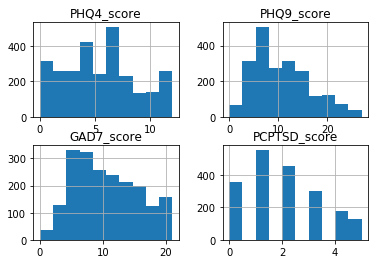

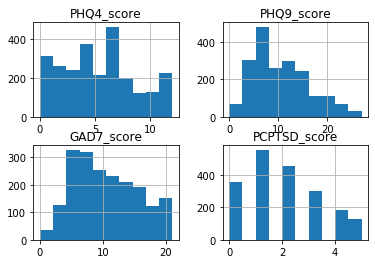

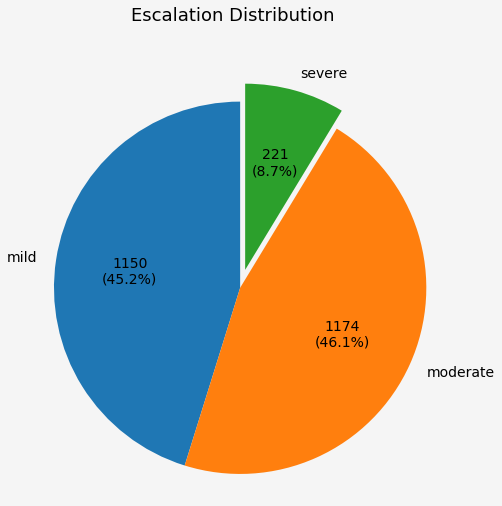

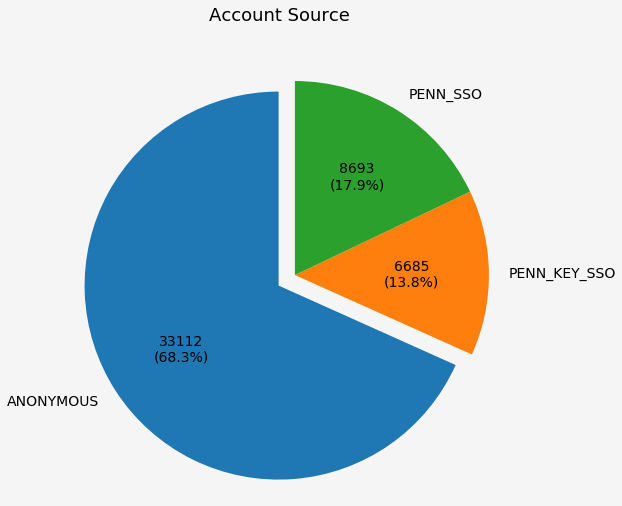

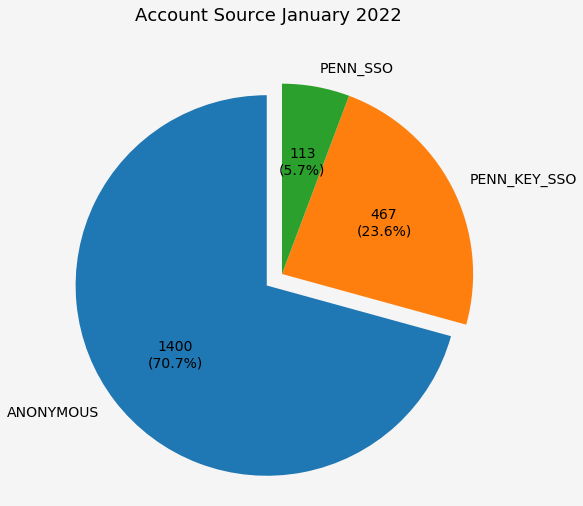

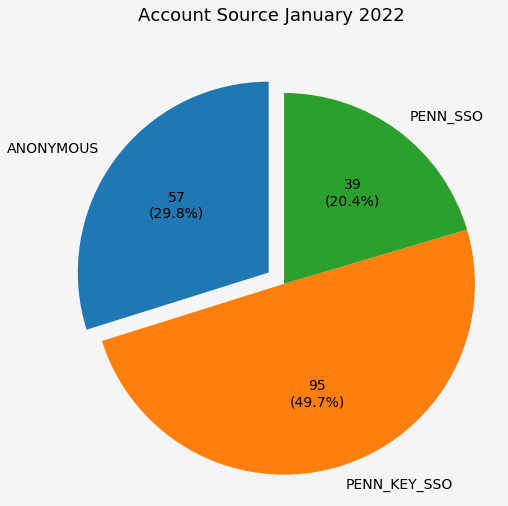

29
121
2545
100 

acct_esc_time_count    2545.0
acct_esc_time_pct         1.0
dtype: float64 

acct_esc_time_count    1985.00
acct_esc_time_pct         0.78
dtype: float64 

acct_esc_time_count    2063.0000
acct_esc_time_pct         0.8106
dtype: float64


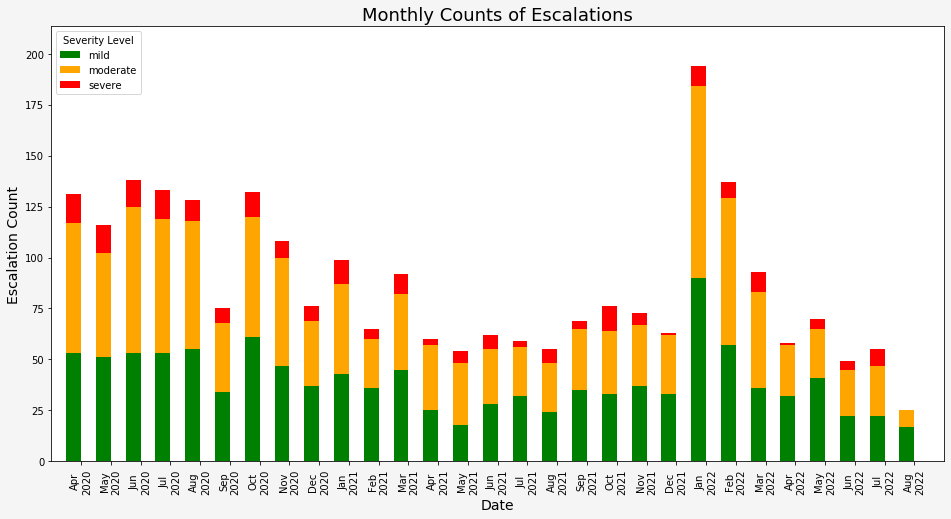

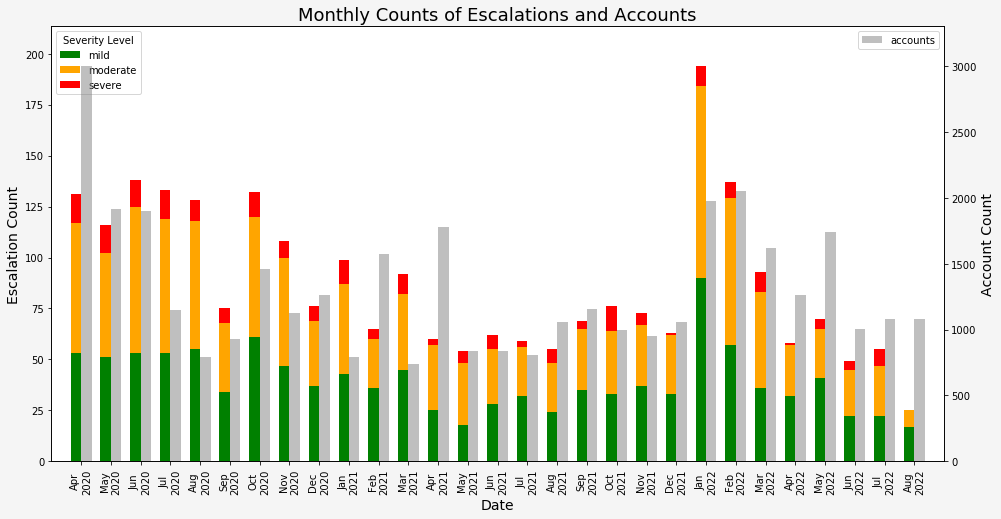

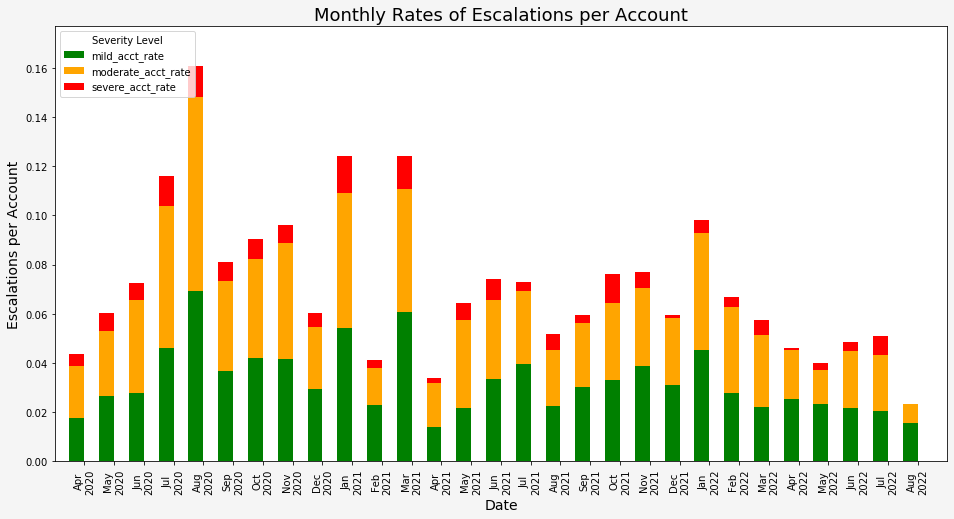

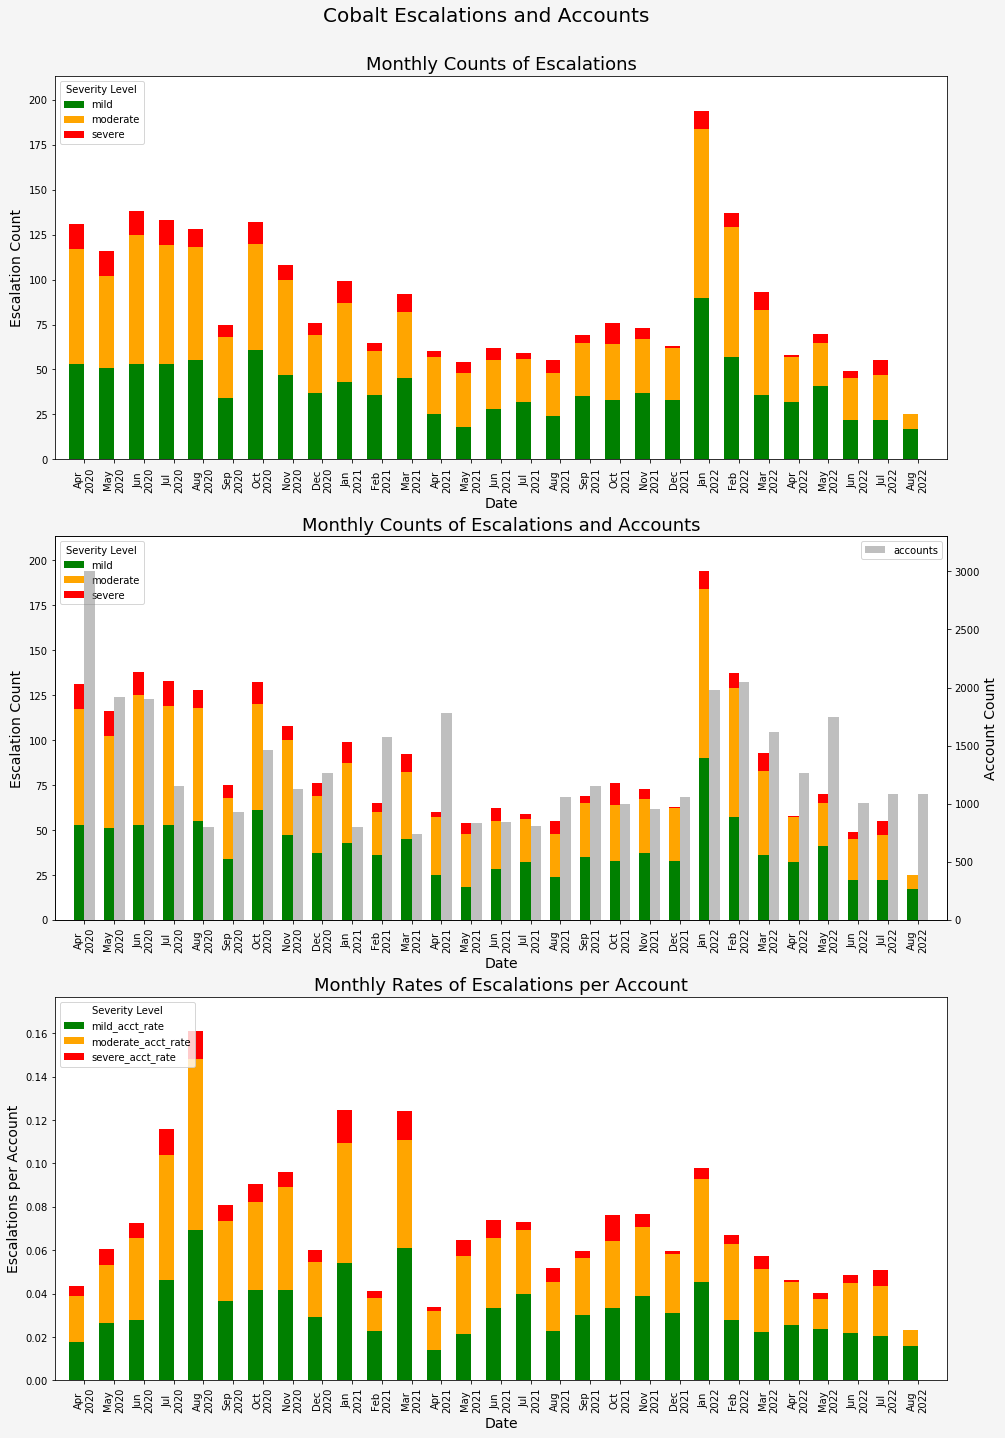

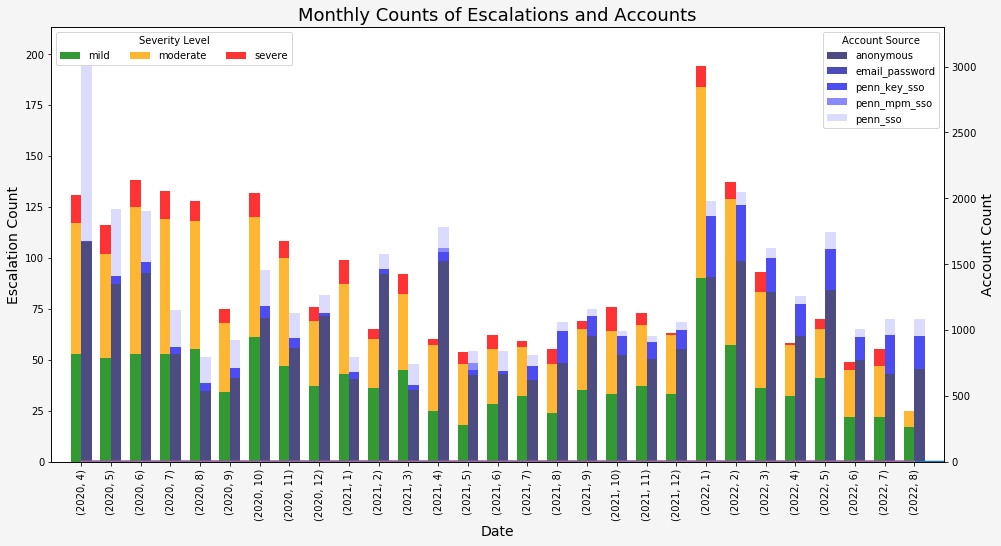

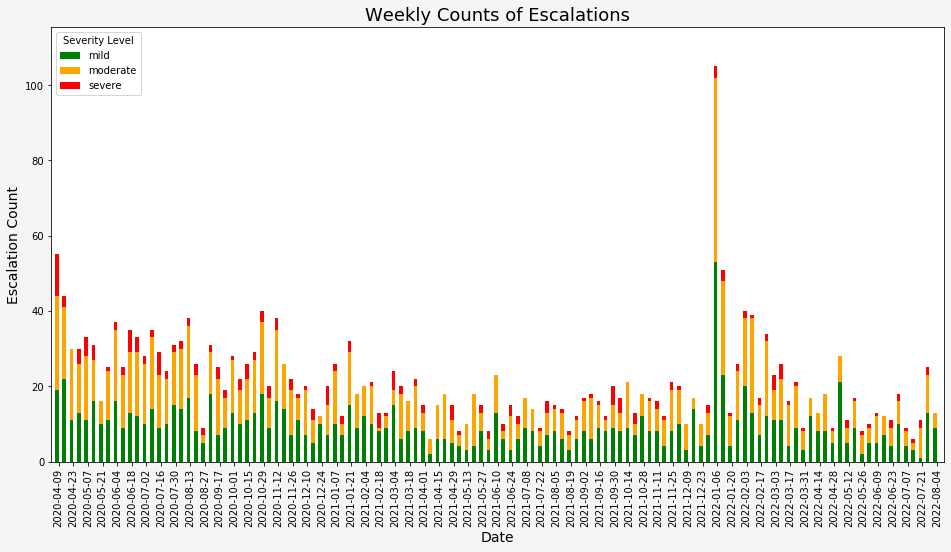

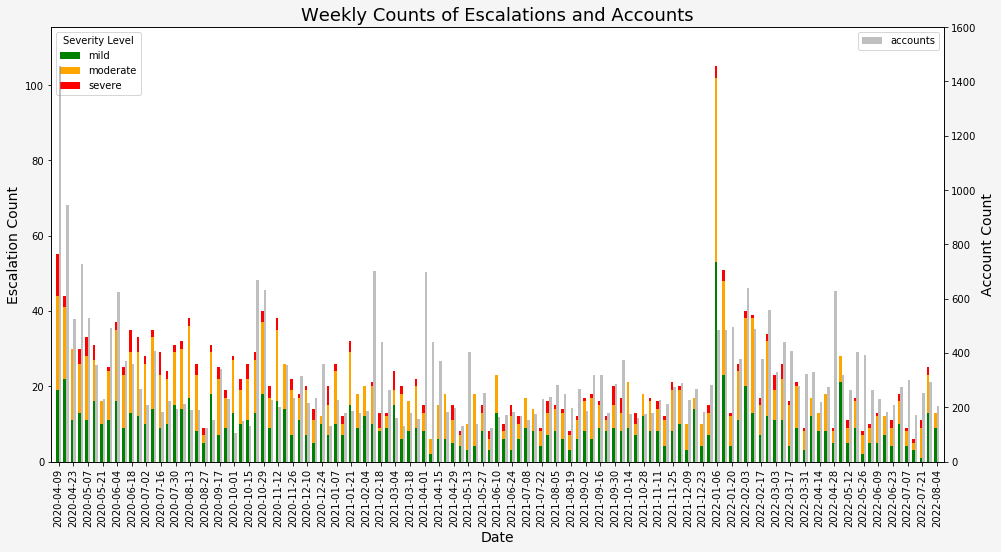

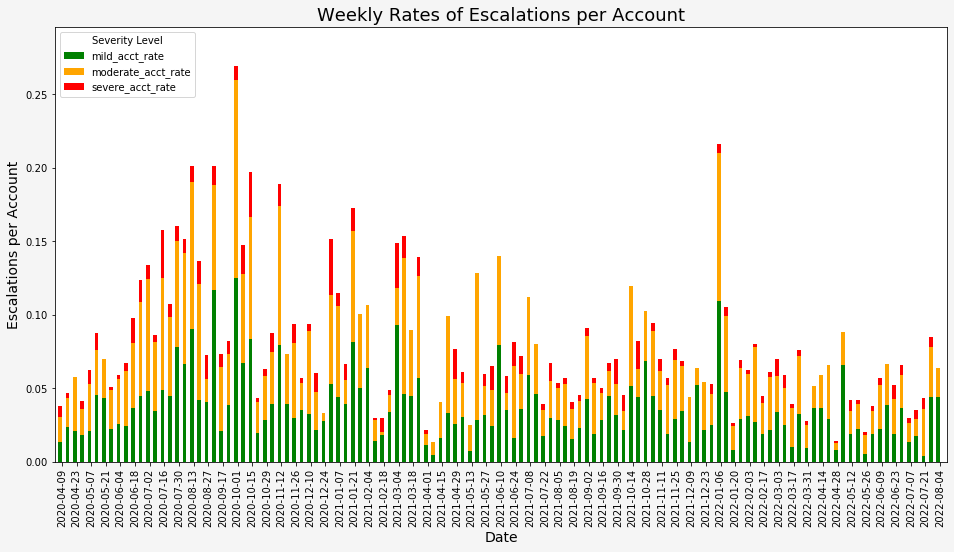

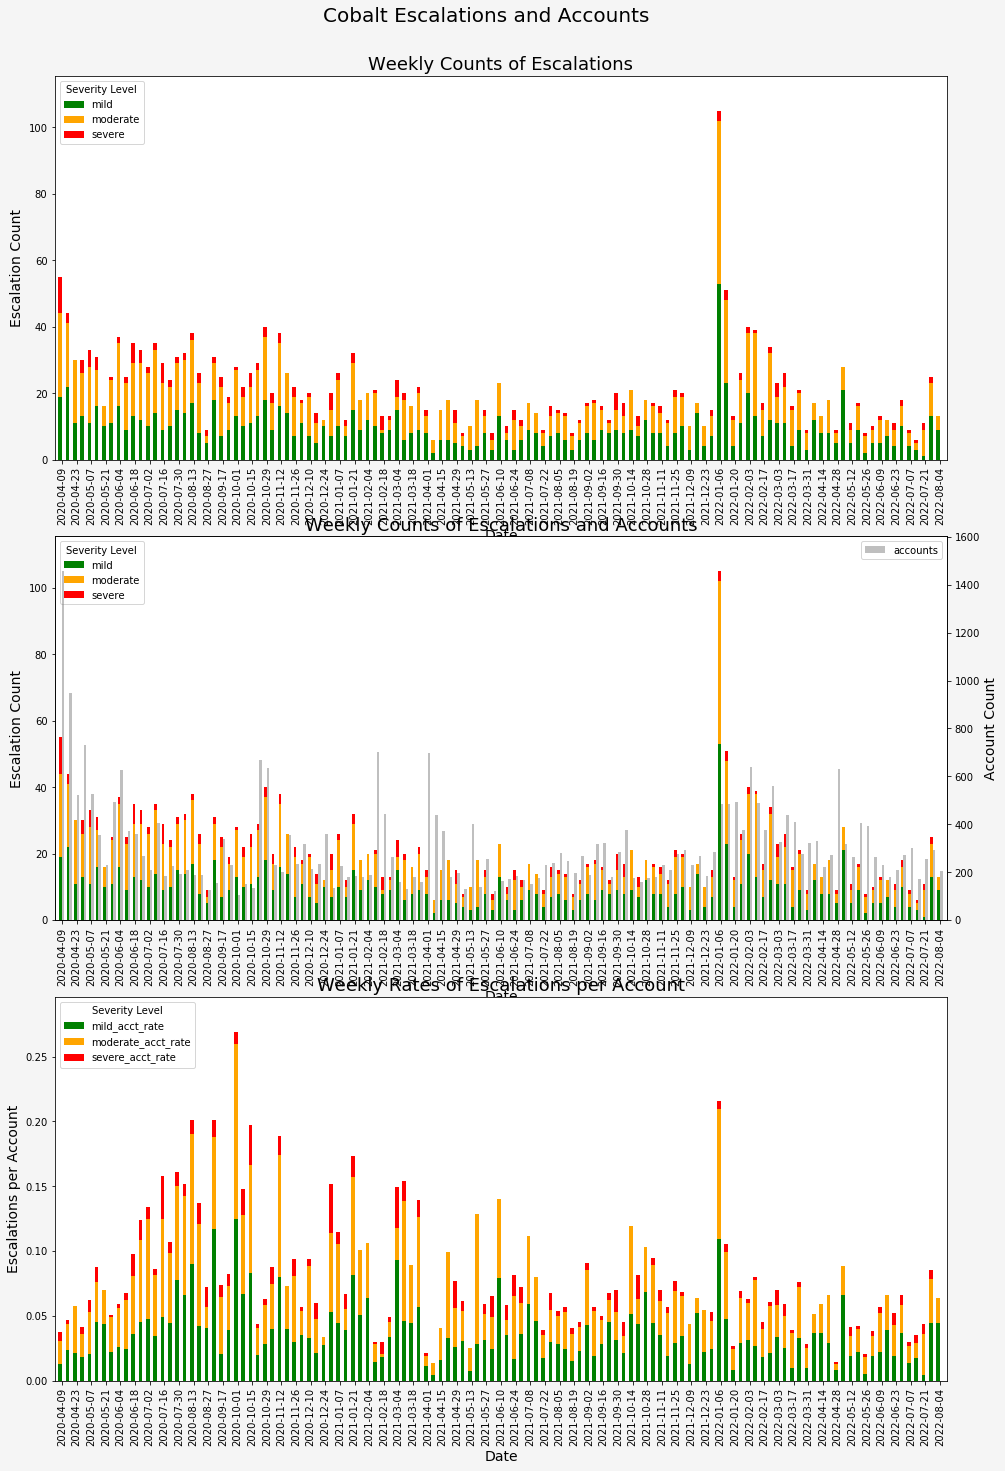

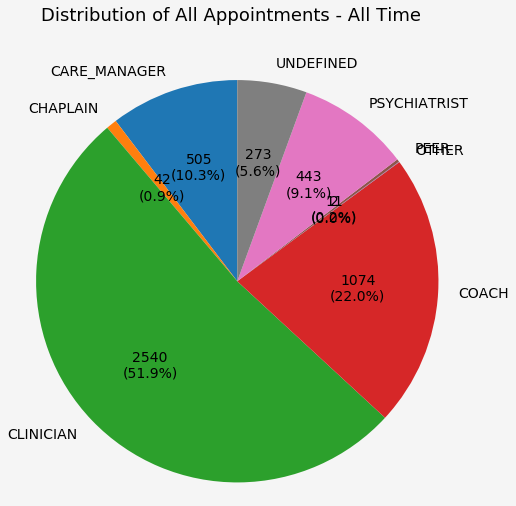

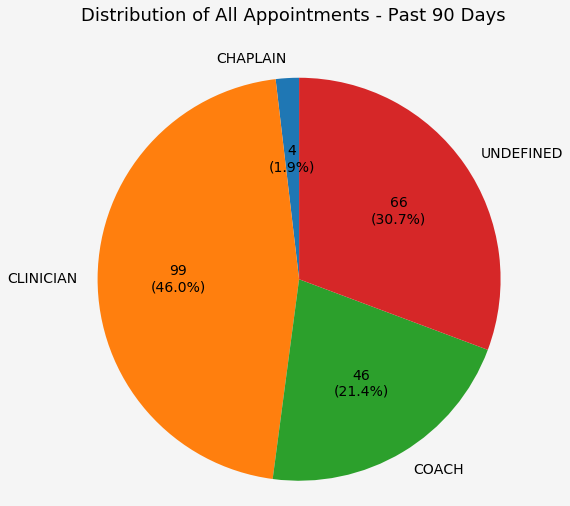

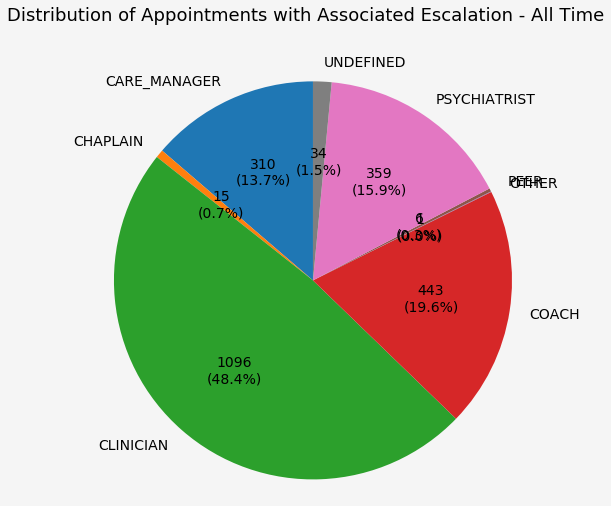

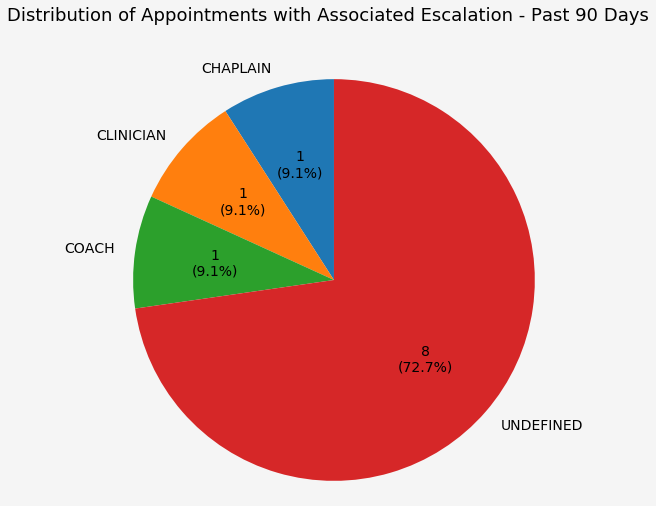

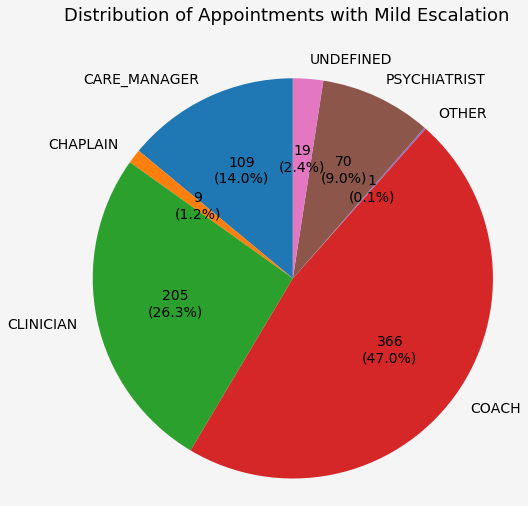

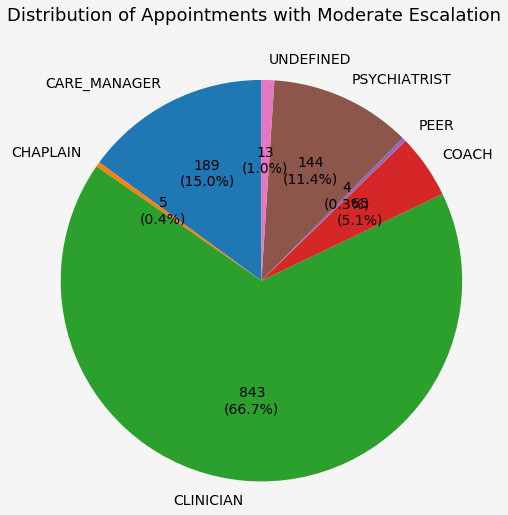

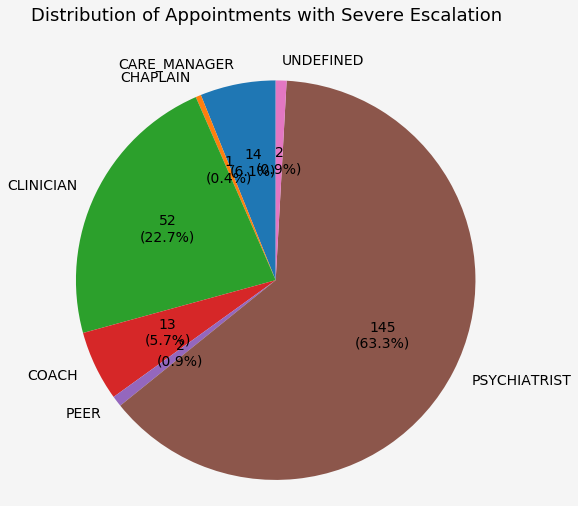

Active Accounts:
15097 unique, active accounts accessed mental health and well-being resources on the Cobalt platform
	8109 distinct accounts attempted assessments
	3257 distinct accounts booked 4890 appointments
	6600 distinct accounts engaged with content

Assessments and Escalations:
2494 unique accounts completed mental health assessments, resulting in 2545 distinct escalations
	Moderate Escalation:
	1156(46.35%) unique accounts met moderate criteria, resulting in 1174(46.13%) moderate escalations
	Severe Escalation:
	220(8.82%) unique accounts met severe criteria, resulting in 221(8.68%) severe escalations

Appointments:
1152/2494(46.19)% accounts with completed mental health assessments booked 2264 appointments with a trained mental health professional


In [1]:
# Modules
from cobalt_reporting_data import *

import pandas as pd
import numpy as np
from scipy import stats

import re
import copy
import textwrap
import math
import random
import datetime
from collections import defaultdict

import glob
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import seaborn as sns; 
sns.set()

%matplotlib inline

# Pandas view options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('precision', 4)

# Program Parameters

## Constants

In [2]:
# Paths
COBALT_PLUS_DATA_PATH = DATA_PATH + 'cobalt_plus/'
BITLY_DATA_PATH = COBALT_PLUS_DATA_PATH + 'bitly_csvs/'
REPORT_PATH = OUTPUT_PATH + 'reports/'

In [3]:
# Constants
STUDY_START_DATE = pd.to_datetime('01/31/2022')
STUDY_END_DATE = pd.to_datetime('03/03/2023')

## Collections

In [4]:
# Dictionaries
content_type_color_dict = {'PODCAST':'r','ARTICLE':'g','VIDEO':'b'}

# Read Data

## Enrollment

In [5]:
enrollment = pd.read_csv(COBALT_PLUS_DATA_PATH +'cobalt_plus_enrollment_arms.csv', dtype={'Participant':'str'})

# Process col names
enrollment.columns = enrollment.columns.str.lower()
enrollment.columns = enrollment.columns.str.replace('-','')
enrollment.columns = enrollment.columns.str.replace('  ', ' ')
enrollment.columns = enrollment.columns.str.replace(' ', '_')
enrollment = enrollment.rename(columns={'participant':'participant_id'})

# Process identifiers
enrollment = enrollment.dropna(axis=0, subset=['participant_id'])

enrollment['primary_email'] = enrollment['primary_email'].str.lower()
enrollment['primary_email'] = enrollment['primary_email'].str.strip()
enrollment['secondary_email'] = enrollment['secondary_email'].str.lower()
enrollment['secondary_email'] = enrollment['secondary_email'].str.strip()

enrollment['pennkey'] = enrollment['pennkey'].str.lower()
enrollment['pennkey'] = enrollment['pennkey'].str.strip()
enrollment['pennkey_confirmed'] = enrollment['pennkey_confirmed'].str.lower()
enrollment['pennkey_confirmed'] = enrollment['pennkey_confirmed'].str.strip()

# Process dates
enrollment['start_date'] = pd.to_datetime(enrollment['start_date']).dt.tz_localize(tz=COBALT_TZ)
enrollment['6_months'] = pd.to_datetime(enrollment['6_months']).dt.tz_localize(tz=COBALT_TZ)
enrollment['9_months'] = pd.to_datetime(enrollment['9_months']).dt.tz_localize(tz=COBALT_TZ)

In [6]:
print(len(enrollment))
print(len(enrollment.columns))
enrollment.head(2)

1275
9


participant_id           arm                start_date  \
0     1000728614  Intervention 2022-01-31 00:00:00-05:00   
1     1000729098       Control 2022-02-01 00:00:00-05:00   

                   6_months                  9_months  pennkey  \
0 2022-07-31 00:00:00-04:00 2022-10-31 00:00:00-04:00    rasch   
1 2022-08-01 00:00:00-04:00 2022-11-01 00:00:00-04:00  felixfp   

  pennkey_confirmed                                 primary_email  \
0             rasch     rachelle.schneider@pennmedicine.upenn.edu   
1           felixfp  felix.fernandez-penny@pennmedicine.upenn.edu   

          secondary_email  
0  rasch@alumni.upenn.edu  
1   felixfp@sas.upenn.edu

## Accounts

In [7]:
account['email_address'] = account['email_address'].str.lower()
account['email_address'] = account['email_address'].str.strip()
account['created'] = account['created'].dt.tz_convert(tz=COBALT_TZ)

account_email = account[account['email_address'].notnull()]

In [8]:
print(len(account))
print(len(account.columns))
account.head(2)

48579
52


account_id  role_id institution_id  \
0  afe7ff25-775e-4518-822b-a5bb56683d7d  PATIENT           PENN   
1  3115d538-f423-4618-b23b-ec6ac9e554a9  PATIENT           PENN   

  account_source_id sso_id first_name last_name display_name email_address  \
0         ANONYMOUS   None       None      None         None          None   
1         ANONYMOUS   None       None      None         None          None   

  phone_number sso_attributes  consent_form_accepted  \
0         None           None                  False   
1         None           None                  False   

  consent_form_accepted_date locale         time_zone  \
0                        NaT  en-US  America/New_York   
1                        NaT  en-US  America/New_York   

                           created                     last_updated  \
0 2021-04-08 10:08:38.598732-04:00 2021-04-08 14:08:38.598732+00:00   
1 2021-05-18 06:00:00.228881-04:00 2021-05-18 10:00:00.228881+00:00   

  _deprecated_epic_patient_id _deprecated_epic_patient_id_type  \
0                        None                             None   
1                        None                             None   

   _deprecated_epic_patient_created_by_cobalt password source_system_id  \
0                                       False     None           COBALT   
1                                       False     None           COBALT   

  provider_id beta_status_id  access_token_expiration_in_minutes  \
0        None        UNKNOWN                                 NaN   
1        None        UNKNOWN                                 NaN   

   access_token_short_expiration_in_minutes metadata  \
0                                       NaN     None   
1                                       NaN     None   

   scheduling_tutorial_viewed gender_identity_id ethnicity_id birth_sex_id  \
0                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   
1                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   

     race_id birthdate consent_form_rejected_date microsoft_id  \
0  NOT_ASKED      None                       None         None   
1  NOT_ASKED      None                       None         None   

  epic_patient_mrn institution_location_id  prompted_for_institution_location  \
0             None                    None                              False   
1             None                    None                              False   

  epic_patient_fhir_id  active  test_account epic_patient_unique_id  \
0                 None    True         False                   None   
1                 None    True         False                   None   

  epic_patient_unique_id_type username  password_reset_required  year  month  \
0                        None     None                    False  2021      4   
1                        None     None                    False  2021      5   

   week  day year_month year_month_week dayofyear  
0    14    8 2021-04-01      2021-04-08  20210408  
1    20   18 2021-05-01      2021-05-13  20210518

In [9]:
print(len(account_email))
print(len(account_email.columns))
account_email.head(2)

18357
52


account_id  role_id institution_id  \
11  e5eeebe4-1ad2-4a44-a3ad-2e34bfe4d613  PATIENT           PENN   
15  6146b046-290c-4def-adf2-dd0181dd7e13  PATIENT           PENN   

   account_source_id              sso_id first_name  last_name  \
11          PENN_SSO            60691534    Nadirah     Turner   
15      PENN_KEY_SSO  jsebasti@upenn.edu  Josephine  Sebastian   

           display_name                          email_address phone_number  \
11       Nadirah Turner  nadirah.turner@pennmedicine.upenn.edu         None   
15  Josephine Sebastian                     jsebasti@upenn.edu         None   

                                       sso_attributes  consent_form_accepted  \
11  {'Zip': [], 'Email': ['Nadirah.Turner@Pennmedi...                  False   
15  {'urn:oid:2.5.4.4': ['Sebastian'], 'urn:oid:2....                  False   

   consent_form_accepted_date locale         time_zone  \
11                        NaT  en-US  America/New_York   
15                        NaT  en-US  America/New_York   

                            created                     last_updated  \
11 2023-02-22 06:30:49.956393-05:00 2023-02-22 11:31:21.696044+00:00   
15 2022-11-29 11:10:50.083378-05:00 2022-11-29 16:10:50.083378+00:00   

   _deprecated_epic_patient_id _deprecated_epic_patient_id_type  \
11                        None                             None   
15                        None                             None   

    _deprecated_epic_patient_created_by_cobalt password source_system_id  \
11                                       False     None           COBALT   
15                                       False     None           COBALT   

   provider_id beta_status_id  access_token_expiration_in_minutes  \
11        None        UNKNOWN                                 NaN   
15        None        UNKNOWN                                 NaN   

    access_token_short_expiration_in_minutes metadata  \
11                                       NaN     None   
15                                       NaN     None   

    scheduling_tutorial_viewed gender_identity_id ethnicity_id birth_sex_id  \
11                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   
15                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   

      race_id birthdate consent_form_rejected_date microsoft_id  \
11  NOT_ASKED      None                       None         None   
15  NOT_ASKED      None                       None         None   

   epic_patient_mrn institution_location_id  \
11             None                    None   
15             None                    None   

    prompted_for_institution_location epic_patient_fhir_id  active  \
11                              False                 None    True   
15                              False                 None    True   

    test_account epic_patient_unique_id epic_patient_unique_id_type username  \
11         False                   None                        None     None   
15         False                   None                        None     None   

    password_reset_required  year  month  week  day year_month  \
11                    False  2023      2     8   22 2023-02-01   
15                    False  2022     11    48   29 2022-11-01   

   year_month_week dayofyear  
11      2023-02-16  20230222  
15      2022-11-24  20221129

## Cobalt Plus Participants
* study_acct: merge enrolled participants with accounts by unique email address

### Accounts

In [10]:
unique_email = pd.concat([enrollment['primary_email'],enrollment['secondary_email']])
unique_email = unique_email[unique_email.notnull()]
unique_email = unique_email.drop_duplicates()
unique_email.name = 'unique_email'
enrollment_email = enrollment.merge(unique_email, how='inner', left_index=True, right_index=True)

study_acct = account_email.merge(enrollment_email, how='inner', left_on='email_address', right_on='unique_email')
study_acct['acct_created_pre'] = (study_acct['created'] - study_acct['start_date']).apply(lambda x: 1 if x < pd.Timedelta(0) else 0)
study_acct['acct_created_post'] = (study_acct['9_months'] - study_acct['created']).apply(lambda x: 1 if x < pd.Timedelta(0) else 0)
study_acct['acct_created_during'] = study_acct[['acct_created_pre','acct_created_post']].sum(axis=1).apply(lambda x: 1 if x==0 else 0)

In [11]:
print(len(study_acct), 'rows')
print(len(study_acct.columns), 'columns')
print()
print(len(study_acct.account_id.unique()), 'unique account ids')
print('\t',study_acct['acct_created_pre'].sum(),'created before study\n\t',
      study_acct['acct_created_during'].sum(),'created during study\n\t',
      study_acct['acct_created_post'].sum(), 'created after study')
print(len(study_acct.participant_id.unique()), 'unique participant ids')
study_acct.head(2)

819 rows
65 columns

819 unique account ids
	 414 created before study
	 301 created during study
	 104 created after study
547 unique participant ids


account_id  role_id institution_id  \
0  a7bc7686-c58a-47a9-8481-9fc719f3bef7  PATIENT           PENN   
1  7c914718-8deb-45af-bf05-d651ec10b0bd  PATIENT           PENN   

  account_source_id    sso_id first_name   last_name      display_name  \
0         ANONYMOUS      None       None        None              None   
1          PENN_SSO  10090618      Robin  Obelmejias  Robin Obelmejias   

                             email_address  phone_number  \
0  robin.obelmejias@pennmedicine.upenn.edu          None   
1  robin.obelmejias@pennmedicine.upenn.edu  +12156812570   

                                      sso_attributes  consent_form_accepted  \
0                                               None                  False   
1  {'Zip': '19104', 'Email': 'Robin.Obelmejias@pe...                   True   

        consent_form_accepted_date locale         time_zone  \
0                              NaT  en-US  America/New_York   
1 2020-04-15 14:27:25.244948+00:00  en-US  America/New_York   

                           created                     last_updated  \
0 2021-12-01 08:17:09.998206-05:00 2021-12-01 13:17:52.286665+00:00   
1 2020-04-15 10:27:14.354360-04:00 2023-03-07 19:44:26.913497+00:00   

  _deprecated_epic_patient_id _deprecated_epic_patient_id_type  \
0                        None                             None   
1                        None                             None   

   _deprecated_epic_patient_created_by_cobalt password source_system_id  \
0                                       False     None           COBALT   
1                                       False     None           COBALT   

  provider_id beta_status_id  access_token_expiration_in_minutes  \
0        None        UNKNOWN                                 NaN   
1        None        UNKNOWN                                 NaN   

   access_token_short_expiration_in_minutes metadata  \
0                                       NaN     None   
1                                       NaN     None   

   scheduling_tutorial_viewed gender_identity_id ethnicity_id birth_sex_id  \
0                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   
1                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   

     race_id birthdate consent_form_rejected_date microsoft_id  \
0  NOT_ASKED      None                       None         None   
1  NOT_ASKED      None                       None         None   

  epic_patient_mrn institution_location_id  prompted_for_institution_location  \
0             None                    None                              False   
1             None                    None                              False   

  epic_patient_fhir_id  active  test_account epic_patient_unique_id  \
0                 None    True         False                   None   
1                 None    True         False                   None   

  epic_patient_unique_id_type username  password_reset_required  year  month  \
0                        None     None                    False  2021     12   
1                        None     None                    False  2020      4   

   week  day year_month year_month_week dayofyear participant_id      arm  \
0    48    1 2021-12-01      2021-11-25  20211201     1000781029  Control   
1    16   15 2020-04-01      2020-04-09  20200415     1000781029  Control   

                 start_date                  6_months  \
0 2022-05-04 00:00:00-04:00 2022-11-04 00:00:00-04:00   
1 2022-05-04 00:00:00-04:00 2022-11-04 00:00:00-04:00   

                   9_months pennkey pennkey_confirmed  \
0 2023-02-04 00:00:00-05:00  robinp            robinp   
1 2023-02-04 00:00:00-05:00  robinp            robinp   

                             primary_email       secondary_email  \
0  robin.obelmejias@pennmedicine.upenn.edu  redrobin1128@aol.com   
1  robin.obelmejias@pennmedicine.upenn.edu  redrobin1128@aol.com   

                              unique_email  acct_created_pre  \
0  r

### Appointments

In [12]:
# All time
use_cols = ['account_id','account_source_id'] + enrollment_email.columns.to_list()
study_appt = appointment.merge(study_acct[use_cols], how='inner', left_on='account_id', right_on='account_id')
study_appt_completed = study_appt[study_appt['canceled']==False]
study_appt_canceled = study_appt[study_appt['canceled']==True]
study_appt_acct = study_acct[study_acct['account_id'].isin(study_appt['account_id'])]

# Pre study
study_appt_pre = study_appt[study_appt['start_time']<study_appt['start_date']]
study_appt_pre_completed = study_appt_pre[study_appt_pre['canceled']==False]
study_appt_pre_canceled = study_appt_pre[study_appt_pre['canceled']==True]
study_appt_pre_acct = study_acct[study_acct['account_id'].isin(study_appt_pre['account_id'])]

# 0-6 months
study_appt_06 = study_appt[(study_appt['start_time']>=study_appt['start_date']) & 
                           (study_appt['start_time']<=study_appt['6_months'])]
study_appt_06_completed = study_appt_06[study_appt_06['canceled']==False]
study_appt_06_canceled = study_appt_06[study_appt_06['canceled']==True]
study_appt_06_acct = study_acct[study_acct['account_id'].isin(study_appt_06['account_id'])]

# 6-9 months
study_appt_69 = study_appt[(study_appt['start_time']>=study_appt['6_months']) & 
                           (study_appt['start_time']<=study_appt['9_months'])]
study_appt_69_completed = study_appt_69[study_appt_69['canceled']==False]
study_appt_69_canceled = study_appt_69[study_appt_69['canceled']==True]
study_appt_69_acct = study_acct[study_acct['account_id'].isin(study_appt_69['account_id'])]

# Post study
study_appt_post = study_appt[study_appt['start_time']>study_appt['9_months']]
study_appt_post_completed = study_appt_post[study_appt_post['canceled']==False]
study_appt_post_canceled = study_appt_post[study_appt_post['canceled']==True]
study_appt_post_acct = study_acct[study_acct['account_id'].isin(study_appt_post['account_id'])]

#### All Time

In [13]:
print(len(study_appt), 'rows')
print(len(study_appt.columns), 'columns')
print()
print(len(study_appt.appointment_id.unique()), 'unique appointment ids')
print(len(study_appt.account_id.unique()), 'unique account ids')
print(len(study_appt.participant_id.unique()), 'unique participant ids')
print(len(study_appt.provider_id.unique()), 'unique provider ids')
study_appt.head(2)

306 rows
66 columns

306 unique appointment ids
183 unique account ids
160 unique participant ids
46 unique provider ids


appointment_id                           provider_id  \
0  98365dba-f07b-4e89-b4aa-2eca8d37e428  c236acc5-9473-457a-af51-de57bddcb8a3   
1  1cf6c04c-7692-4252-aa2b-10efd8815950  c236acc5-9473-457a-af51-de57bddcb8a3   

                             account_id  acuity_appointment_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3             8.4849e+08   
1  c3256070-e04c-4b11-a1b6-3de08e57d9a6             8.9845e+08   

   acuity_appointment_type_id  acuity_class_id  bluejeans_meeting_id  \
0                         NaN              NaN            1.0494e+08   
1                         NaN              NaN            1.0763e+08   

                    videoconference_url                                 title  \
0  https://bluejeans.com/698184757/7722  1:1 Appointment with Psychotherapist   
1  https://bluejeans.com/515071484/4323  1:1 Appointment with Psychotherapist   

                 start_time            end_time  duration_in_minutes  \
0 2022-07-06 16:00:00-04:00 2022-07-06 17:00:00                   60   
1 2022-09-21 16:00:00-04:00 2022-09-21 17:00:00                   60   

          time_zone  canceled canceled_at                          created  \
0  America/New_York     False         NaT 2022-06-22 16:25:35.721374-04:00   
1  America/New_York     False         NaT 2022-09-15 17:10:08.807789-04:00   

                      last_updated epic_contact_id epic_contact_id_type  \
0 2022-06-22 20:25:35.721374+00:00            None                 None   
1 2022-09-15 21:10:08.807789+00:00            None                 None   

                    appointment_type_id phone_number  \
0  2294b4f1-7fad-454f-a118-06b479356d7d         None   
1  2294b4f1-7fad-454f-a118-06b479356d7d         None   

  videoconference_platform_id                 appointment_reason_id  \
0                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   
1                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   

                  created_by_account_id comment attendance_status_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3    None              UNKNOWN   
1  c3256070-e04c-4b11-a1b6-3de08e57d9a6    None              UNKNOWN   

  bluejeans_participant_passcode                  intake_assessment_id  \
0                           7722  5929588e-ee53-4df5-9c62-1656a43ff4cd   
1                           4323  5929588e-ee53-4df5-9c62-1656a43ff4cd   

  scheduling_system_id  canceled_for_reschedule rescheduled_appointment_id  \
0               ACUITY                    False                       None   
1               ACUITY                    False                       None   

              intake_account_session_id interaction_instance_id  \
0  b762db93-d3fd-4933-a856-c56126db5a37                    None   
1  78babe22-e422-476a-96fe-50ad7be01531                    None   

  patient_reminder_scheduled_message_id patient_order_id  \
0                                  None             None   
1                                  None             None   

  epic_appointment_fhir_id appointment_cancelation_reason_id  \
0                     None                       UNSPECIFIED   
1                     None                       UNSPECIFIED   

  epic_appointment_fhir_identifier_system  \
0                                    None   
1                                    None   

  epic_appointment_fhir_identifier_value epic_appointment_fhir_stu3_response  \
0                                   None                                None   
1                                   None                                None   

   created_year  created_month  created_day created_year_month  \
0          2022              6           22         2022-06-01   
1          2022              9           15         2022-09-01   

  created_year_month_week created_dayofyear  apt_year  apt_month  apt_day  \
0              2022-06-16          20220622      2022          7        6   
1              2022-09-15          20220915      2022          9       21   

 

In [14]:
print(len(study_appt_acct), 'rows')
print(len(study_appt_acct.columns), 'columns')
print()
print(len(study_appt_acct.account_id.unique()), 'unique account ids')
print('\t',study_appt_acct['acct_created_pre'].sum(),'created before study\n\t',
      study_appt_acct['acct_created_during'].sum(),'created during study\n\t',
      study_appt_acct['acct_created_post'].sum(), 'created after study')
print(len(study_appt_acct.participant_id.unique()), 'unique participant ids')
study_appt_acct.head(2)

183 rows
65 columns

183 unique account ids
	 96 created before study
	 78 created during study
	 9 created after study
160 unique participant ids


account_id  role_id institution_id  \
19  1f642763-284c-4110-ae14-50b34b74cdf0  PATIENT           PENN   
29  e43a398d-9211-4224-bbcf-d8eadd46da1c  PATIENT           PENN   

   account_source_id           sso_id first_name last_name   display_name  \
19         ANONYMOUS             None       None      None           None   
29      PENN_KEY_SSO  asayl@upenn.edu     Aubrey    Marvel  Aubrey Marvel   

                           email_address  phone_number  \
19                 smithsr1122@gmail.com  +16109442704   
29  aubrey.marvel@pennmedicine.upenn.edu          None   

                                       sso_attributes  consent_form_accepted  \
19                                               None                  False   
29  {'urn:oid:2.5.4.4': ['Marvel'], 'urn:oid:2.5.4...                  False   

   consent_form_accepted_date locale         time_zone  \
19                        NaT  en-US  America/New_York   
29                        NaT  en-US  America/New_York   

                            created                     last_updated  \
19 2021-06-14 14:47:03.067192-04:00 2021-06-14 18:59:35.395243+00:00   
29 2021-12-01 10:26:43.354015-05:00 2023-02-23 18:24:03.733667+00:00   

   _deprecated_epic_patient_id _deprecated_epic_patient_id_type  \
19                        None                             None   
29                        None                             None   

    _deprecated_epic_patient_created_by_cobalt password source_system_id  \
19                                       False     None           COBALT   
29                                       False     None           COBALT   

   provider_id beta_status_id  access_token_expiration_in_minutes  \
19        None        UNKNOWN                                 NaN   
29        None        UNKNOWN                            262800.0   

    access_token_short_expiration_in_minutes metadata  \
19                                       NaN     None   
29                                  262800.0     None   

    scheduling_tutorial_viewed gender_identity_id ethnicity_id birth_sex_id  \
19                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   
29                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   

      race_id birthdate consent_form_rejected_date microsoft_id  \
19  NOT_ASKED      None                       None         None   
29  NOT_ASKED      None                       None         None   

   epic_patient_mrn institution_location_id  \
19             None                    None   
29             None                    None   

    prompted_for_institution_location epic_patient_fhir_id  active  \
19                              False                 None    True   
29                              False                 None    True   

    test_account epic_patient_unique_id epic_patient_unique_id_type username  \
19         False                   None                        None     None   
29         False                   None                        None     None   

    password_reset_required  year  month  week  day year_month  \
19                    False  2021      6    24   14 2021-06-01   
29                    False  2021     12    48    1 2021-12-01   

   year_month_week dayofyear participant_id           arm  \
19      2021-06-10  20210614     1000768670  Intervention   
29      2021-11-25  20211201     1000754986       Control   

                  start_date                  6_months  \
19 2022-04-06 00:00:00-04:00 2022-10-06 00:00:00-04:00   
29 2022-03-08 00:00:00-05:00 2022-09-08 00:00:00-04:00   

                    9_months   pennkey pennkey_confirmed  \
19 2023-01-06 00:00:00-05:00  franksmi          franksmi   
29 2022-12-08 00:00:00-05:00     asayl             asayl   

                           primary_email          secondary_email  \
19    frank.smith@pennmedicine.upenn.edu    smithsr1122@gmail.com   
29  aubrey.marvel@pennmedicine.upenn.edu  aubrey.marvel@gmail.c

#### Pre-Study

In [15]:
print(len(study_appt_pre), 'rows')
print(len(study_appt_pre.columns), 'columns')
print()
print(len(study_appt_pre.appointment_id.unique()), 'unique appointment ids')
print(len(study_appt_pre.account_id.unique()), 'unique account ids')
print(len(study_appt_pre.participant_id.unique()), 'unique participant ids')
print(len(study_appt_pre.provider_id.unique()), 'unique provider ids')
study_appt_pre.head(2)

122 rows
66 columns

122 unique appointment ids
73 unique account ids
68 unique participant ids
43 unique provider ids


appointment_id  \
14  e9834be4-d7b1-4a8f-a995-3dd1e653e422   
15  40697771-3966-4d16-9df3-cab8135782b9   

                             provider_id  \
14  c236acc5-9473-457a-af51-de57bddcb8a3   
15  c236acc5-9473-457a-af51-de57bddcb8a3   

                              account_id  acuity_appointment_id  \
14  46981fa1-35ad-4d76-8b0e-11b13995ec61             7.7753e+08   
15  46981fa1-35ad-4d76-8b0e-11b13995ec61             8.0478e+08   

    acuity_appointment_type_id  acuity_class_id  bluejeans_meeting_id  \
14                         NaN              NaN            1.0143e+08   
15                         NaN              NaN            1.0281e+08   

                     videoconference_url  \
14  https://bluejeans.com/180526198/7806   
15  https://bluejeans.com/519225611/3263   

                                   title                start_time  \
14  1:1 Appointment with Psychotherapist 2022-03-08 12:00:00-05:00   
15  1:1 Appointment with Psychotherapist 2022-04-13 16:00:00-04:00   

              end_time  duration_in_minutes         time_zone  canceled  \
14 2022-03-08 13:00:00                   60  America/New_York     False   
15 2022-04-13 17:00:00                   60  America/New_York     False   

   canceled_at                          created  \
14         NaT 2022-02-28 16:39:45.406853-05:00   
15         NaT 2022-04-11 22:13:58.971127-04:00   

                       last_updated epic_contact_id epic_contact_id_type  \
14 2022-04-20 14:42:15.236167+00:00            None                 None   
15 2022-04-20 14:42:15.236167+00:00            None                 None   

                     appointment_type_id phone_number  \
14  2294b4f1-7fad-454f-a118-06b479356d7d         None   
15  2294b4f1-7fad-454f-a118-06b479356d7d         None   

   videoconference_platform_id                 appointment_reason_id  \
14                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   
15                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   

                   created_by_account_id comment attendance_status_id  \
14  46981fa1-35ad-4d76-8b0e-11b13995ec61    None              UNKNOWN   
15  46981fa1-35ad-4d76-8b0e-11b13995ec61    None              UNKNOWN   

   bluejeans_participant_passcode intake_assessment_id scheduling_system_id  \
14                           7806                 None               ACUITY   
15                           3263                 None               ACUITY   

    canceled_for_reschedule rescheduled_appointment_id  \
14                    False                       None   
15                    False                       None   

   intake_account_session_id interaction_instance_id  \
14                      None                    None   
15                      None                    None   

   patient_reminder_scheduled_message_id patient_order_id  \
14                                  None             None   
15                                  None             None   

   epic_appointment_fhir_id appointment_cancelation_reason_id  \
14                     None                       UNSPECIFIED   
15                     None                       UNSPECIFIED   

   epic_appointment_fhir_identifier_system  \
14                                    None   
15                                    None   

   epic_appointment_fhir_identifier_value epic_appointment_fhir_stu3_response  \
14                                   None                                None   
15                                   None                                None   

    created_year  created_month  created_day created_year_month  \
14          2022              2           28         2022-02-01   
15          2022              4           11         2022-04-01   

   created_year_month_week created_dayofyear  apt_year  apt_month  apt_day  \
14              2022-02-24          20220228      2022          3        8   
15              2022-04-07          20220411      2022          4       1

In [16]:
print(len(study_appt_pre_acct), 'rows')
print(len(study_appt_pre_acct.columns), 'columns')
print()
print(len(study_appt_pre_acct.account_id.unique()), 'unique account ids')
print('\t',study_appt_pre_acct['acct_created_pre'].sum(),'created before study\n\t',
      study_appt_pre_acct['acct_created_during'].sum(),'created during study\n\t',
      study_appt_pre_acct['acct_created_post'].sum(), 'created after study')
print(len(study_appt_pre_acct.participant_id.unique()), 'unique participant ids')
study_appt_pre_acct.head(2)

73 rows
65 columns

73 unique account ids
	 73 created before study
	 0 created during study
	 0 created after study
68 unique participant ids


account_id  role_id institution_id  \
19  1f642763-284c-4110-ae14-50b34b74cdf0  PATIENT           PENN   
30  d88080a3-3f5f-4a9b-8437-1ffbba456c73  PATIENT           PENN   

   account_source_id    sso_id first_name last_name   display_name  \
19         ANONYMOUS      None       None      None           None   
30          PENN_SSO  43295557     Aubrey    Marvel  Aubrey Marvel   

                           email_address  phone_number  \
19                 smithsr1122@gmail.com  +16109442704   
30  aubrey.marvel@pennmedicine.upenn.edu  +14843901598   

                                       sso_attributes  consent_form_accepted  \
19                                               None                  False   
30  {'Zip': [], 'Email': ['Aubrey.Marvel@pennmedic...                  False   

   consent_form_accepted_date locale         time_zone  \
19                        NaT  en-US  America/New_York   
30                        NaT  en-US  America/New_York   

                            created                     last_updated  \
19 2021-06-14 14:47:03.067192-04:00 2021-06-14 18:59:35.395243+00:00   
30 2020-08-17 17:14:55.231244-04:00 2023-01-30 21:13:49.281093+00:00   

   _deprecated_epic_patient_id _deprecated_epic_patient_id_type  \
19                        None                             None   
30                        None                             None   

    _deprecated_epic_patient_created_by_cobalt password source_system_id  \
19                                       False     None           COBALT   
30                                       False     None           COBALT   

   provider_id beta_status_id  access_token_expiration_in_minutes  \
19        None        UNKNOWN                                 NaN   
30        None        UNKNOWN                                 NaN   

    access_token_short_expiration_in_minutes metadata  \
19                                       NaN     None   
30                                       NaN     None   

    scheduling_tutorial_viewed gender_identity_id ethnicity_id birth_sex_id  \
19                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   
30                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   

      race_id birthdate consent_form_rejected_date microsoft_id  \
19  NOT_ASKED      None                       None         None   
30  NOT_ASKED      None                       None         None   

   epic_patient_mrn institution_location_id  \
19             None                    None   
30             None                    None   

    prompted_for_institution_location epic_patient_fhir_id  active  \
19                              False                 None    True   
30                              False                 None    True   

    test_account epic_patient_unique_id epic_patient_unique_id_type username  \
19         False                   None                        None     None   
30         False                   None                        None     None   

    password_reset_required  year  month  week  day year_month  \
19                    False  2021      6    24   14 2021-06-01   
30                    False  2020      8    34   17 2020-08-01   

   year_month_week dayofyear participant_id           arm  \
19      2021-06-10  20210614     1000768670  Intervention   
30      2020-08-13  20200817     1000754986       Control   

                  start_date                  6_months  \
19 2022-04-06 00:00:00-04:00 2022-10-06 00:00:00-04:00   
30 2022-03-08 00:00:00-05:00 2022-09-08 00:00:00-04:00   

                    9_months   pennkey pennkey_confirmed  \
19 2023-01-06 00:00:00-05:00  franksmi          franksmi   
30 2022-12-08 00:00:00-05:00     asayl             asayl   

                           primary_email          secondary_email  \
19    frank.smith@pennmedicine.upenn.edu    smithsr1122@gmail.com   
30  aubrey.marvel@pennmedicine.upenn.edu  aubrey.marvel@gmail.com   

              

#### During Study - 0-6 months

In [17]:
print(len(study_appt_06), 'rows')
print(len(study_appt_06.columns), 'columns')
print()
print(len(study_appt_06.appointment_id.unique()), 'unique appointment ids')
print(len(study_appt_06.account_id.unique()), 'unique account ids')
print(len(study_appt_06.participant_id.unique()), 'unique participant ids')
print(len(study_appt_06.provider_id.unique()), 'unique provider ids')
study_appt_06.head(2)

126 rows
66 columns

126 unique appointment ids
86 unique account ids
83 unique participant ids
17 unique provider ids


appointment_id                           provider_id  \
0  98365dba-f07b-4e89-b4aa-2eca8d37e428  c236acc5-9473-457a-af51-de57bddcb8a3   
1  1cf6c04c-7692-4252-aa2b-10efd8815950  c236acc5-9473-457a-af51-de57bddcb8a3   

                             account_id  acuity_appointment_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3             8.4849e+08   
1  c3256070-e04c-4b11-a1b6-3de08e57d9a6             8.9845e+08   

   acuity_appointment_type_id  acuity_class_id  bluejeans_meeting_id  \
0                         NaN              NaN            1.0494e+08   
1                         NaN              NaN            1.0763e+08   

                    videoconference_url                                 title  \
0  https://bluejeans.com/698184757/7722  1:1 Appointment with Psychotherapist   
1  https://bluejeans.com/515071484/4323  1:1 Appointment with Psychotherapist   

                 start_time            end_time  duration_in_minutes  \
0 2022-07-06 16:00:00-04:00 2022-07-06 17:00:00                   60   
1 2022-09-21 16:00:00-04:00 2022-09-21 17:00:00                   60   

          time_zone  canceled canceled_at                          created  \
0  America/New_York     False         NaT 2022-06-22 16:25:35.721374-04:00   
1  America/New_York     False         NaT 2022-09-15 17:10:08.807789-04:00   

                      last_updated epic_contact_id epic_contact_id_type  \
0 2022-06-22 20:25:35.721374+00:00            None                 None   
1 2022-09-15 21:10:08.807789+00:00            None                 None   

                    appointment_type_id phone_number  \
0  2294b4f1-7fad-454f-a118-06b479356d7d         None   
1  2294b4f1-7fad-454f-a118-06b479356d7d         None   

  videoconference_platform_id                 appointment_reason_id  \
0                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   
1                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   

                  created_by_account_id comment attendance_status_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3    None              UNKNOWN   
1  c3256070-e04c-4b11-a1b6-3de08e57d9a6    None              UNKNOWN   

  bluejeans_participant_passcode                  intake_assessment_id  \
0                           7722  5929588e-ee53-4df5-9c62-1656a43ff4cd   
1                           4323  5929588e-ee53-4df5-9c62-1656a43ff4cd   

  scheduling_system_id  canceled_for_reschedule rescheduled_appointment_id  \
0               ACUITY                    False                       None   
1               ACUITY                    False                       None   

              intake_account_session_id interaction_instance_id  \
0  b762db93-d3fd-4933-a856-c56126db5a37                    None   
1  78babe22-e422-476a-96fe-50ad7be01531                    None   

  patient_reminder_scheduled_message_id patient_order_id  \
0                                  None             None   
1                                  None             None   

  epic_appointment_fhir_id appointment_cancelation_reason_id  \
0                     None                       UNSPECIFIED   
1                     None                       UNSPECIFIED   

  epic_appointment_fhir_identifier_system  \
0                                    None   
1                                    None   

  epic_appointment_fhir_identifier_value epic_appointment_fhir_stu3_response  \
0                                   None                                None   
1                                   None                                None   

   created_year  created_month  created_day created_year_month  \
0          2022              6           22         2022-06-01   
1          2022              9           15         2022-09-01   

  created_year_month_week created_dayofyear  apt_year  apt_month  apt_day  \
0              2022-06-16          20220622      2022          7        6   
1              2022-09-15          20220915      2022          9       21   

 

In [18]:
print(len(study_appt_06_acct), 'rows')
print(len(study_appt_06_acct.columns), 'columns')
print()
print(len(study_appt_06_acct.account_id.unique()), 'unique account ids')
print('\t',study_appt_06_acct['acct_created_pre'].sum(),'created before study\n\t',
      study_appt_06_acct['acct_created_during'].sum(),'created during study\n\t',
      study_appt_06_acct['acct_created_post'].sum(), 'created after study')
print(len(study_appt_06_acct.participant_id.unique()), 'unique participant ids')
study_appt_06_acct.head(2)

86 rows
65 columns

86 unique account ids
	 24 created before study
	 62 created during study
	 0 created after study
83 unique participant ids


account_id  role_id institution_id  \
32  3db6521e-7680-4537-b2db-feeef69e2325  PATIENT           PENN   
51  54c66697-e47b-4773-8972-06b6eca97df3  PATIENT           PENN   

   account_source_id             sso_id first_name         last_name  \
32      PENN_KEY_SSO      lsl@upenn.edu       LIZA  SEVERANCE-LOSSIN   
51      PENN_KEY_SSO  lynngut@upenn.edu       Lynn             Radak   

             display_name            email_address  phone_number  \
32  LIZA SEVERANCE-LOSSIN  severanl@uphs.upenn.edu          None   
51             Lynn Radak        radakly@gmail.com  +15053073351   

                                       sso_attributes  consent_form_accepted  \
32  {'urn:oid:2.5.4.4': ['SEVERANCE-LOSSIN'], 'urn...                  False   
51  {'urn:oid:2.5.4.4': ['Radak'], 'urn:oid:2.5.4....                  False   

   consent_form_accepted_date locale         time_zone  \
32                        NaT  en-US  America/New_York   
51                        NaT  en-US  America/New_York   

                            created                     last_updated  \
32 2021-09-16 13:26:40.666319-04:00 2023-07-10 13:37:42.499919+00:00   
51 2022-05-09 14:40:08.599037-04:00 2023-02-16 20:14:51.361648+00:00   

   _deprecated_epic_patient_id _deprecated_epic_patient_id_type  \
32                        None                             None   
51                        None                             None   

    _deprecated_epic_patient_created_by_cobalt password source_system_id  \
32                                       False     None           COBALT   
51                                       False     None           COBALT   

   provider_id beta_status_id  access_token_expiration_in_minutes  \
32        None        UNKNOWN                            262800.0   
51        None        UNKNOWN                            262800.0   

    access_token_short_expiration_in_minutes metadata  \
32                                  262800.0     None   
51                                  262800.0     None   

    scheduling_tutorial_viewed gender_identity_id ethnicity_id birth_sex_id  \
32                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   
51                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   

      race_id birthdate consent_form_rejected_date microsoft_id  \
32  NOT_ASKED      None                       None         None   
51  NOT_ASKED      None                       None         None   

   epic_patient_mrn institution_location_id  \
32             None                    None   
51             None                    None   

    prompted_for_institution_location epic_patient_fhir_id  active  \
32                              False                 None    True   
51                              False                 None    True   

    test_account epic_patient_unique_id epic_patient_unique_id_type username  \
32         False                   None                        None     None   
51         False                   None                        None     None   

    password_reset_required  year  month  week  day year_month  \
32                    False  2021      9    37   16 2021-09-01   
51                    False  2022      5    19    9 2022-05-01   

   year_month_week dayofyear participant_id           arm  \
32      2021-09-16  20210916     1000768627  Intervention   
51      2022-05-05  20220509     1000756067       Control   

                  start_date                  6_months  \
32 2022-04-06 00:00:00-04:00 2022-10-06 00:00:00-04:00   
51 2022-03-09 00:00:00-05:00 2022-09-09 00:00:00-04:00   

                    9_months  pennkey pennkey_confirmed  \
32 2023-01-06 00:00:00-05:00      lsl               lsl   
51 2022-12-09 00:00:00-05:00  lynngut           lynngut   

                        primary_email           secondary_email  \
32            severanl@uphs.upenn.edu  lseverancelossin@mac.com   
51  lynn.radak@pennmedicine.upenn.edu         radakly@g

#### During Study - 6-9 months

In [19]:
print(len(study_appt_69), 'rows')
print(len(study_appt_69.columns), 'columns')
print()
print(len(study_appt_69.appointment_id.unique()), 'unique appointment ids')
print(len(study_appt_69.account_id.unique()), 'unique account ids')
print(len(study_appt_69.participant_id.unique()), 'unique participant ids')
print(len(study_appt_69.provider_id.unique()), 'unique provider ids')
study_appt_69.head(2)

25 rows
66 columns

25 unique appointment ids
21 unique account ids
21 unique participant ids
11 unique provider ids


appointment_id  \
6   1589b70c-327a-4510-b0f0-d8f8205b94fb   
11  17ad9904-b858-4366-9110-a6c2a252ca0a   

                             provider_id  \
6   c236acc5-9473-457a-af51-de57bddcb8a3   
11  5fc46a43-58d1-46fc-bae9-44c65e58388b   

                              account_id  acuity_appointment_id  \
6   c3256070-e04c-4b11-a1b6-3de08e57d9a6                    NaN   
11  98b3b956-9336-4c66-ac40-889ca5fce293             9.2743e+08   

    acuity_appointment_type_id  acuity_class_id  bluejeans_meeting_id  \
6                          NaN              NaN            1.0959e+08   
11                         NaN              NaN            1.0896e+08   

                     videoconference_url                  title  \
6   https://bluejeans.com/531880978/9281        1:1 Appointment   
11  https://bluejeans.com/899252018/1087  1:1 with Care Manager   

                  start_time            end_time  duration_in_minutes  \
6  2022-12-07 16:00:00-05:00 2022-12-07 17:00:00                   60   
11 2022-11-18 17:30:00-05:00 2022-11-18 18:00:00                   30   

           time_zone  canceled canceled_at                          created  \
6   America/New_York     False         NaT 2022-12-01 12:01:00.343708-05:00   
11  America/New_York     False         NaT 2022-11-04 14:35:53.754715-04:00   

                       last_updated epic_contact_id epic_contact_id_type  \
6  2022-12-01 17:01:00.343708+00:00            None                 None   
11 2022-11-14 16:39:28.420077+00:00            None                 None   

                     appointment_type_id phone_number  \
6   30542518-cdb8-45d0-ae54-63fe38cf10cd         None   
11  aef3538a-73fa-40cf-8d3f-367022913b9c         None   

   videoconference_platform_id                 appointment_reason_id  \
6                    BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   
11                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   

                   created_by_account_id comment attendance_status_id  \
6   c3256070-e04c-4b11-a1b6-3de08e57d9a6    None              UNKNOWN   
11  98b3b956-9336-4c66-ac40-889ca5fce293    None              UNKNOWN   

   bluejeans_participant_passcode                  intake_assessment_id  \
6                            9281  bd4a32fb-0943-4cc2-944a-2ba65e7bab50   
11                           1087  20290377-2978-4472-b00c-6f604f25ee58   

   scheduling_system_id  canceled_for_reschedule rescheduled_appointment_id  \
6                COBALT                    False                       None   
11               ACUITY                    False                       None   

               intake_account_session_id interaction_instance_id  \
6   2c10e96d-46b7-4820-b110-2278c736d4c7                    None   
11  60b7c4b3-115d-488a-ab4c-745e194d0d84                    None   

   patient_reminder_scheduled_message_id patient_order_id  \
6                                   None             None   
11                                  None             None   

   epic_appointment_fhir_id appointment_cancelation_reason_id  \
6                      None                       UNSPECIFIED   
11                     None                       UNSPECIFIED   

   epic_appointment_fhir_identifier_system  \
6                                     None   
11                                    None   

   epic_appointment_fhir_identifier_value epic_appointment_fhir_stu3_response  \
6                                    None                                None   
11                                   None                                None   

    created_year  created_month  created_day created_year_month  \
6           2022             12            1         2022-12-01   
11          2022             11            4         2022-11-01   

   created_year_month_week created_dayofyear  apt_year  apt_month  apt_day  \
6               2022-12-01          20221201      2022         12        7   
11              2022-11-03          20221104      

In [20]:
print(len(study_appt_69_acct), 'rows')
print(len(study_appt_69_acct.columns), 'columns')
print()
print(len(study_appt_69_acct.account_id.unique()), 'unique account ids')
print('\t',study_appt_69_acct['acct_created_pre'].sum(),'created before study\n\t',
      study_appt_69_acct['acct_created_during'].sum(),'created during study\n\t',
      study_appt_69_acct['acct_created_post'].sum(), 'created after study')
print(len(study_appt_69_acct.participant_id.unique()), 'unique participant ids')
study_appt_69_acct.head(2)

21 rows
65 columns

21 unique account ids
	 4 created before study
	 17 created during study
	 0 created after study
21 unique participant ids


account_id  role_id institution_id  \
78  d967fbd5-c937-42b7-a657-118e0f7e41bd  PATIENT           PENN   
87  4f7217d9-379c-45a2-b4a5-d9484fe1c207  PATIENT           PENN   

   account_source_id              sso_id first_name last_name  \
78      PENN_KEY_SSO  kwolfrum@upenn.edu  Katherine   Wolfrum   
87      PENN_KEY_SSO  jeanherb@upenn.edu       Jean      Herb   

         display_name                             email_address  phone_number  \
78  Katherine Wolfrum  katherine.wolfrum@pennmedicine.upenn.edu  +12079756709   
87          Jean Herb          jean.herb@pennmedicine.upenn.edu  +16105057440   

                                       sso_attributes  consent_form_accepted  \
78  {'urn:oid:2.5.4.4': ['Wolfrum'], 'urn:oid:2.5....                  False   
87  {'urn:oid:2.5.4.4': ['Herb'], 'urn:oid:2.5.4.4...                  False   

   consent_form_accepted_date locale         time_zone  \
78                        NaT  en-US  America/New_York   
87                        NaT  en-US  America/New_York   

                            created                     last_updated  \
78 2022-10-19 10:23:12.397251-04:00 2023-04-18 17:32:01.590463+00:00   
87 2022-12-14 14:39:59.126956-05:00 2023-10-24 14:00:33.463774+00:00   

   _deprecated_epic_patient_id _deprecated_epic_patient_id_type  \
78                        None                             None   
87                        None                             None   

    _deprecated_epic_patient_created_by_cobalt password source_system_id  \
78                                       False     None           COBALT   
87                                       False     None           COBALT   

   provider_id beta_status_id  access_token_expiration_in_minutes  \
78        None        UNKNOWN                                 NaN   
87        None        UNKNOWN                                 NaN   

    access_token_short_expiration_in_minutes metadata  \
78                                       NaN     None   
87                                       NaN     None   

    scheduling_tutorial_viewed gender_identity_id ethnicity_id birth_sex_id  \
78                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   
87                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   

      race_id birthdate consent_form_rejected_date microsoft_id  \
78  NOT_ASKED      None                       None         None   
87  NOT_ASKED      None                       None         None   

   epic_patient_mrn               institution_location_id  \
78             None  c898aa56-8d57-4555-b241-725e31f2a06c   
87             None                                  None   

    prompted_for_institution_location epic_patient_fhir_id  active  \
78                               True                 None    True   
87                              False                 None    True   

    test_account epic_patient_unique_id epic_patient_unique_id_type username  \
78         False                   None                        None     None   
87         False                   None                        None     None   

    password_reset_required  year  month  week  day year_month  \
78                    False  2022     10    42   19 2022-10-01   
87                    False  2022     12    50   14 2022-12-01   

   year_month_week dayofyear participant_id           arm  \
78      2022-10-13  20221019     1000771637  Intervention   
87      2022-12-08  20221214     1000779964       Control   

                  start_date                  6_months  \
78 2022-04-12 00:00:00-04:00 2022-10-12 00:00:00-04:00   
87 2022-05-02 00:00:00-04:00 2022-11-02 00:00:00-04:00   

                    9_months   pennkey pennkey_confirmed  \
78 2023-01-12 00:00:00-05:00  kwolfrum          kwolfrum   
87 2023-02-02 00:00:00-05:00  jeanherb          jeanherb   

                               primary_email       secondary_email  \
78  katherine.wolfrum@pennmedicine.upenn.edu  kt.wolfrum

#### Post-Study

In [21]:
print(len(study_appt_post), 'rows')
print(len(study_appt_post.columns), 'columns')
print()
print(len(study_appt_post.appointment_id.unique()), 'unique appointment ids')
print(len(study_appt_post.account_id.unique()), 'unique account ids')
print(len(study_appt_post.participant_id.unique()), 'unique participant ids')
print(len(study_appt_post.provider_id.unique()), 'unique provider ids')
study_appt_post.head(2)

33 rows
66 columns

33 unique appointment ids
23 unique account ids
19 unique participant ids
13 unique provider ids


appointment_id  \
27  07663731-8658-44f1-a811-60b132bd1dbc   
28  98870dad-34fc-4970-9d03-499a76ef5405   

                             provider_id  \
27  ffb76abc-3cfe-4482-9b01-4e496823d193   
28  5fc46a43-58d1-46fc-bae9-44c65e58388b   

                              account_id  acuity_appointment_id  \
27  e43a398d-9211-4224-bbcf-d8eadd46da1c                    NaN   
28  9ba2f5f4-c6e2-46bc-a25c-3689999105c0                    NaN   

    acuity_appointment_type_id  acuity_class_id  bluejeans_meeting_id  \
27                         NaN              NaN            1.1169e+08   
28                         NaN              NaN            1.1761e+08   

                     videoconference_url                   title  \
27  https://bluejeans.com/952060055/5861  1:1 With EAP Clinician   
28  https://bluejeans.com/741030667/3987  1:1 With EAP Clinician   

                  start_time            end_time  duration_in_minutes  \
27 2023-02-28 13:30:00-05:00 2023-02-28 14:00:00                   30   
28 2023-09-13 12:30:00-04:00 2023-09-13 13:00:00                   30   

           time_zone  canceled                      canceled_at  \
27  America/New_York     False                              NaT   
28  America/New_York      True 2023-09-13 14:54:35.196015+00:00   

                            created                     last_updated  \
27 2023-02-23 13:24:03.733667-05:00 2023-02-23 18:24:03.733667+00:00   
28 2023-09-12 18:29:36.281344-04:00 2023-09-13 14:54:35.196015+00:00   

   epic_contact_id epic_contact_id_type                   appointment_type_id  \
27            None                 None  9a5ca51b-686d-4d75-9aaa-131e676a0d72   
28            None                 None  c84440f6-c919-4a70-a1ea-37f5e2ef8fa3   

   phone_number videoconference_platform_id  \
27         None                   BLUEJEANS   
28         None                   BLUEJEANS   

                   appointment_reason_id  \
27  3c34a096-2f4d-4091-a9d8-f0381ba079a1   
28  3c34a096-2f4d-4091-a9d8-f0381ba079a1   

                   created_by_account_id comment attendance_status_id  \
27  e43a398d-9211-4224-bbcf-d8eadd46da1c    None              UNKNOWN   
28  9ba2f5f4-c6e2-46bc-a25c-3689999105c0    None             CANCELED   

   bluejeans_participant_passcode                  intake_assessment_id  \
27                           5861  c9d3ca06-b53a-482a-ab70-1bcc19b2d245   
28                           3987  1e98b04e-55ef-4e46-8c81-946ec39bca0d   

   scheduling_system_id  canceled_for_reschedule  \
27               COBALT                    False   
28               COBALT                     True   

              rescheduled_appointment_id  \
27                                  None   
28  6305d0b4-17c1-4722-a9e3-af7454cc35a1   

               intake_account_session_id interaction_instance_id  \
27  804b900f-21f7-47ac-bd50-6907759704d3                    None   
28  a81677d7-d1bc-4c35-a82b-85bdca9cb7a7                    None   

   patient_reminder_scheduled_message_id patient_order_id  \
27                                  None             None   
28  19e3759c-dfe3-4669-a6e8-4c16145f97cf             None   

   epic_appointment_fhir_id appointment_cancelation_reason_id  \
27                     None                       UNSPECIFIED   
28                     None                       UNSPECIFIED   

   epic_appointment_fhir_identifier_system  \
27                                    None   
28                                    None   

   epic_appointment_fhir_identifier_value epic_appointment_fhir_stu3_response  \
27                                   None                                None   
28                                   None                                None   

    created_year  created_month  created_day created_year_month  \
27          2023              2           23         2023-02-01   
28          2023              9           12         2023-09-01   

   created_year_month_week created_dayofyear  apt_year  apt_month  ap

In [22]:
print(len(study_appt_post_acct), 'rows')
print(len(study_appt_post_acct.columns), 'columns')
print()
print(len(study_appt_post_acct.account_id.unique()), 'unique account ids')
print('\t',study_appt_post_acct['acct_created_pre'].sum(),'created before study\n\t',
      study_appt_post_acct['acct_created_during'].sum(),'created during study\n\t',
      study_appt_post_acct['acct_created_post'].sum(), 'created after study')
print(len(study_appt_post_acct.participant_id.unique()), 'unique participant ids')
study_appt_post_acct.head(2)

23 rows
65 columns

23 unique account ids
	 6 created before study
	 8 created during study
	 9 created after study
19 unique participant ids


account_id  role_id institution_id  \
29  e43a398d-9211-4224-bbcf-d8eadd46da1c  PATIENT           PENN   
39  af1c34af-9f17-49b4-9d31-6dea512e6eda  PATIENT           PENN   

   account_source_id              sso_id first_name last_name   display_name  \
29      PENN_KEY_SSO     asayl@upenn.edu     Aubrey    Marvel  Aubrey Marvel   
39      PENN_KEY_SSO  tywalker@upenn.edu       Tyra    Walker    Tyra Walker   

                           email_address  phone_number  \
29  aubrey.marvel@pennmedicine.upenn.edu          None   
39                    walkertyra@aol.com  +12674231757   

                                       sso_attributes  consent_form_accepted  \
29  {'urn:oid:2.5.4.4': ['Marvel'], 'urn:oid:2.5.4...                  False   
39  {'urn:oid:2.5.4.4': ['Walker'], 'urn:oid:2.5.4...                  False   

   consent_form_accepted_date locale         time_zone  \
29                        NaT  en-US  America/New_York   
39                        NaT  en-US  America/New_York   

                            created                     last_updated  \
29 2021-12-01 10:26:43.354015-05:00 2023-02-23 18:24:03.733667+00:00   
39 2022-09-30 11:54:31.436721-04:00 2022-11-28 18:32:03.290218+00:00   

   _deprecated_epic_patient_id _deprecated_epic_patient_id_type  \
29                        None                             None   
39                        None                             None   

    _deprecated_epic_patient_created_by_cobalt password source_system_id  \
29                                       False     None           COBALT   
39                                       False     None           COBALT   

   provider_id beta_status_id  access_token_expiration_in_minutes  \
29        None        UNKNOWN                            262800.0   
39        None        UNKNOWN                                 NaN   

    access_token_short_expiration_in_minutes metadata  \
29                                  262800.0     None   
39                                       NaN     None   

    scheduling_tutorial_viewed gender_identity_id ethnicity_id birth_sex_id  \
29                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   
39                       False          NOT_ASKED    NOT_ASKED    NOT_ASKED   

      race_id birthdate consent_form_rejected_date microsoft_id  \
29  NOT_ASKED      None                       None         None   
39  NOT_ASKED      None                       None         None   

   epic_patient_mrn institution_location_id  \
29             None                    None   
39             None                    None   

    prompted_for_institution_location epic_patient_fhir_id  active  \
29                              False                 None    True   
39                              False                 None    True   

    test_account epic_patient_unique_id epic_patient_unique_id_type username  \
29         False                   None                        None     None   
39         False                   None                        None     None   

    password_reset_required  year  month  week  day year_month  \
29                    False  2021     12    48    1 2021-12-01   
39                    False  2022      9    39   30 2022-09-01   

   year_month_week dayofyear participant_id      arm  \
29      2021-11-25  20211201     1000754986  Control   
39      2022-09-29  20220930     1000754953  Control   

                  start_date                  6_months  \
29 2022-03-08 00:00:00-05:00 2022-09-08 00:00:00-04:00   
39 2022-03-08 00:00:00-05:00 2022-09-08 00:00:00-04:00   

                    9_months   pennkey pennkey_confirmed  \
29 2022-12-08 00:00:00-05:00     asayl             asayl   
39 2022-12-08 00:00:00-05:00  tywalker          tywalker   

                           primary_email          secondary_email  \
29  aubrey.marvel@pennmedicine.upenn.edu  aubrey.marvel@gmail.com   
39    tyra.walker@pennmedicine.upenn.edu       walkertyra@aol.com   


#### Summary

In [23]:
print(len(study_appt))
print(len(study_appt_pre))
print(len(study_appt_06))
print(len(study_appt_69))
print(len(study_appt_post))

306
122
126
25
33


### Enrollment

In [24]:
# Appointments 0-6 months
part_appt_06 = study_appt_06.groupby(['participant_id'])[['appointment_id']].count()
part_appt_06 = part_appt_06.rename(columns={'appointment_id':'num_appt_06'})

part_appt_06_completed = study_appt_06_completed.groupby(['participant_id'])[['appointment_id']].count()
part_appt_06_completed = part_appt_06_completed.rename(columns={'appointment_id':'num_appt_06_completed'})

part_appt_06_canceled = study_appt_06_canceled.groupby(['participant_id'])[['appointment_id']].count()
part_appt_06_canceled = part_appt_06_canceled.rename(columns={'appointment_id':'num_appt_06_canceled'})

# appt meta
enrollment = enrollment.merge(part_appt_06, how='left', left_on='participant_id', right_index=True).fillna(0)
enrollment = enrollment.merge(part_appt_06_completed, how='left', left_on='participant_id', right_index=True).fillna(0)
enrollment = enrollment.merge(part_appt_06_canceled, how='left', left_on='participant_id', right_index=True).fillna(0)

enrollment['has_appt_06'] = enrollment['num_appt_06'].apply(lambda x: 1 if x!=0 else 0)
enrollment['has_appt_06_completed'] = enrollment['num_appt_06_completed'].apply(lambda x: 1 if x!=0 else 0)

In [25]:
# Appointments 6-9 months
part_appt_69 = study_appt_69.groupby(['participant_id'])[['appointment_id']].count()
part_appt_69 = part_appt_69.rename(columns={'appointment_id':'num_appt_69'})

part_appt_69_completed = study_appt_69_completed.groupby(['participant_id'])[['appointment_id']].count()
part_appt_69_completed = part_appt_69_completed.rename(columns={'appointment_id':'num_appt_69_completed'})

part_appt_69_canceled = study_appt_69_canceled.groupby(['participant_id'])[['appointment_id']].count()
part_appt_69_canceled = part_appt_69_canceled.rename(columns={'appointment_id':'num_appt_69_canceled'})

# appt meta
enrollment = enrollment.merge(part_appt_69, how='left', left_on='participant_id', right_index=True).fillna(0)
enrollment = enrollment.merge(part_appt_69_completed, how='left', left_on='participant_id', right_index=True).fillna(0)
enrollment = enrollment.merge(part_appt_69_canceled, how='left', left_on='participant_id', right_index=True).fillna(0)
enrollment['has_appt_69'] = enrollment['num_appt_69'].apply(lambda x: 1 if x!=0 else 0)
enrollment['has_appt_69_completed'] = enrollment['num_appt_69_completed'].apply(lambda x: 1 if x!=0 else 0)

In [26]:
# Accounts
part_acct = study_acct.groupby(['participant_id'])[['account_id']].count().rename(columns={'account_id':'num_acct'})
part_acct['has_acct'] = part_acct['num_acct'].apply(lambda x: 1 if x != 0 else 0)
enrollment = enrollment.merge(part_acct, how='left', left_on='participant_id', right_index=True).fillna(0)

In [27]:
# Save data
save_name = COBALT_PLUS_DATA_PATH + 'cobalt_plus_enrollment_meta_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
enrollment.to_csv(save_name)

In [28]:
# Display
print(len(enrollment))
print(len(enrollment.columns))
enrollment.head(2)

1275
21


participant_id           arm                start_date  \
0     1000728614  Intervention 2022-01-31 00:00:00-05:00   
1     1000729098       Control 2022-02-01 00:00:00-05:00   

                   6_months                  9_months  pennkey  \
0 2022-07-31 00:00:00-04:00 2022-10-31 00:00:00-04:00    rasch   
1 2022-08-01 00:00:00-04:00 2022-11-01 00:00:00-04:00  felixfp   

  pennkey_confirmed                                 primary_email  \
0             rasch     rachelle.schneider@pennmedicine.upenn.edu   
1           felixfp  felix.fernandez-penny@pennmedicine.upenn.edu   

          secondary_email  num_appt_06  num_appt_06_completed  \
0  rasch@alumni.upenn.edu          3.0                    3.0   
1   felixfp@sas.upenn.edu          0.0                    0.0   

   num_appt_06_canceled  has_appt_06  has_appt_06_completed  num_appt_69  \
0                   0.0            1                      1          0.0   
1                   0.0            0                      0          0.0   

   num_appt_69_completed  num_appt_69_canceled  has_appt_69  \
0                    0.0                   0.0            0   
1                    0.0                   0.0            0   

   has_appt_69_completed  num_acct  has_acct  
0                      0       3.0       1.0  
1                      0       1.0       1.0

In [29]:
enrollment.sum()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



participant_id           1000728614100072909810007302081000730769100073...
num_appt_06                                                          126.0
num_appt_06_completed                                                100.0
num_appt_06_canceled                                                  26.0
has_appt_06                                                             83
has_appt_06_completed                                                   74
num_appt_69                                                           25.0
num_appt_69_completed                                                 21.0
num_appt_69_canceled                                                   4.0
has_appt_69                                                             21
has_appt_69_completed                                                   20
num_acct                                                             819.0
has_acct                                                             547.0
dtype: object

In [30]:
enrollment.groupby(['arm']).sum().iloc[1:,:]

num_appt_06  num_appt_06_completed  num_appt_06_canceled  \
arm                                                                      
Control              20.0                   18.0                   2.0   
Intervention        106.0                   82.0                  24.0   

              has_appt_06  has_appt_06_completed  num_appt_69  \
arm                                                             
Control                10                     10          9.0   
Intervention           73                     64         16.0   

              num_appt_69_completed  num_appt_69_canceled  has_appt_69  \
arm                                                                      
Control                         9.0                   0.0            9   
Intervention                   12.0                   4.0           12   

              has_appt_69_completed  num_acct  has_acct  
arm                                                      
Control                           9     359.0     250.0  
Intervention                     11     460.0     297.0

In [31]:
enrollment.shape

(1275, 21)

In [32]:
enrollment.arm.value_counts()

Intervention    641
Control         633
0                 1
Name: arm, dtype: int64

### Assessments
* Did any study particiants take Cobalt native assessments?
    * If so, what assessments were taken and, what is the breakdown between intervention and control?

#### Cobalt Native Tables

In [33]:
# Connect to database
read_cursor,reporting_cursor = database_connect()

# Get screening tables
screening = get_table_data(reporting_cursor, 'screening')
screening_session = get_table_data(reporting_cursor, 'screening_session')
screening_session_screening = get_table_data(reporting_cursor, 'screening_session_screening')
screening_session_support_role_recommendation = get_table_data(reporting_cursor, 'screening_session_support_role_recommendation')
screening_session_answered_screening_question = get_table_data(reporting_cursor, 'screening_session_answered_screening_question')
screening_version = get_table_data(reporting_cursor, 'screening_version')
screening_flow = get_table_data(reporting_cursor, 'screening_flow')
screening_flow_version = get_table_data(reporting_cursor, 'screening_flow_version')

# Get account session tables
account_session_raw = get_table_data(reporting_cursor, 'account_session')
account_session_answer_raw = get_table_data(reporting_cursor, 'account_session_answer')
account_session_grouping = get_table_data(reporting_cursor, 'account_session_grouping')
account_session_grouping_all = get_table_data(reporting_cursor, 'account_session_grouping_all')

##### Screening-based tables

In [34]:
# Display base table
print('Rows:',len(screening))
print('Columns:',len(screening.columns))
print('Date Range:\n',screening['created'].sort_values().iloc[[0,-1]].dt.date)
screening.head(2)

Rows: 23
Columns: 6
Date Range:
 0     2022-08-10
22    2023-08-31
Name: created, dtype: object


screening_id   name  \
0  d3636eda-d28a-49bd-9b72-cd500fe5baaa  WHO-5   
1  7e79d7d7-2321-4479-ab1f-c6a6d8528836  PHQ-9   

            active_screening_version_id                 created_by_account_id  \
0  5a25b1e6-b6c6-49ad-8daa-c33d9140b74a  6e17f376-b369-474e-a307-6e95e7342975   
1  a4732277-0d3c-4651-8181-27b06aed7c72  6e17f376-b369-474e-a307-6e95e7342975   

                           created                     last_updated  
0 2022-08-10 16:08:02.089808+00:00 2022-08-10 16:08:02.089808+00:00  
1 2022-08-10 16:08:02.089808+00:00 2022-08-10 16:08:02.089808+00:00

In [35]:
# Display base table
print('Rows:',len(screening_session))
print('Columns:',len(screening_session.columns))
print('Date Range:\n',screening_session['created'].sort_values().iloc[[0,-1]].dt.date)
screening_session.head(2)

Rows: 5302
Columns: 15
Date Range:
 62      2022-08-10
5301    2023-12-05
Name: created, dtype: object


screening_session_id             screening_flow_version_id  \
0  d762173f-e955-4ea8-abde-cb0e600eb37e  47449be0-3496-45e6-8121-8a82347b307d   
1  fc0535e2-342e-4bd7-8ead-d204ea5b76b6  47449be0-3496-45e6-8121-8a82347b307d   

                      target_account_id                 created_by_account_id  \
0  0645b222-bc4d-45d7-9107-722f2c8f3427  0645b222-bc4d-45d7-9107-722f2c8f3427   
1  0645b222-bc4d-45d7-9107-722f2c8f3427  0645b222-bc4d-45d7-9107-722f2c8f3427   

   completed  crisis_indicated                          created  \
0       True             False 2022-09-20 15:14:22.726837+00:00   
1       True             False 2022-09-20 15:15:04.316118+00:00   

                      last_updated  skipped                       skipped_at  \
0 2022-09-20 15:14:31.626411+00:00     True 2022-09-20 15:14:31.626411+00:00   
1 2022-09-20 15:15:04.316118+00:00     True 2022-09-20 15:15:04.316118+00:00   

                      completed_at crisis_indicated_at patient_order_id  \
0 2022-09-20 15:14:31.626411+00:00                 NaT             None   
1 2022-09-20 15:15:04.316118+00:00                 NaT             None   

  group_session_id account_check_in_action_id  
0             None                       None  
1             None                       None

In [36]:
# Display base table
print('Rows:',len(screening_session_screening))
print('Columns:',len(screening_session_screening.columns))
print('Date Range:\n',screening_session_screening['created'].sort_values().iloc[[0,-1]].dt.date)
screening_session_screening.head(2)

Rows: 5023
Columns: 11
Date Range:
 368     2022-08-10
5022    2023-12-05
Name: created, dtype: object


screening_session_screening_id                  screening_session_id  \
0  4a0c1b35-1039-4716-b831-fdc6d5ac2f41  b550be27-294a-4473-83c4-64cca425c1cc   
1  8a8c04ba-1908-4b66-a267-8806b9a913bc  62e20c95-58bc-4e26-b1d9-df5d410283e0   

                   screening_version_id  screening_order  valid  completed  \
0  2cc00d3a-ac38-4ec4-8e2d-67c829e7471c                3   True      False   
1  5a25b1e6-b6c6-49ad-8daa-c33d9140b74a                1   True       True   

   legacy_score                          created  \
0           NaN 2022-10-21 17:48:42.758882+00:00   
1           NaN 2022-10-19 16:10:24.991484+00:00   

                      last_updated                 score  \
0 2022-10-21 17:48:42.758882+00:00   {'overallScore': 0}   
1 2022-10-19 16:10:33.567285+00:00  {'overallScore': 13}   

  below_scoring_threshold  
0                    None  
1                    None

In [37]:
# Display base table
print('Rows:',len(screening_session_support_role_recommendation))
print('Columns:',len(screening_session_support_role_recommendation.columns))
print('Date Range:\n',screening_session_support_role_recommendation['created'].sort_values().iloc[[0,-1]].dt.date)
screening_session_support_role_recommendation.head(2)

Rows: 741
Columns: 6
Date Range:
 0      2022-08-10
740    2023-12-05
Name: created, dtype: object


screening_session_support_role_recommendation_id  \
0             084f1b12-eac5-4fc5-8dff-4be2dd95d6ab   
1             6f0a7633-afe2-436b-b42d-2aa1a0fe2003   

                   screening_session_id support_role_id weight  \
0  21da258e-eb39-4d06-bc2f-c2883dde5f29           COACH      1   
1  a5612c06-c1eb-445c-a52d-08353b6b73bc           COACH      1   

                           created                     last_updated  
0 2022-08-10 16:24:17.192774+00:00 2022-08-10 16:24:17.192774+00:00  
1 2022-08-10 16:27:05.788866+00:00 2022-08-10 16:27:05.788866+00:00

In [38]:
# Display base table
print('Rows:',len(screening_session_answered_screening_question))
print('Columns:',len(screening_session_answered_screening_question.columns))
print('Date Range:\n',screening_session_answered_screening_question['created'].sort_values().iloc[[0,-1]].dt.date)
screening_session_answered_screening_question.head(2)

Rows: 15993
Columns: 6
Date Range:
 0        2022-08-10
15992    2023-12-05
Name: created, dtype: object


screening_session_answered_screening_question_id  \
0             12f53565-c622-4d98-af07-195af6906f64   
1             4099d1dd-c779-49af-b178-c6b3717cda25   

         screening_session_screening_id                 screening_question_id  \
0  e4f4fb37-5c7b-4e54-b992-068d43d5bea6  64c67135-b4c2-42e5-866b-85bd6b2d2d36   
1  e4f4fb37-5c7b-4e54-b992-068d43d5bea6  e63f9bf3-20ed-4c80-9ee3-a62751ef0237   

   valid                          created                     last_updated  
0   True 2022-08-10 16:23:59.697000+00:00 2022-08-10 16:23:59.658215+00:00  
1   True 2022-08-10 16:24:09.214000+00:00 2022-08-10 16:24:09.204654+00:00

##### Version-flow-based tables

In [39]:
# Display base table
print('Rows:',len(screening_version))
print('Columns:',len(screening_version.columns))
print('Date Range:\n',screening_version['created'].sort_values().iloc[[0,-1]].dt.date)
screening_version.head(2)

Rows: 23
Columns: 8
Date Range:
 0     2022-08-10
22    2023-08-31
Name: created, dtype: object


screening_version_id                          screening_id  \
0  5a25b1e6-b6c6-49ad-8daa-c33d9140b74a  d3636eda-d28a-49bd-9b72-cd500fe5baaa   
1  a4732277-0d3c-4651-8181-27b06aed7c72  7e79d7d7-2321-4479-ab1f-c6a6d8528836   

  screening_type_id                 created_by_account_id  version_number  \
0             WHO_5  6e17f376-b369-474e-a307-6e95e7342975               1   
1             PHQ_9  6e17f376-b369-474e-a307-6e95e7342975               1   

                                    scoring_function  \
0  \n\n// We are completed if the number of answe...   
1  \n\n// We are completed if the number of answe...   

                           created                     last_updated  
0 2022-08-10 16:08:02.089808+00:00 2022-10-19 15:18:20.105871+00:00  
1 2022-08-10 16:08:02.089808+00:00 2022-10-19 15:18:20.105871+00:00

In [40]:
# Display base table
print('Rows:',len(screening_flow))
print('Columns:',len(screening_flow.columns))
print('Date Range:\n',screening_flow['created'].sort_values().iloc[[0,-1]].dt.date)
screening_flow.head(2)

Rows: 7
Columns: 8
Date Range:
 0    2022-08-10
6    2023-08-31
Name: created, dtype: object


screening_flow_id institution_id  \
0  9eaf7ecc-db22-4aa6-8202-1c598e29aefa           PENN   
1  4b3d0ffe-1e1c-46ed-b1c7-fea815f28038           PENN   

       active_screening_flow_version_id screening_flow_type_id  \
0  47449be0-3496-45e6-8121-8a82347b307d        PROVIDER_TRIAGE   
1  97d92472-a5a4-463a-8e51-46b13273bfd0                FEATURE   

                  created_by_account_id                          name  \
0  6e17f376-b369-474e-a307-6e95e7342975  Default Provider Triage Flow   
1  6b747521-90df-4508-aa0c-9a870bf74088                  Feature Flow   

                           created                     last_updated  
0 2022-08-10 16:08:02.089808+00:00 2022-08-10 16:08:02.089808+00:00  
1 2023-04-05 18:58:36.277945+00:00 2023-04-05 18:58:36.277945+00:00

In [41]:
# Display base table
print('Rows:',len(screening_flow_version))
print('Columns:',len(screening_flow_version.columns))
print('Date Range:\n',screening_flow_version['created'].sort_values().iloc[[0,-1]].dt.date)
screening_flow_version.head(2)

Rows: 7
Columns: 17
Date Range:
 0    2022-08-10
6    2023-08-31
Name: created, dtype: object


screening_flow_version_id                     screening_flow_id  \
0  47449be0-3496-45e6-8121-8a82347b307d  9eaf7ecc-db22-4aa6-8202-1c598e29aefa   
1  8527738d-8ce1-4f5b-bf64-ef63fa0757da  aba782b0-c89b-47c6-b74b-2d75685916aa   

                   initial_screening_id  phone_number_required  \
0  d3636eda-d28a-49bd-9b72-cd500fe5baaa                   True   
1  89f171ad-f7b0-4fdc-b2e9-26aba2a893a3                  False   

   version_number                             orchestration_function  \
0               1  \n\noutput.crisisIndicated = false;\noutput.co...   
1               1  \nconsole.log("Running default group session s...   

                                    results_function  \
0  \n\noutput.supportRoleRecommendations = [];\n\...   
1  \n\nconsole.log("Running default group session...   

                                destination_function  \
0  \n\noutput.screeningSessionDestinationId = nul...   
1  \n\noutput.screeningSessionDestinationId = nul...   

                  created_by_account_id                          created  \
0  6e17f376-b369-474e-a307-6e95e7342975 2022-08-10 16:08:02.089808+00:00   
1  6b747521-90df-4508-aa0c-9a870bf74088 2023-08-31 18:40:52.503721+00:00   

                      last_updated  skippable  \
0 2022-10-19 15:18:20.105871+00:00       True   
1 2023-08-31 18:40:52.503721+00:00      False   

  pre_completion_screening_confirmation_prompt_id  minutes_until_retake  \
0                                            None                  1440   
1                                            None                  1440   

   recommendation_expiration_minutes screening_flow_skip_type_id  \
0                               8760                        SKIP   
1                               8760                        SKIP   

  initialization_function  
0                    None  
1                    None

##### Account-session-based tables

In [42]:
# Display base table
print('Rows:',len(account_session_raw))
print('Columns:',len(account_session_raw.columns))
print('Date Range:\n',account_session_raw['created'].sort_values().iloc[[0,-1]].dt.date)
account_session_raw.head(2)

Rows: 35951
Columns: 7
Date Range:
 0        2020-04-12
24290    2023-12-05
Name: created, dtype: object


account_session_id                            account_id  \
0  bc04a78f-88f2-47e5-9a10-da9218783ef0  009bc0c1-4b47-4c45-9087-a3318eb2d82e   
1  ca5a03c2-d92c-4a8c-aa37-06b66ded0b7b  69760d0b-3fd3-4194-876e-998802f36482   

                          assessment_id  current_flag  complete_flag  \
0  5fd4d04b-a121-4b47-8743-27f4400c3593         False           True   
1  5fd4d04b-a121-4b47-8743-27f4400c3593          True          False   

                           created                     last_updated  
0 2020-04-12 14:59:19.380639+00:00 2020-04-12 21:54:03.888699+00:00  
1 2020-04-14 13:05:49.342533+00:00 2020-04-14 13:05:49.342533+00:00

In [43]:
# Display base table
print('Rows:',len(account_session_answer_raw))
print('Columns:',len(account_session_answer_raw.columns))
print('Date Range:\n',account_session_answer_raw['created'].sort_values().iloc[[0,-1]].dt.date)
account_session_answer_raw.head(2)

Rows: 112908
Columns: 6
Date Range:
 0         2020-04-12
112907    2023-12-05
Name: created, dtype: object


account_session_answer_id                    account_session_id  \
0  ee5fa883-b0db-4200-8f5a-cfb0135f0828  bc04a78f-88f2-47e5-9a10-da9218783ef0   
1  cf4c05e9-6b43-41d9-b3a6-78ea4d31e0e4  bc04a78f-88f2-47e5-9a10-da9218783ef0   

                              answer_id                          created  \
0  6fbf8008-ef92-4ca5-bc77-ed4566eb6003 2020-04-12 14:59:22.704883+00:00   
1  84027e9b-4f69-4454-b3d2-e64eb4b10ac2 2020-04-12 14:59:25.114826+00:00   

                      last_updated answer_text  
0 2020-04-12 14:59:22.704883+00:00        None  
1 2020-04-12 14:59:25.114826+00:00        None

In [44]:
# Display base table
print('Rows:',len(account_session_grouping))
print('Columns:',len(account_session_grouping.columns))
account_session_grouping.head(2)

Rows: 5762
Columns: 4


account_session_grouping_id                    account_session_id  \
0  d4946287-0e72-476c-b16b-41e2d18a89a4  c50d5d3f-4dc4-4b14-bc26-df7d875f7019   
1  d4946287-0e72-476c-b16b-41e2d18a89a4  86f35b20-4fd9-4336-9f3e-703e58b22436   

   last_assessment  score  
0            False    5.0  
1            False    NaN

In [45]:
# Display base table
print('Rows:',len(account_session_grouping_all))
print('columns:',len(account_session_grouping_all.columns))
account_session_grouping_all.head(2)

Rows: 7258
columns: 5


account_session_grouping_all_id                    account_session_id  \
0  02a3c7d9-4467-4ac7-97ee-5a913f62867a  319b2797-0772-4896-b332-21e72af0017b   
1  1330bc5f-b8c0-42f1-b045-a96927c2259c  931f0329-96a3-4d1a-9b50-aa3ac5f7bba2   

   last_assessment  completed score  
0             True      False  None  
1             True      False  None

##### Rectified, accurate, usable, assessment tables and reports

In [46]:
# Create dictionary for PHQ-9, GAD-7, and WHO-5
screening_id_dict = dict(screening[screening['name'].isin(['WHO-5','PHQ-9','GAD-7'])][['active_screening_version_id','name']].values)
screening_id_dict = dict(([[item[0],item[1]+suffix] for item,suffix in zip(sorted(screening_id_dict.items(),key=lambda x: x[1]),['_1','_2','_1','_2','_1'])]))
screening_name_dict = {v:k for k,v in screening_id_dict.items()}
# Reformat screening session screening and scores so they are useable
screening_scores = screening_session_screening[screening_session_screening['screening_version_id'].isin(screening_id_dict.keys())].copy()
screening_scores['screening_name'] = screening_scores['screening_version_id'].map(screening_id_dict)
screening_scores['screening_score'] = screening_scores['score'].apply(lambda x: x['overallScore'])

# Merge screening_session and screening_session_screening data to make useable dataset
screening_data_master = screening_scores.merge(screening_session,how='inner',on='screening_session_id',
                                               suffixes=('_screening','_session'),indicator='source')
screening_data_master = screening_data_master.merge(screening_session_support_role_recommendation, how='inner', on='screening_session_id')

In [47]:
# Display base table
print(len(screening))
print(len(screening.columns))
screening.head(2)

23
6


screening_id   name  \
0  d3636eda-d28a-49bd-9b72-cd500fe5baaa  WHO-5   
1  7e79d7d7-2321-4479-ab1f-c6a6d8528836  PHQ-9   

            active_screening_version_id                 created_by_account_id  \
0  5a25b1e6-b6c6-49ad-8daa-c33d9140b74a  6e17f376-b369-474e-a307-6e95e7342975   
1  a4732277-0d3c-4651-8181-27b06aed7c72  6e17f376-b369-474e-a307-6e95e7342975   

                           created                     last_updated  
0 2022-08-10 16:08:02.089808+00:00 2022-08-10 16:08:02.089808+00:00  
1 2022-08-10 16:08:02.089808+00:00 2022-08-10 16:08:02.089808+00:00

In [48]:
# Display updated table
print(len(screening_scores))
print(len(screening_scores.columns))
screening_scores.head(2)

2239
13


screening_session_screening_id                  screening_session_id  \
0  4a0c1b35-1039-4716-b831-fdc6d5ac2f41  b550be27-294a-4473-83c4-64cca425c1cc   
1  8a8c04ba-1908-4b66-a267-8806b9a913bc  62e20c95-58bc-4e26-b1d9-df5d410283e0   

                   screening_version_id  screening_order  valid  completed  \
0  2cc00d3a-ac38-4ec4-8e2d-67c829e7471c                3   True      False   
1  5a25b1e6-b6c6-49ad-8daa-c33d9140b74a                1   True       True   

   legacy_score                          created  \
0           NaN 2022-10-21 17:48:42.758882+00:00   
1           NaN 2022-10-19 16:10:24.991484+00:00   

                      last_updated                 score  \
0 2022-10-21 17:48:42.758882+00:00   {'overallScore': 0}   
1 2022-10-19 16:10:33.567285+00:00  {'overallScore': 13}   

  below_scoring_threshold screening_name  screening_score  
0                    None        GAD-7_1                0  
1                    None        WHO-5_1               13

In [49]:
# Display updated table
print(len(screening_data_master))
print(len(screening_data_master.columns))
screening_data_master.head(2)

1672
33


screening_session_screening_id                  screening_session_id  \
0  4a0c1b35-1039-4716-b831-fdc6d5ac2f41  b550be27-294a-4473-83c4-64cca425c1cc   
1  dec45628-7411-4f5c-b2a9-d1fb3b500d81  b550be27-294a-4473-83c4-64cca425c1cc   

                   screening_version_id  screening_order  valid  \
0  2cc00d3a-ac38-4ec4-8e2d-67c829e7471c                3   True   
1  5a25b1e6-b6c6-49ad-8daa-c33d9140b74a                1   True   

   completed_screening  legacy_score                created_screening  \
0                False           NaN 2022-10-21 17:48:42.758882+00:00   
1                 True           NaN 2022-10-21 17:48:15.571967+00:00   

            last_updated_screening                score  \
0 2022-10-21 17:48:42.758882+00:00  {'overallScore': 0}   
1 2022-10-21 17:48:23.007417+00:00  {'overallScore': 0}   

  below_scoring_threshold screening_name  screening_score  \
0                    None        GAD-7_1                0   
1                    None        WHO-5_1                0   

              screening_flow_version_id                     target_account_id  \
0  47449be0-3496-45e6-8121-8a82347b307d  72442213-35b5-41c9-b839-a189d0335f5e   
1  47449be0-3496-45e6-8121-8a82347b307d  72442213-35b5-41c9-b839-a189d0335f5e   

                  created_by_account_id  completed_session  crisis_indicated  \
0  72442213-35b5-41c9-b839-a189d0335f5e               True              True   
1  72442213-35b5-41c9-b839-a189d0335f5e               True              True   

                   created_session             last_updated_session  skipped  \
0 2022-10-21 17:48:15.571967+00:00 2022-10-21 17:48:40.459493+00:00    False   
1 2022-10-21 17:48:15.571967+00:00 2022-10-21 17:48:40.459493+00:00    False   

  skipped_at                     completed_at  \
0        NaT 2022-10-21 17:48:40.459493+00:00   
1        NaT 2022-10-21 17:48:40.459493+00:00   

               crisis_indicated_at patient_order_id group_session_id  \
0 2022-10-21 17:48:37.885159+00:00             None             None   
1 2022-10-21 17:48:37.885159+00:00             None             None   

  account_check_in_action_id source  \
0                       None   both   
1                       None   both   

  screening_session_support_role_recommendation_id support_role_id weight  \
0             cc9f08de-784b-4784-9f23-02683055d116    CARE_MANAGER      1   
1             cc9f08de-784b-4784-9f23-02683055d116    CARE_MANAGER      1   

                           created                     last_updated  
0 2022-10-21 17:48:40.459493+00:00 2022-10-21 17:48:40.459493+00:00  
1 2022-10-21 17:48:40.459493+00:00 2022-10-21 17:48:40.459493+00:00

In [52]:
save_name = COBALT_PLUS_DATA_PATH + 'screening_data_master_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
screening_data_master.to_csv(save_name)

#### Summary

In [50]:
print('Screening Session Screening:',len(screening_data_master.screening_session_screening_id.unique()))
print('Screening Session:',len(screening_data_master.screening_session_id.unique()))
print('Screening Version:',len(screening_data_master.screening_version_id.unique()))
print('Screening Flow Version:',len(screening_data_master.screening_flow_version_id.unique()))
print('Target Account:',len(screening_data_master.target_account_id.unique()))
print('Created by Account:',len(screening_data_master.created_by_account_id.unique()))

Screening Session Screening: 1672
Screening Session: 741
Screening Version: 3
Screening Flow Version: 2
Target Account: 717
Created by Account: 717


In [51]:
assessment_dict = dict(screening_data_master.screening_name.value_counts())
assessment_counts = [' '+item[0]+': '+str(item[1]) for item in assessment_dict.items()]

print('Total Screenings:',len(screening_data_master))
print('Legacy Scores (?):',screening_data_master.legacy_score.value_counts().sum())
print('Cobalt Native Screening Volume:')
[print(item) for item in assessment_counts]
    

Total Screenings: 1672
Legacy Scores (?): 320
Cobalt Native Screening Volume:
 WHO-5_1: 741
 PHQ-9_1: 482
 GAD-7_1: 449


[None, None, None]

#### Plotting: All Cobalt Users

In [51]:
screening_plot_data = screening_data_master.groupby(['screening_name','screening_score'])[['screening_session_screening_id']].count()
screening_plot_data = screening_plot_data.unstack().fillna(0).transpose()
screening_plot_data = screening_plot_data.droplevel(axis=0,level=0)

screening_plot_data.index = screening_plot_data.index.rename('Score')
screening_plot_data.columns = screening_plot_data.columns.rename('Screening')

In [52]:
print(len(screening_plot_data))
print(len(screening_plot_data.columns))
screening_plot_data.head()

28
3


Screening  GAD-7_1  PHQ-9_1  WHO-5_1
Score                               
0             73.0     17.0      8.0
1              3.0      6.0      7.0
2              8.0      5.0     12.0
3              7.0     12.0     20.0
4             28.0     15.0     23.0

Text(0.5, 1.0, 'Cobalt+ Score Counts by Screening Type')

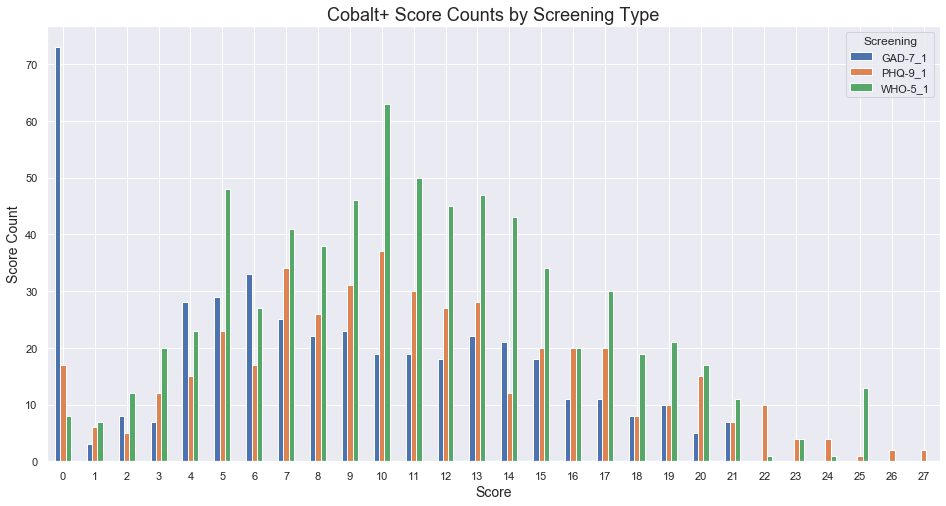

In [53]:
xticks = np.arange(len(screening_plot_data))
xticklabels = set(sorted(screening_plot_data.index.to_list()))
ax = screening_plot_data.plot(figsize=(16,8), kind='bar')

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel('Score', fontsize=14)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_title('Cobalt+ Score Counts by Screening Type', fontsize=18)

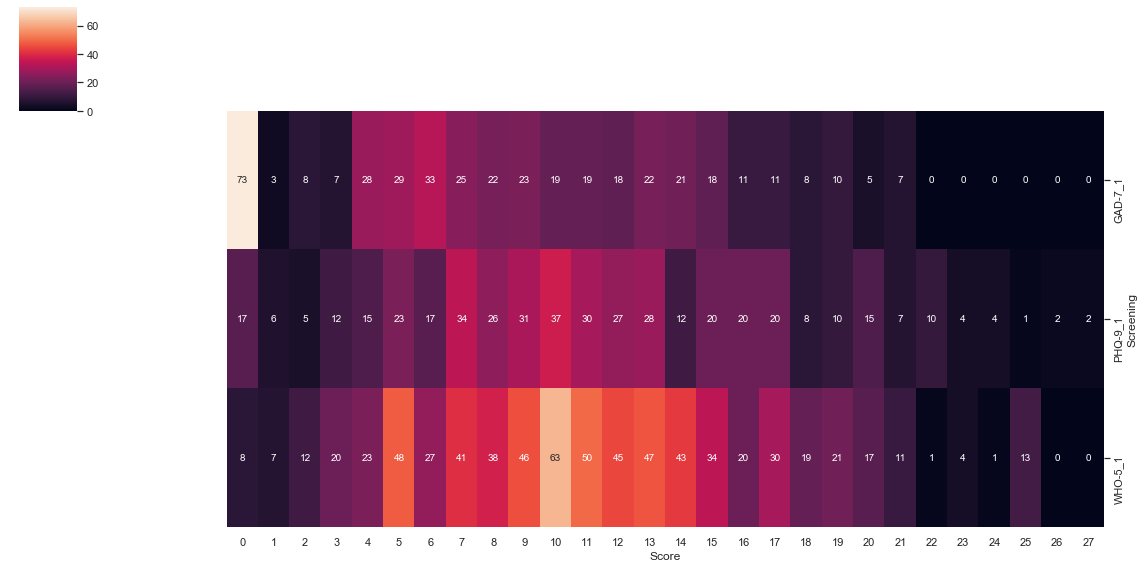

In [54]:
sns.clustermap(screening_plot_data.transpose(),row_cluster=False, col_cluster=False, annot=True, figsize=(16,8))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



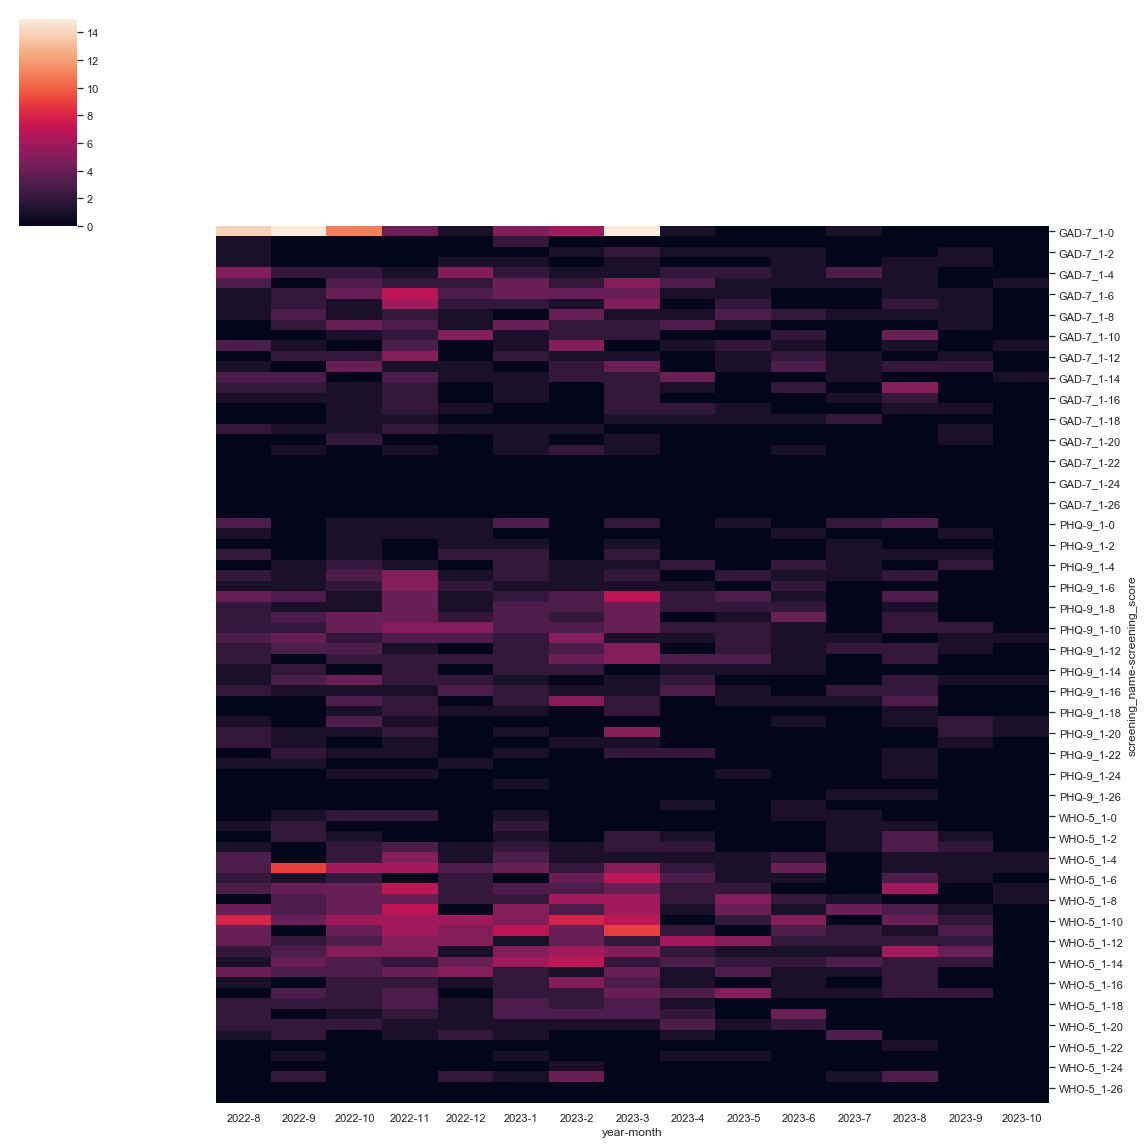

In [55]:
screening_data_temp = screening_data_master.groupby(['created','screening_name','screening_score'])[['screening_session_screening_id']].count().unstack(level=1).droplevel(axis=1, level=0).fillna(0).unstack(level=1).fillna(0)
screening_data_temp['year'] = screening_data_temp.index.year
screening_data_temp['month'] = screening_data_temp.index.month
screening_data_temp['day'] = screening_data_temp.index.day
screening_data_temp['dayofweek'] = screening_data_temp.index.dayofweek

usecols = screening_data_temp.columns[:-4]
screening_data_temp = screening_data_temp.set_index(['year','month'])[usecols].sum(axis=0, level=[0,1]).transpose()
sns.clustermap(screening_data_temp, row_cluster=False, col_cluster=False,figsize=(16,16))

#### Plotting: Cobalt+ Users

In [56]:
screen_target = screening_data_master.merge(study_acct[['account_id','arm']], 
                                            how='inner', 
                                            left_on='target_account_id', 
                                            right_on='account_id', 
                                            indicator='id_source')

screen_target_plot_data = screen_target.groupby(['screening_name','screening_score'])[['screening_session_screening_id']].count()
screen_target_plot_data = screen_target_plot_data.unstack().fillna(0).transpose()
screen_target_plot_data = screen_target_plot_data.droplevel(axis=0,level=0)

screen_target_plot_data.index = screen_target_plot_data.index.rename('Score')
screen_target_plot_data.columns = screen_target_plot_data.columns.rename('Screening')

In [57]:
print('Total Participants:',screen_target_plot_data['WHO-5_1'].sum())
print('Unique Scores:',len(screen_target_plot_data))
print('Unique Screenings',len(screen_target_plot_data.columns))
screen_target_plot_data.head()

Total Participants: 43.0
Unique Scores: 21
Unique Screenings 3


Screening  GAD-7_1  PHQ-9_1  WHO-5_1
Score                               
0              6.0      0.0      0.0
2              0.0      1.0      0.0
3              1.0      0.0      0.0
4              1.0      0.0      0.0
5              2.0      4.0      4.0

Text(0.5, 1.0, 'Native Cobalt+ Score Counts: WHO-5')

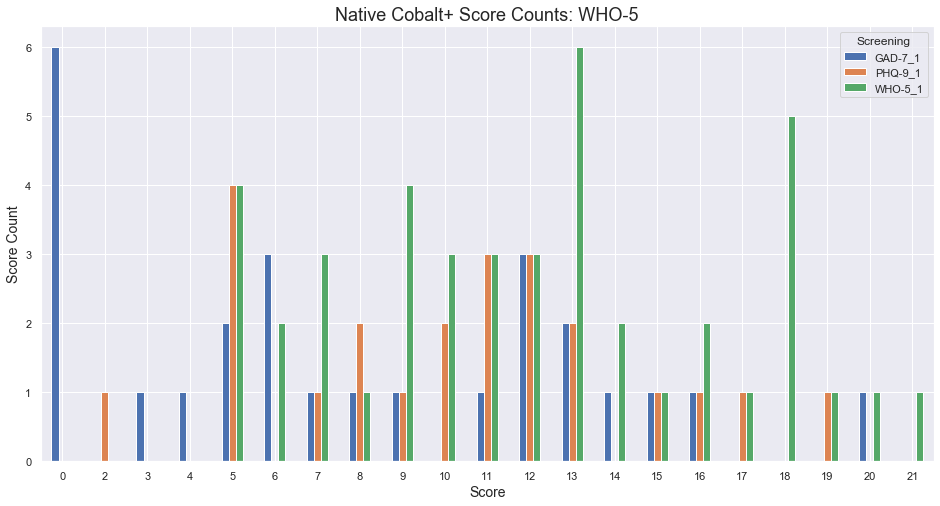

In [58]:
xticks = np.arange(len(screen_target_plot_data))
xticklabels = set(sorted(screen_target_plot_data.index.to_list()))
ax = screen_target_plot_data.plot(figsize=(16,8), kind='bar')

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel('Score', fontsize=14)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_title('Native Cobalt+ Score Counts: WHO-5', fontsize=18)

#### Plotting: Cobalt+ Users by Arm 

In [59]:
screen_target_arm_data = screen_target.groupby(['screening_name','screening_score','arm'])[['screening_session_screening_id']].count()
screen_target_arm_data = screen_target_arm_data.unstack(level=[0,2]).fillna(0)

screen_target_arm_data = screen_target_arm_data.droplevel(axis=1,level=0)
screen_target_arm_data.index = screen_target_arm_data.index.rename('Score')
screen_target_arm_data.columns = screen_target_arm_data.columns.rename(['Screening','Arm'])

In [60]:
print('Total Control Participants:',screen_target_arm_data[('WHO-5_1','Control')].sum())
print('Total Intervention Participants:',screen_target_arm_data[('WHO-5_1','Intervention')].sum())
print('Unique Scores:',len(screen_target_arm_data))
print('Unique Screenings',len(screen_target_arm_data.columns))
screen_target_arm_data.head()

Total Control Participants: 25.0
Total Intervention Participants: 18.0
Unique Scores: 21
Unique Screenings 6


Screening GAD-7_1                   PHQ-9_1         WHO-5_1             
Arm       Control Intervention Intervention Control Control Intervention
Score                                                                   
0             2.0          4.0          0.0     0.0     0.0          0.0
2             0.0          0.0          1.0     0.0     0.0          0.0
3             0.0          1.0          0.0     0.0     0.0          0.0
4             0.0          1.0          0.0     0.0     0.0          0.0
5             1.0          1.0          3.0     1.0     1.0          3.0

Text(0.5, 1.0, 'Native Cobalt+ Score Counts by Control and Intervention: WHO-5')

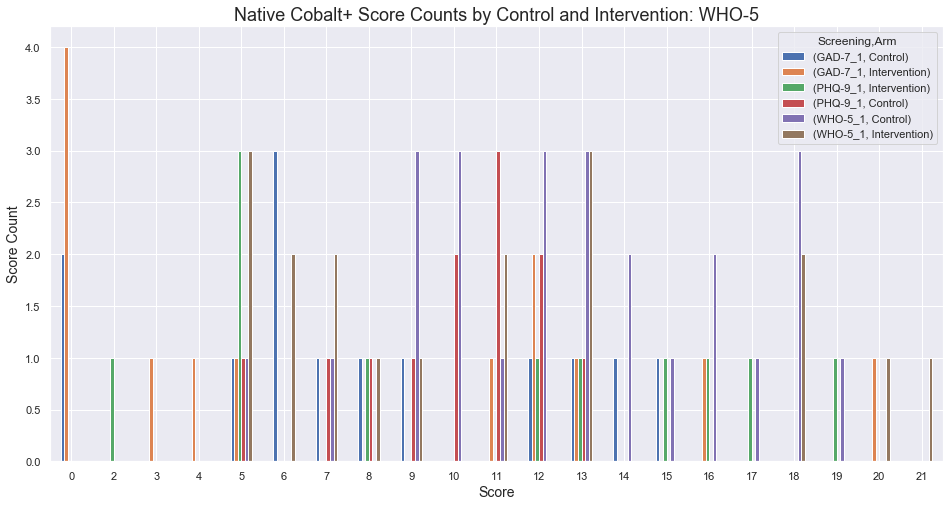

In [61]:
xticks = np.arange(len(screen_target_arm_data))
xticklabels = set(sorted(screen_target_arm_data.index.to_list()))
ax = screen_target_arm_data.plot(figsize=(16,8), kind='bar')

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel('Score', fontsize=14)
ax.set_ylabel('Score Count', fontsize=14)
ax.set_title('Native Cobalt+ Score Counts by Control and Intervention: WHO-5', fontsize=18)

# Data Analysis

## Summary Stats

### Accounts

#### Account Source

In [62]:
# All acounts
study_acct_src_summary = pd.concat([study_acct['account_source_id'].value_counts(0),
                                    study_acct['account_source_id'].value_counts(1)],axis=1)
study_acct_src_summary.columns = ['count','pct']
study_acct_src_summary

count     pct
PENN_SSO        392  0.4906
PENN_KEY_SSO    226  0.2829
ANONYMOUS       181  0.2265

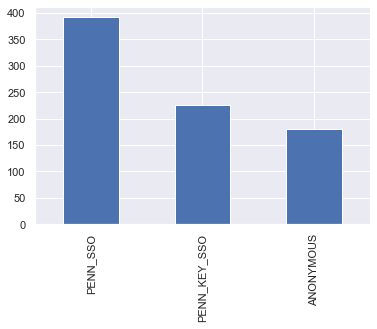

In [63]:
ax = study_acct_src_summary['count'].plot(kind='bar')

In [64]:
# Accounts with appointments
study_appt_acct_src_summary = pd.concat([study_appt_acct['account_source_id'].value_counts(0),
                                        study_appt_acct['account_source_id'].value_counts(1)],axis=1)
study_appt_acct_src_summary.columns = ['count','pct']
study_appt_acct_src_summary

count     pct
PENN_KEY_SSO     99  0.5440
PENN_SSO         52  0.2857
ANONYMOUS        31  0.1703

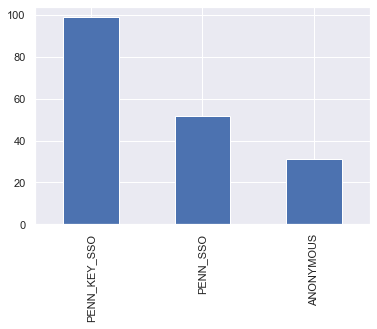

In [65]:
ax = study_appt_acct_src_summary['count'].plot(kind='bar')

### Appointments

#### Appointment Account Source

In [66]:
# All appointments
study_appt_src_summary = pd.concat([study_appt['account_source_id'].value_counts(0),
                                    study_appt['account_source_id'].value_counts(1)],axis=1)
study_appt_src_summary.columns = ['count','pct']
study_appt_src_summary

count     pct
PENN_KEY_SSO    162  0.5294
PENN_SSO        101  0.3301
ANONYMOUS        43  0.1405

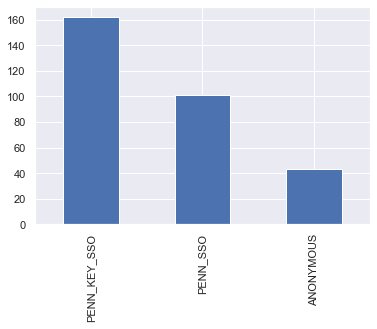

In [67]:
ax = study_appt_src_summary['count'].plot(kind='bar')

#### Provider Support Role

In [68]:
study_appt_06_role_summary = pd.concat([study_appt_06['support_role_id'].value_counts(0),
                                    study_appt_06['support_role_id'].value_counts(1)],axis=1)
study_appt_06_role_summary.columns = ['count','pct']
study_appt_06_role_summary

count     pct
COACH            54  0.4219
CLINICIAN        44  0.3438
CARE_MANAGER     30  0.2344

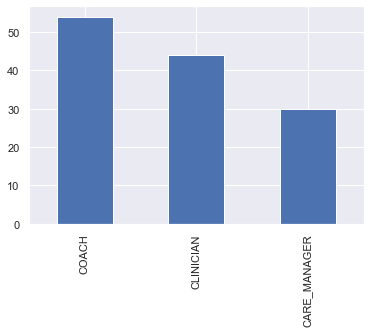

In [69]:
ax = study_appt_06_role_summary['count'].plot(kind='bar')

#### Apppintment Type

In [70]:
study_appt_06['title'].value_counts()

1:1 Session with Resilience Coach       51
1:1 with Care Manager                   47
1:1 Appointment with Psychotherapist    27
Coaching Visit                           2
1:1 Strength and Training Specialist     1
Name: title, dtype: int64

In [71]:
study_appt_06['appointment_type_name'].value_counts()

1:1 Session with Resilience Coach       51
1:1 with Care Manager                   47
1:1 Appointment with Psychotherapist    27
Coaching Visit                           2
1:1 Strength and Training Specialist     1
Name: appointment_type_name, dtype: int64

#### Participant Appointments

In [72]:
study_part_appt_count = study_appt_06.groupby(['participant_id'])['appointment_id'].count().sort_values(ascending=False)
study_acct_appt_count = study_appt_06.groupby(['account_id'])['appointment_id'].count().sort_values(ascending=False)
study_partAcct_appt_count = study_appt_06.groupby(['participant_id','account_id'])['appointment_id'].count().sort_values(ascending=False)

Text(0.5, 1.0, 'Participant Appointment Counts: Histogram')

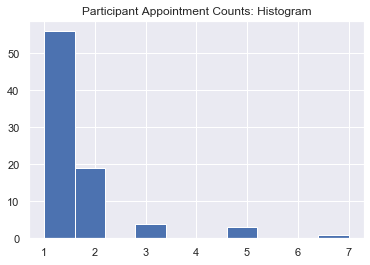

In [73]:
ax = study_part_appt_count.hist(bins=10)
ax.set_title('Participant Appointment Counts: Histogram')

Text(0.5, 1.0, 'Participant Appointment Counts: Cumulative Sum')

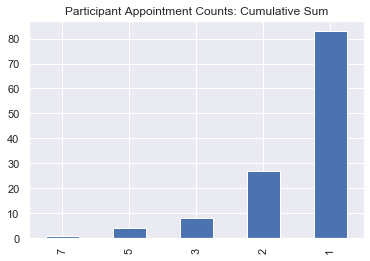

In [74]:
ax = study_part_appt_count.value_counts().sort_index(ascending=False).cumsum().plot(kind='bar')
ax.set_title('Participant Appointment Counts: Cumulative Sum')

Text(0.5, 0.98, 'Histogram of Participant Appointments by Study Arm')

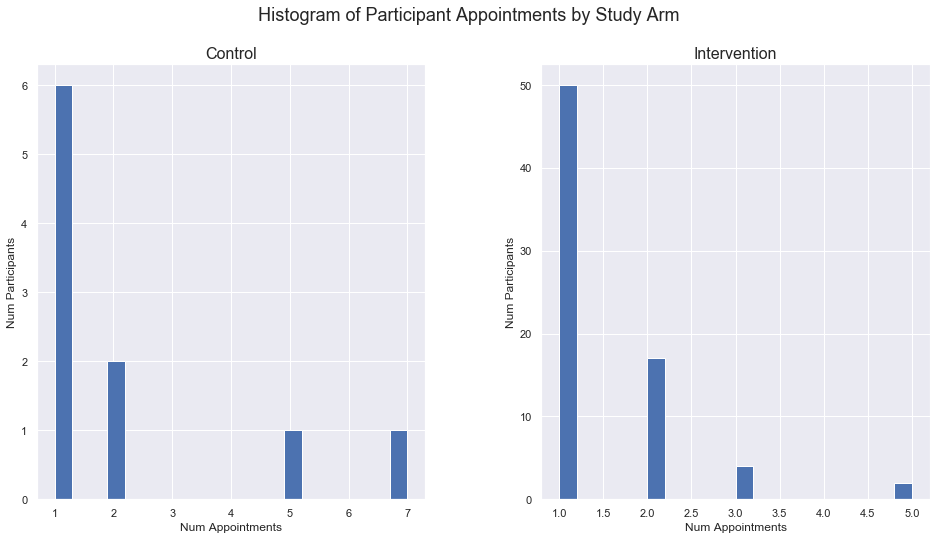

In [411]:
plot_data = study_appt_06.groupby(['participant_id','arm'])['appointment_id'].count().sort_values(ascending=False).unstack()
ax = plot_data.hist(figsize=(16,8),bins=20)
ax[0][0].set_xlabel('Num Appointments')
ax[0][0].set_ylabel('Num Participants')
ax[0][0].set_title('Control', fontsize=16)

ax[0][1].set_xlabel('Num Appointments')
ax[0][1].set_ylabel('Num Participants')
ax[0][1].set_title('Intervention', fontsize=16)

plt.suptitle('Histogram of Participant Appointments by Study Arm', fontsize=18)

In [413]:
plot_data.sum()

arm
Control          22.0
Intervention    106.0
dtype: float64

## Time Series

### Appointments

In [76]:
study_appt.head(2)

appointment_id                           provider_id  \
0  98365dba-f07b-4e89-b4aa-2eca8d37e428  c236acc5-9473-457a-af51-de57bddcb8a3   
1  1cf6c04c-7692-4252-aa2b-10efd8815950  c236acc5-9473-457a-af51-de57bddcb8a3   

                             account_id  acuity_appointment_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3             8.4849e+08   
1  c3256070-e04c-4b11-a1b6-3de08e57d9a6             8.9845e+08   

   acuity_appointment_type_id  acuity_class_id  bluejeans_meeting_id  \
0                         NaN              NaN            1.0494e+08   
1                         NaN              NaN            1.0763e+08   

                    videoconference_url                                 title  \
0  https://bluejeans.com/698184757/7722  1:1 Appointment with Psychotherapist   
1  https://bluejeans.com/515071484/4323  1:1 Appointment with Psychotherapist   

                 start_time            end_time  duration_in_minutes  \
0 2022-07-06 16:00:00-04:00 2022-07-06 17:00:00                   60   
1 2022-09-21 16:00:00-04:00 2022-09-21 17:00:00                   60   

          time_zone  canceled canceled_at                          created  \
0  America/New_York     False         NaT 2022-06-22 16:25:35.721374-04:00   
1  America/New_York     False         NaT 2022-09-15 17:10:08.807789-04:00   

                      last_updated epic_contact_id epic_contact_id_type  \
0 2022-06-22 20:25:35.721374+00:00            None                 None   
1 2022-09-15 21:10:08.807789+00:00            None                 None   

                    appointment_type_id phone_number  \
0  2294b4f1-7fad-454f-a118-06b479356d7d         None   
1  2294b4f1-7fad-454f-a118-06b479356d7d         None   

  videoconference_platform_id                 appointment_reason_id  \
0                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   
1                   BLUEJEANS  3c34a096-2f4d-4091-a9d8-f0381ba079a1   

                  created_by_account_id comment attendance_status_id  \
0  90c9b318-a1be-4b67-b5fb-a7a68559e0e3    None              UNKNOWN   
1  c3256070-e04c-4b11-a1b6-3de08e57d9a6    None              UNKNOWN   

  bluejeans_participant_passcode                  intake_assessment_id  \
0                           7722  5929588e-ee53-4df5-9c62-1656a43ff4cd   
1                           4323  5929588e-ee53-4df5-9c62-1656a43ff4cd   

  scheduling_system_id  canceled_for_reschedule rescheduled_appointment_id  \
0               ACUITY                    False                       None   
1               ACUITY                    False                       None   

              intake_account_session_id interaction_instance_id  \
0  b762db93-d3fd-4933-a856-c56126db5a37                    None   
1  78babe22-e422-476a-96fe-50ad7be01531                    None   

  patient_reminder_scheduled_message_id patient_order_id  \
0                                  None             None   
1                                  None             None   

  epic_appointment_fhir_id  created_year  created_month  created_day  \
0                     None          2022              6           22   
1                     None          2022              9           15   

  created_year_month created_year_month_week created_dayofyear  apt_year  \
0         2022-06-01              2022-06-16          20220622      2022   
1         2022-09-01              2022-09-15          20220915      2022   

   apt_month  apt_day apt_year_month apt_year_month_week apt_dayofyear  \
0          7        6     2022-07-01          2022-06-30      20220706   
1          9       21     2022-09-01          2022-09-15      20220921   

   created_completed_time                 appointment_type_name  \
0                    14.0  1:1 Appointment with Psychotherapist   
1                     6.0  1:1 Appointment with Psychotherapist   

  support_role_id account_source_id participant_id           arm  \
0       CLINICIAN      PENN_KEY_SSO     1000772287  Interventio

In [77]:
# Time series data
study_appt_ts_data = pd.DataFrame(study_appt.groupby(['apt_year','apt_month']).count().appointment_id)
study_appt_ts_data.index.names = ['year','month']
study_appt_weekly_ts_data = pd.DataFrame(study_appt.groupby(['apt_year_month_week']).count().appointment_id)
study_appt_weekly_ts_data.index = pd.MultiIndex.from_arrays([study_appt_weekly_ts_data.index.year, 
                                                      study_appt_weekly_ts_data.index.month, 
                                                      study_appt_weekly_ts_data.index.day], 
                                                      names=['Year','Month','Week'])
study_appt_weekly_ts_data = study_appt_weekly_ts_data.merge(week_index_df, how='outer', left_index=True, right_index=True)# Get missing index values
study_appt_weekly_ts_data = study_appt_weekly_ts_data.fillna(0)

study_appt_completed_ts_data = pd.DataFrame(study_appt_completed.groupby(['apt_year','apt_month']).count().appointment_id)
study_appt_completed_ts_data.index.names = ['year','month']
study_appt_weekly_completed_ts_data = pd.DataFrame(study_appt_completed.groupby(['apt_year_month_week']).count().appointment_id)
study_appt_weekly_completed_ts_data.index = pd.MultiIndex.from_arrays([study_appt_weekly_completed_ts_data.index.year, 
                                                                study_appt_weekly_completed_ts_data.index.month, 
                                                                study_appt_weekly_completed_ts_data.index.day],
                                                                names=['Year','Month','Week'])
study_appt_weekly_completed_ts_data = study_appt_weekly_completed_ts_data.merge(week_index_df, how='outer', left_index=True, right_index=True)# Get missing index values
study_appt_weekly_completed_ts_data = study_appt_weekly_completed_ts_data.fillna(0)

study_appt_canceled_ts_data = pd.DataFrame(study_appt_canceled.groupby(['apt_year','apt_month']).count().appointment_id)
study_appt_canceled_ts_data.index.names = ['year','month']
study_appt_weekly_canceled_ts_data = pd.DataFrame(study_appt_canceled.groupby(['apt_year_month_week']).count().appointment_id)
study_appt_weekly_canceled_ts_data.index = pd.MultiIndex.from_arrays([study_appt_weekly_canceled_ts_data.index.year, 
                                                                study_appt_weekly_canceled_ts_data.index.month, 
                                                                study_appt_weekly_canceled_ts_data.index.day],
                                                                names=['Year','Month','Week'])
study_appt_weekly_canceled_ts_data = study_appt_weekly_canceled_ts_data.merge(week_index_df, how='outer', left_index=True, right_index=True)# Get missing index values
study_appt_weekly_canceled_ts_data = study_appt_weekly_canceled_ts_data.fillna(0)

# Time series data by provider role
study_apptRole_ts_data = pd.DataFrame(study_appt.groupby(['apt_year','apt_month','support_role_id']).count().appointment_id)
study_apptRole_ts_data = study_apptRole_ts_data.unstack().fillna(0).appointment_id
study_apptRole_ts_data.index.names = ['year','month']

study_apptRole_weekly_ts_data = pd.DataFrame(study_appt.groupby(['apt_year_month_week', 'support_role_id']).count()).appointment_id
study_apptRole_weekly_ts_data = study_apptRole_weekly_ts_data.unstack().fillna(0)
study_apptRole_weekly_ts_data.index = pd.MultiIndex.from_arrays([study_apptRole_weekly_ts_data.index.year, 
                                                      study_apptRole_weekly_ts_data.index.month, 
                                                      study_apptRole_weekly_ts_data.index.day], 
                                                      names=['Year','Month','Week'])
study_apptRole_weekly_ts_data = study_apptRole_weekly_ts_data.merge(week_index_df, how='outer', left_index=True, right_index=True)# Get missing index values
study_apptRole_weekly_ts_data = study_apptRole_weekly_ts_data.fillna(0)

# Time series data by account source
study_apptSrc_ts_data = pd.DataFrame(study_appt.groupby(['apt_year','apt_month','account_source_id']).count().appointment_id)
study_apptSrc_ts_data = study_apptSrc_ts_data.unstack().fillna(0).appointment_id
study_apptSrc_ts_data.index.names = ['year','month']

study_apptSrc_weekly_ts_data = pd.DataFrame(study_appt.groupby(['apt_year_month_week', 'account_source_id']).count()).appointment_id
study_apptSrc_weekly_ts_data = study_apptSrc_weekly_ts_data.unstack().fillna(0)
study_apptSrc_weekly_ts_data.index = pd.MultiIndex.from_arrays([study_apptSrc_weekly_ts_data.index.year, 
                                                      study_apptSrc_weekly_ts_data.index.month, 
                                                      study_apptSrc_weekly_ts_data.index.day], 
                                                      names=['Year','Month','Week'])
study_apptSrc_weekly_ts_data = study_apptSrc_weekly_ts_data.merge(week_index_df, how='outer', left_index=True, right_index=True)# Get missing index values
study_apptSrc_weekly_ts_data = study_apptSrc_weekly_ts_data.fillna(0)

# Time series data by study arm
study_apptArm_ts_data = pd.DataFrame(study_appt.groupby(['apt_year','apt_month','arm']).count().appointment_id)
study_apptArm_ts_data = study_apptArm_ts_data.unstack().fillna(0).appointment_id
study_apptArm_ts_data.index.names = ['year','month']

study_apptArm_weekly_ts_data = pd.DataFrame(study_appt.groupby(['apt_year_month_week', 'arm']).count()).appointment_id
study_apptArm_weekly_ts_data = study_apptArm_weekly_ts_data.unstack().fillna(0)
study_apptArm_weekly_ts_data.index = pd.MultiIndex.from_arrays([study_apptArm_weekly_ts_data.index.year, 
                                                      study_apptArm_weekly_ts_data.index.month, 
                                                      study_apptArm_weekly_ts_data.index.day], 
                                                      names=['Year','Month','Week'])
study_apptArm_weekly_ts_data = study_apptArm_weekly_ts_data.merge(week_index_df, how='outer', left_index=True, right_index=True)# Get missing index values
study_apptArm_weekly_ts_data = study_apptArm_weekly_ts_data.fillna(0)

In [78]:
pd.DataFrame(study_appt_06.groupby(['apt_year_month_week', 'arm', 'support_role_id']).count()).appointment_id.unstack().fillna(0).sum(axis=0,level=1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



support_role_id  CARE_MANAGER  CLINICIAN  COACH
arm                                            
Control                   3.0       15.0    4.0
Intervention             27.0       29.0   50.0

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().



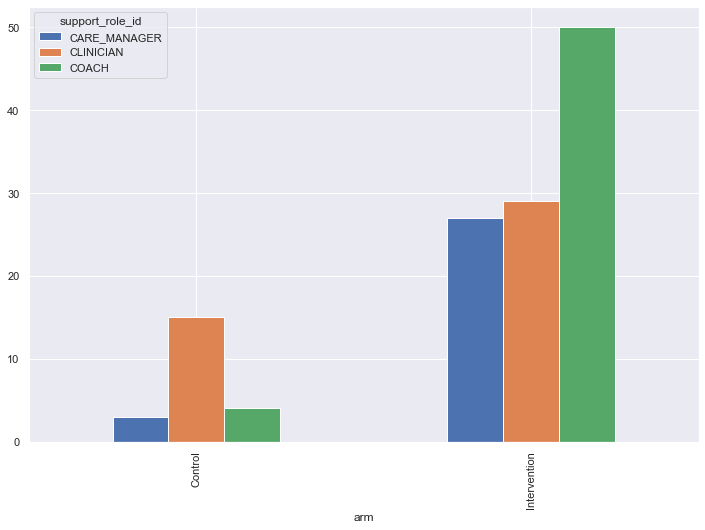

In [79]:
pd.DataFrame(study_appt_06.groupby(['apt_year_month_week', 'arm', 'support_role_id']).count()).appointment_id.unstack().fillna(0).sum(axis=0,level=1).plot(figsize=(12,8),kind='bar')

In [80]:
# Compare study appt counts to all appt counts for same time interval
# At height, study appts accounts for over 40% of all cobalt appts!
study_appt_baseline = study_appt_weekly_ts_data.merge(apt_weekly_ts_data, how='left', left_index=True, right_index=True)
study_appt_baseline = study_appt_baseline.rename(columns={'appointment_id_x':'study_appts', 'appointment_id_y':'all_appts'})
study_appt_baseline['study_appts_pct'] = (study_appt_baseline['study_appts']/study_appt_baseline['all_appts'])*100
study_appt_baseline.head(2)

study_appts  all_appts  study_appts_pct
Year Month Week                                         
2020 4     9             0.0          4           0.0000
           16            2.0         24           8.3333

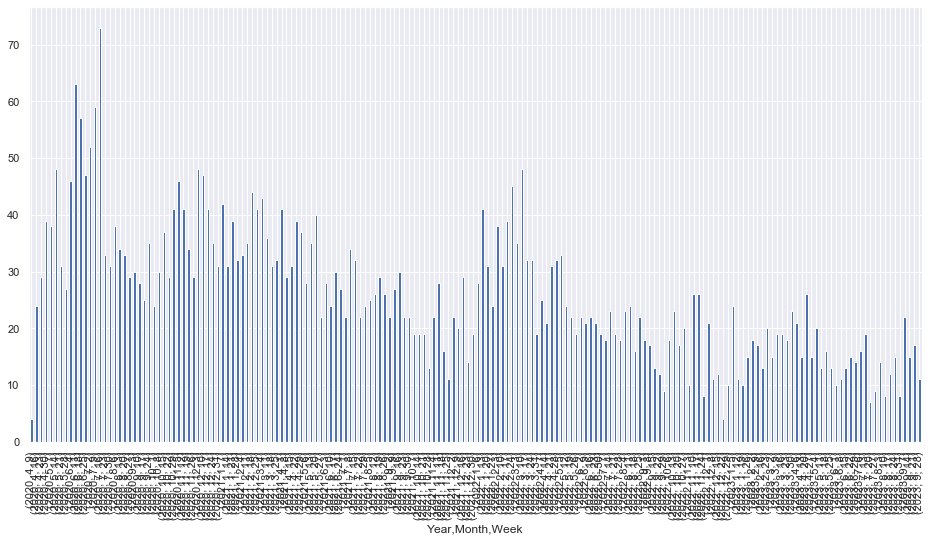

In [81]:
# all cobalt appts
study_appt_baseline['all_appts'].plot(figsize=(16,8),kind='bar')

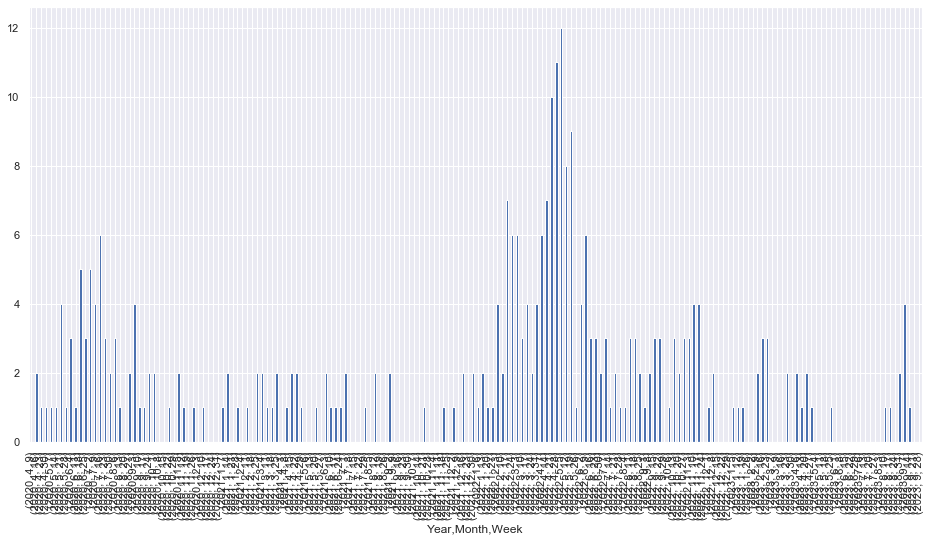

In [82]:
# all study appts
study_appt_baseline['study_appts'].plot(figsize=(16,8),kind='bar')

Mean: 6.747
Median: 4.257
Std. Dev.: 8.343
Min: 0.0
Max: 40.909


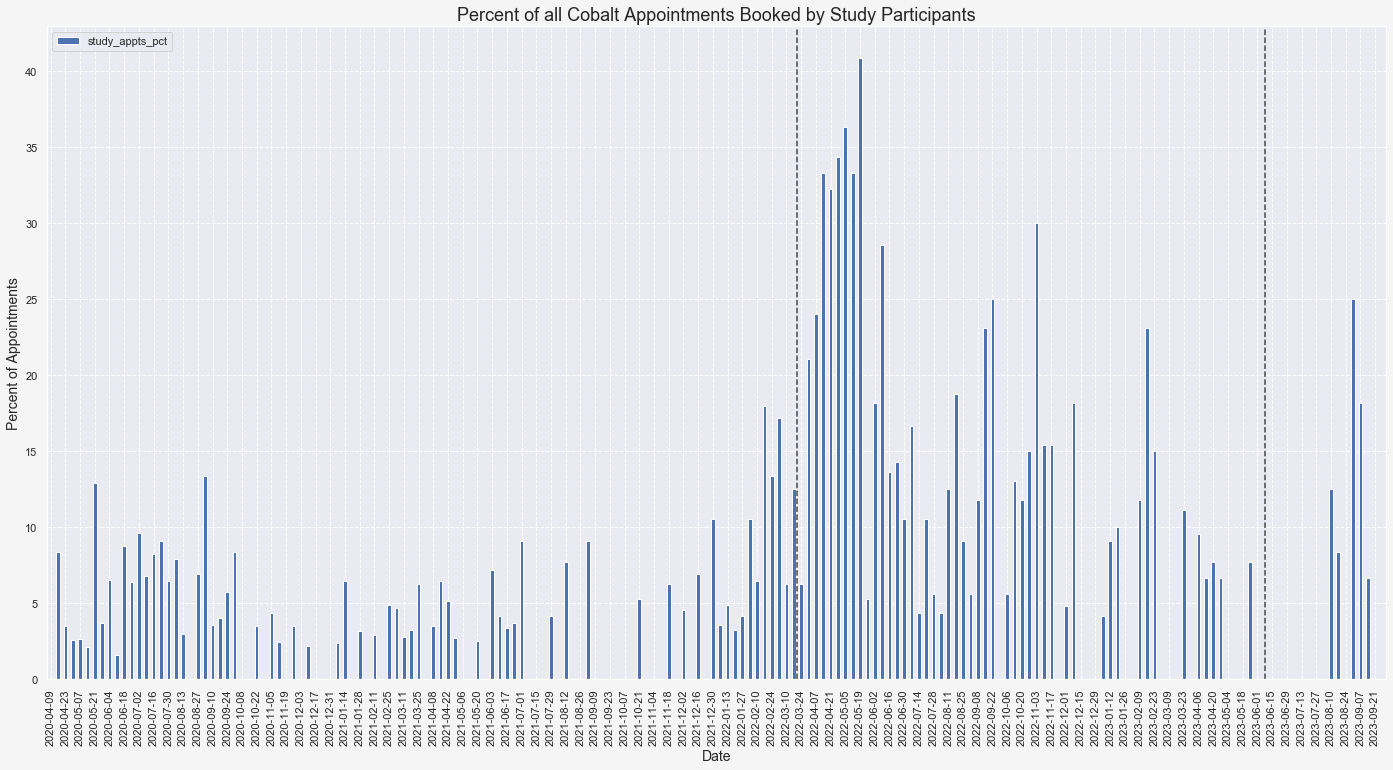

In [83]:
# pct of all cobalt appts by all study participants
print('Mean:',round(study_appt_baseline['study_appts_pct'].mean(),3))
print('Median:',round(study_appt_baseline['study_appts_pct'].median(),3))
print('Std. Dev.:',round(study_appt_baseline['study_appts_pct'].std(),3))
print('Min:',round(study_appt_baseline['study_appts_pct'].min(),3))
print('Max:',round(study_appt_baseline['study_appts_pct'].max(),3))

xlabels = get_ts_xlabels(index=study_appt_baseline.index, time='weekly')
fig, ax = plt.subplots(figsize=(24,12), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
study_appt_baseline['study_appts_pct'].plot(ax=ax, kind='bar')
ax.set_title('Percent of all Cobalt Appointments Booked by Study Participants', fontsize=18)
ax.set_xlabel('Date',fontsize=14)
ax.set_xticks(np.arange(0,len(study_appt_baseline),2))
ax.set_xticklabels(xlabels[::2], rotation=90)
ax.set_ylabel('Percent of Appointments',fontsize=14)

ax.legend([study_appt_baseline.columns[-1]])

ax.axvline(len(xlabels)/2+10.5, color='black', ls='--', alpha=0.7)
ax.axvline(len(xlabels)-17, color='black', ls='--', alpha=0.7)

In [84]:
# MIGHT work for appts and text EVENTS - needs to be corrected heavily for group and content(links) creation dates
#### MAKE A MONTH AND/OR A WEEK INDEX TO USE AS UNIVERSAL STARTING POINT (I.E. "DAYS FROM ENROLLMENT")
#### CAN ANALYZE ALL PARTICIPANTS IN THEIR MONTH/WEEK 1, 2, 3, ETC. (APPTS, GROUPS, CONTENT, TEXTS/LINKS)
#### SEASONALITY, AND OTHER PARTICIPANT [SUB]GROUPINGS WILL NEED TO BE CONSIDERED CAREFULLY

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



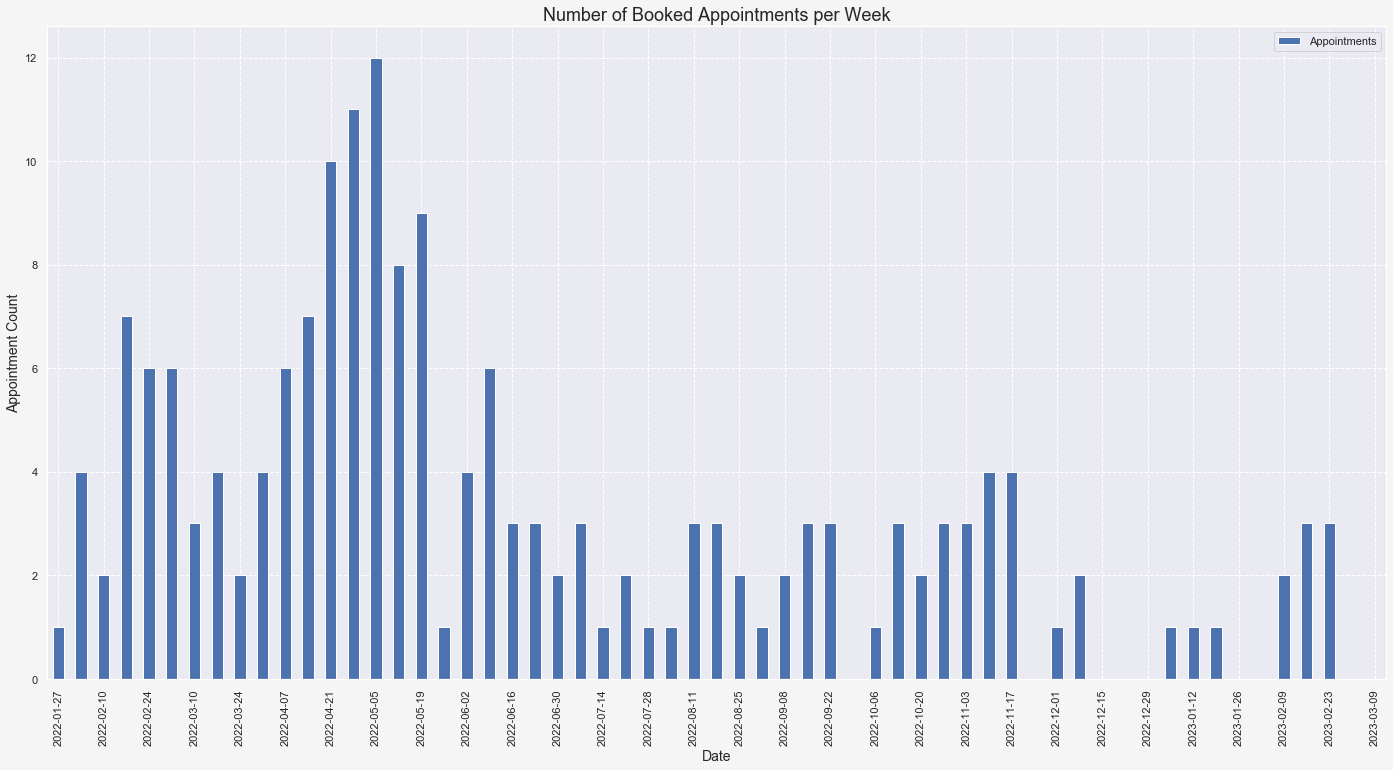

In [199]:
# Plot
plot_data = study_appt_weekly_ts_data.loc[(2022,1,27):(2023,3,9)]
xlabels = get_ts_xlabels(index=plot_data.index, time='weekly')
fig, ax = plt.subplots(figsize=(24,12), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
plot_data.plot(ax=ax, kind='bar', stacked=True)
ax.set_title('Number of Booked Appointments per Week', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(0,len(plot_data),2))
ax.set_xticklabels(xlabels[::2], rotation=90)
ax.set_ylabel('Appointment Count', fontsize=14)
#ax.set_xlim(0,len(plot_data)-4)
#ax.set_ylim(0,APT_WEEKLY_YMAX)

ax.legend(plot_data.columns, labels=['Appointments'])

#ax.axvline(len(xlabels)/2+10.5, color='black', ls='--', alpha=0.7)
#ax.axvline(len(xlabels)-17, color='black', ls='--', alpha=0.7)

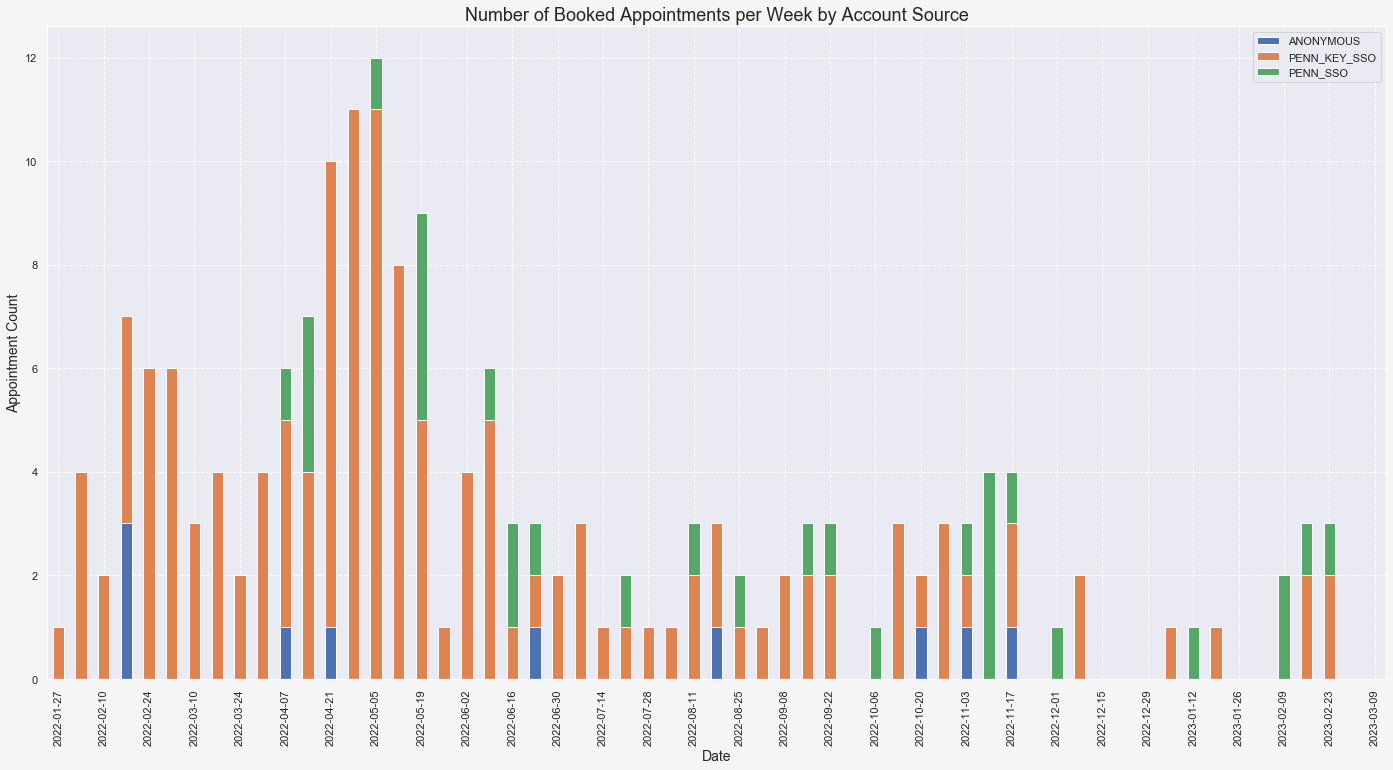

In [203]:
# Plot
plot_data = study_apptSrc_weekly_ts_data.loc[(2022,1,27):(2023,3,9)]
xlabels = get_ts_xlabels(index=plot_data.index, time='weekly')
fig, ax = plt.subplots(figsize=(24,12), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
plot_data.plot(ax=ax, kind='bar', stacked=True)
ax.set_title('Number of Booked Appointments per Week by Account Source', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(0,len(plot_data),2))
ax.set_xticklabels(xlabels[::2], rotation=90)
ax.set_ylabel('Appointment Count', fontsize=14)
#ax.set_xlim(0,len(plot_data)-4)
#ax.set_ylim(0,APT_WEEKLY_YMAX)

ax.legend(plot_data.columns)

#ax.axvline(len(xlabels)/2+10.5, color='black', ls='--', alpha=0.7)
#ax.axvline(len(xlabels)-17, color='black', ls='--', alpha=0.7)

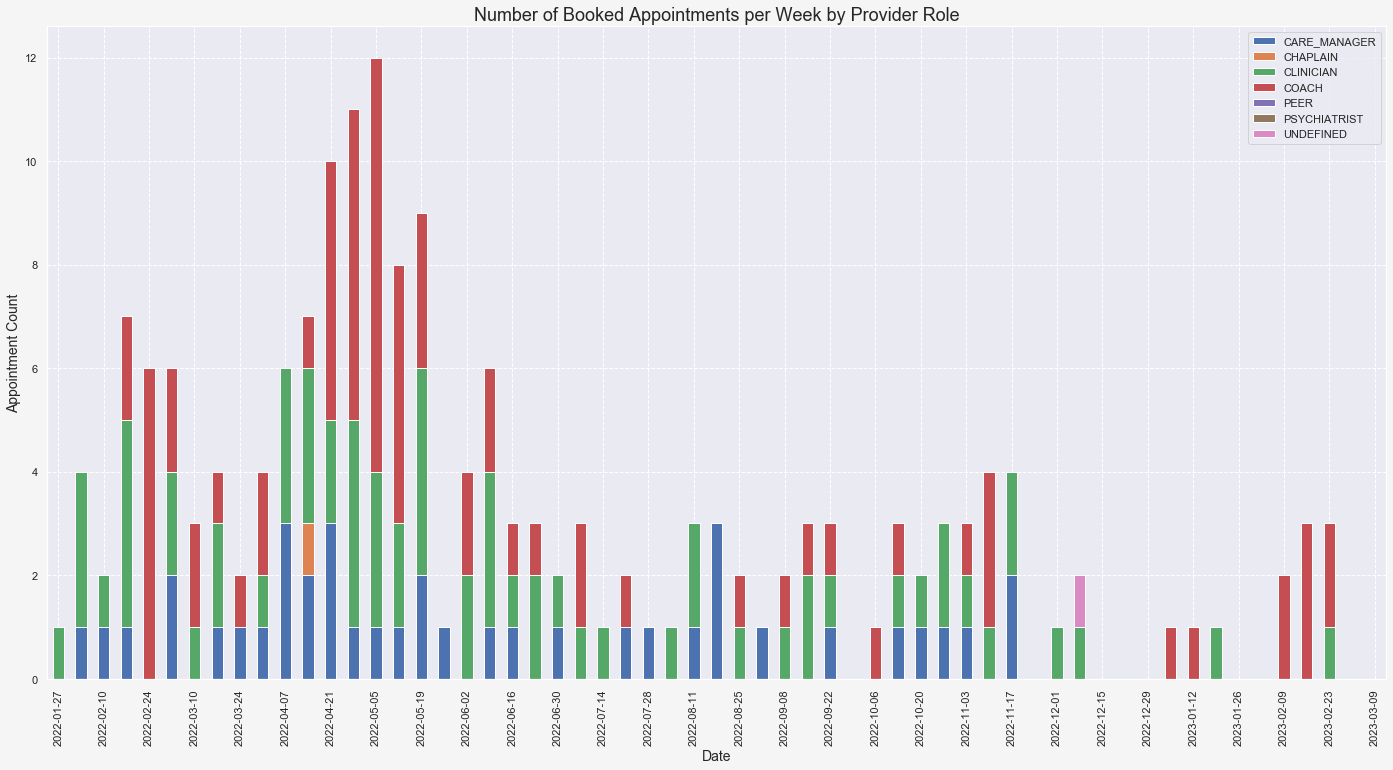

In [204]:
# Plot
plot_data = study_apptRole_weekly_ts_data.loc[(2022,1,27):(2023,3,9)]
xlabels = get_ts_xlabels(index=plot_data.index, time='weekly')
fig, ax = plt.subplots(figsize=(24,12), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
plot_data.plot(ax=ax, kind='bar', stacked=True)
ax.set_title('Number of Booked Appointments per Week by Provider Role', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(0,len(plot_data),2))
ax.set_xticklabels(xlabels[::2], rotation=90)
ax.set_ylabel('Appointment Count', fontsize=14)
#ax.set_xlim(0,len(plot_data)-4)
#ax.set_ylim(0,APT_WEEKLY_YMAX)

ax.legend(plot_data.columns)

#ax.axvline(len(xlabels)/2+10.5, color='black', ls='--', alpha=0.7)
#ax.axvline(len(xlabels)-17, color='black', ls='--', alpha=0.7)

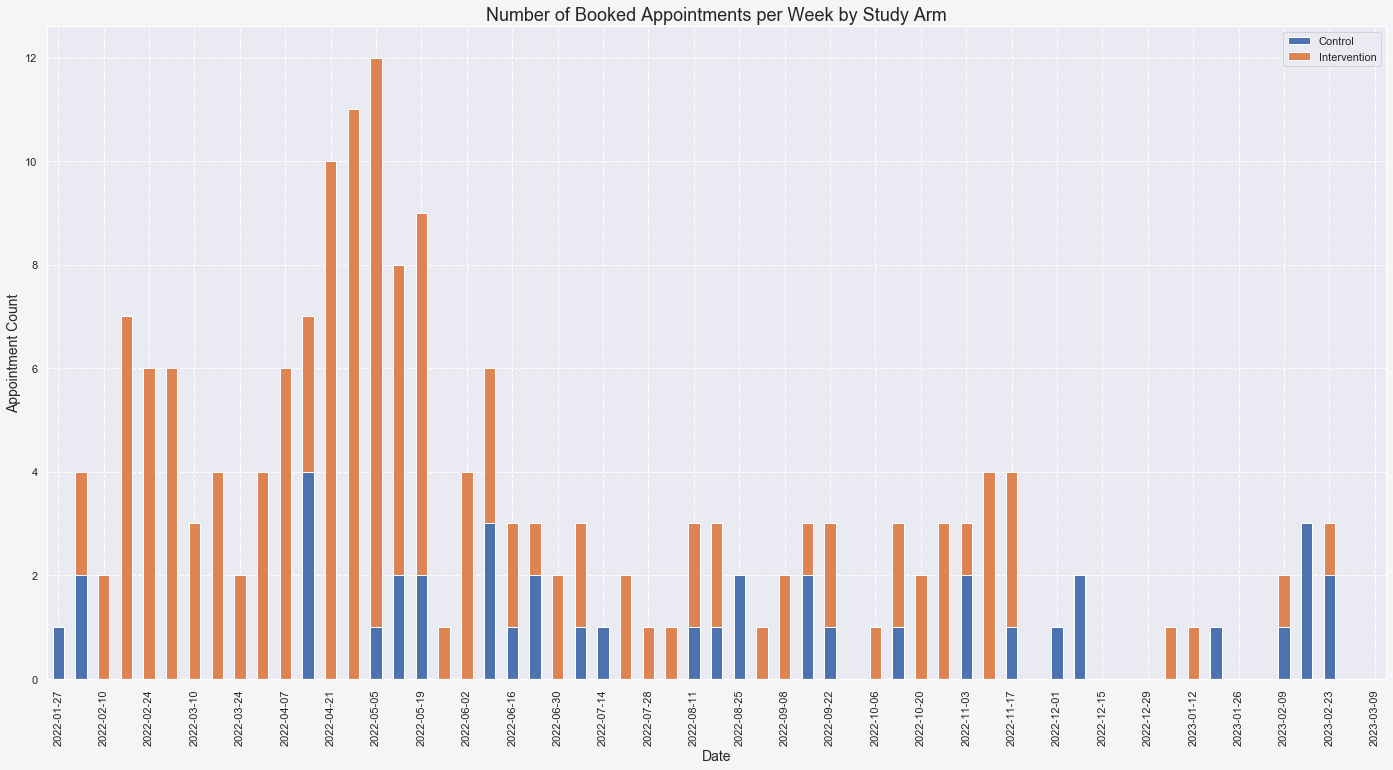

In [205]:
# Plot
plot_data = study_apptArm_weekly_ts_data.loc[(2022,1,27):(2023,3,9)]
xlabels = get_ts_xlabels(index=plot_data.index, time='weekly')
fig, ax = plt.subplots(figsize=(24,12), facecolor='whitesmoke')
plt.grid(True, linestyle='--')
plot_data.plot(ax=ax, kind='bar', stacked=True)
ax.set_title('Number of Booked Appointments per Week by Study Arm', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_xticks(np.arange(0,len(plot_data),2))
ax.set_xticklabels(xlabels[::2], rotation=90)
ax.set_ylabel('Appointment Count', fontsize=14)
#ax.set_xlim(0,len(plot_data)-4)
#ax.set_ylim(0,APT_WEEKLY_YMAX)

ax.legend(plot_data.columns)

#ax.axvline(len(xlabels)/2+10.5, color='black', ls='--', alpha=0.7)
#ax.axvline(len(xlabels)-17, color='black', ls='--', alpha=0.7)

In [89]:
days_from_start = (study_appt_06['start_time'] - study_appt_06['start_date']).dt.ceil('d')

bins = []
start=1
delta=7
end = days_from_start.max()//pd.Timedelta(delta,'d') + 2

for x in range(start,end*delta,delta):
    bins.append(pd.Timedelta(x,'d'))

bin_output = pd.cut(days_from_start, bins=bins, right=False, include_lowest=True, retbins=True)

In [90]:
plot_data = pd.concat([study_appt_06,days_from_start,bin_output[0]],axis=1)
plot_data = plot_data.rename(columns={0:'days_from_start',1:'bin_range'})
plot_data['bin_left'] = plot_data['bin_range'].apply(lambda x: x.left).copy()
plot_data['bin_right'] = plot_data['bin_range'].apply(lambda x: x.right).copy()

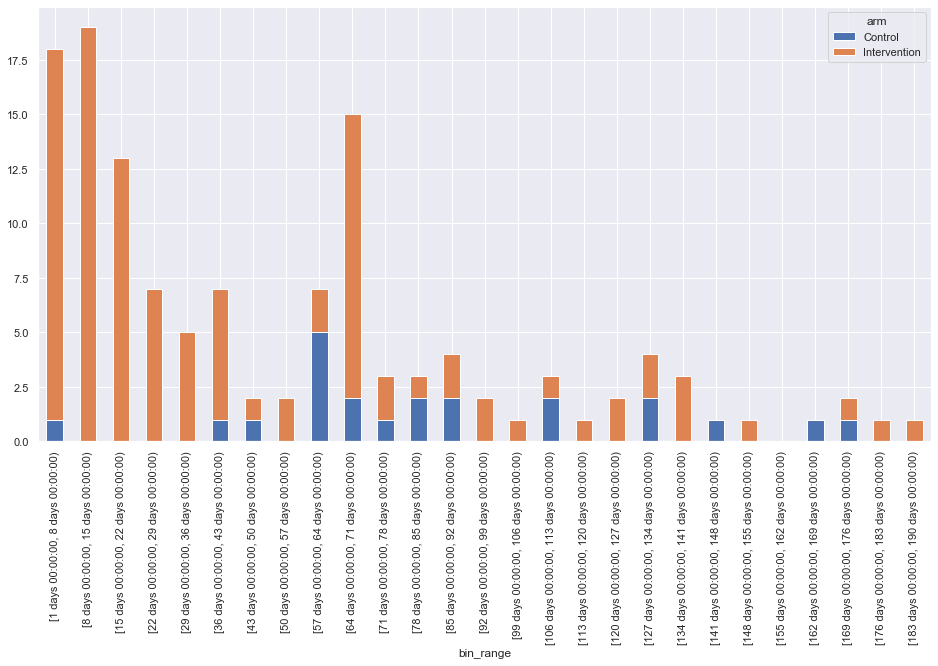

In [91]:
plot_data.groupby(['bin_range','arm'])[['appointment_id']].count().unstack().droplevel(axis=1,level=0).plot(figsize=(16,8),kind='bar',stacked=True)

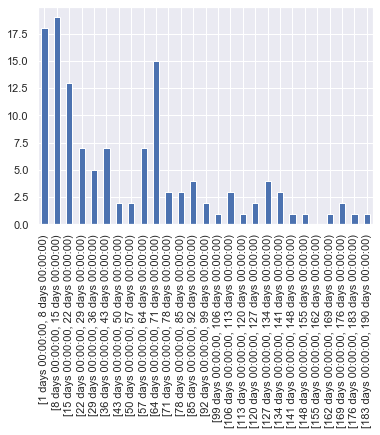

In [92]:
bin_output[0].value_counts().sort_index().plot(kind='bar')

In [93]:
intervention_v2 = pd.read_csv(COBALT_PLUS_DATA_PATH +'allintervention-v2.csv', dtype={'Participant':'str'})
intervention_v2 = intervention_v2.dropna(how='all')
print(len(intervention_v2))
print(len(intervention_v2.columns))
print(len(intervention_v2.Participant.unique()))
intervention_v2.head(2)

1891
26
642


Participant           Arm enrollment_start_date Notification      timestamp  \
0  1000728614  Intervention         1/31/22 16:52          SMS  1/31/22 17:11   
1  1000730208  Intervention          2/3/22 13:33          SMS   2/3/22 13:37   

  phq9_1 phq9_2 phq9_3 phq9_4 phq9_5 phq9_6 phq9_7 phq9_8 phq9_9 GAD7_1  \
0      0      0      0      1      0      1      1      0      0      1   
1      0      0      1      2      0      0      0      0      0      1   

  GAD7_2 GAD7_3 GAD7_4 GAD7_5 GAD7_6 GAD7_7  phq9_value  gad7_value  \
0      1      1      0      0      1      0         3.0         4.0   
1      0      1      1      0      1      0         3.0         4.0   

   Unnamed: 23    survey  \
0          NaN  baseline   
1          NaN  baseline   

  missing data - did they receive an appt recommendation  
0                                                NaN      
1                                                NaN

In [94]:
intervention_v2_has_appt = enrollment[(enrollment['participant_id'].isin(intervention_v2['Participant'].unique())) & 
                                     (enrollment['has_appt_06']==1)]
intervention_v2_has_appt_summary = intervention_v2_has_appt.iloc[:,9:].sum()

In [95]:
print(len(intervention_v2_has_appt))
print(len(intervention_v2_has_appt.columns))
intervention_v2_has_appt.head(2)

73
21


participant_id           arm                start_date  \
0      1000728614  Intervention 2022-01-31 00:00:00-05:00   
36     1000731479  Intervention 2022-02-07 00:00:00-05:00   

                    6_months                  9_months  pennkey  \
0  2022-07-31 00:00:00-04:00 2022-10-31 00:00:00-04:00    rasch   
36 2022-08-07 00:00:00-04:00 2022-11-07 00:00:00-05:00  doshihe   

   pennkey_confirmed                              primary_email  \
0              rasch  rachelle.schneider@pennmedicine.upenn.edu   
36           doshihe         hersh.doshi@pennmedicine.upenn.edu   

             secondary_email  num_appt_06  num_appt_06_completed  \
0     rasch@alumni.upenn.edu          3.0                    3.0   
36  hershajaydoshi@gmail.com          1.0                    1.0   

    num_appt_06_canceled  has_appt_06  has_appt_06_completed  num_appt_69  \
0                    0.0            1                      1          0.0   
36                   0.0            1                      1          0.0   

    num_appt_69_completed  num_appt_69_canceled  has_appt_69  \
0                     0.0                   0.0            0   
36                    0.0                   0.0            0   

    has_appt_69_completed  num_acct  has_acct  
0                       0       3.0       1.0  
36                      0       2.0       1.0

In [96]:
intervention_v2_has_appt_summary

num_appt_06              106.0
num_appt_06_completed     82.0
num_appt_06_canceled      24.0
has_appt_06               73.0
has_appt_06_completed     64.0
num_appt_69               11.0
num_appt_69_completed      8.0
num_appt_69_canceled       3.0
has_appt_69                7.0
has_appt_69_completed      7.0
num_acct                 127.0
has_acct                  73.0
dtype: float64

In [97]:
save_name = COBALT_PLUS_DATA_PATH + 'intervention_v2_has_appt_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
intervention_v2_has_appt.to_csv(save_name)

In [98]:
save_name = COBALT_PLUS_DATA_PATH + 'intervention_v2_has_appt_summary_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
intervention_v2_has_appt_summary.to_csv(save_name)

In [99]:
intervention_v2_no_appt = enrollment[(enrollment['participant_id'].isin(intervention_v2['Participant'].unique())) & 
                                     (enrollment['has_appt_06']==0)]
intervention_v2_no_appt_summary = intervention_v2_no_appt.iloc[:,9:].sum()

In [100]:
print(len(intervention_v2_no_appt))
print(len(intervention_v2_no_appt.columns))
intervention_v2_no_appt.head(2)

568
21


participant_id           arm                start_date  \
2     1000730208  Intervention 2022-02-03 00:00:00-05:00   
4     1000730770  Intervention 2022-02-04 00:00:00-05:00   

                   6_months                  9_months  pennkey  \
2 2022-08-03 00:00:00-04:00 2022-11-03 00:00:00-04:00   garvin   
4 2022-08-04 00:00:00-04:00 2022-11-04 00:00:00-04:00  bradenk   

  pennkey_confirmed                         primary_email  \
2            garvin  eugenia.south@pennmedicine.upenn.edu   
4           bradenk        keenabr@pennmedicine.upenn.edu   

             secondary_email  num_appt_06  num_appt_06_completed  \
2       e.c.garvin@gmail.com          0.0                    0.0   
4  bradenk@nursing.upenn.edu          0.0                    0.0   

   num_appt_06_canceled  has_appt_06  has_appt_06_completed  num_appt_69  \
2                   0.0            0                      0          0.0   
4                   0.0            0                      0          0.0   

   num_appt_69_completed  num_appt_69_canceled  has_appt_69  \
2                    0.0                   0.0            0   
4                    0.0                   0.0            0   

   has_appt_69_completed  num_acct  has_acct  
2                      0       2.0       1.0  
4                      0       0.0       0.0

In [101]:
intervention_v2_no_appt_summary

num_appt_06                0.0
num_appt_06_completed      0.0
num_appt_06_canceled       0.0
has_appt_06                0.0
has_appt_06_completed      0.0
num_appt_69                5.0
num_appt_69_completed      4.0
num_appt_69_canceled       1.0
has_appt_69                5.0
has_appt_69_completed      4.0
num_acct                 325.0
has_acct                 225.0
dtype: float64

In [102]:
save_name = COBALT_PLUS_DATA_PATH + 'intervention_v2_no_appt_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
intervention_v2_no_appt.to_csv(save_name)

In [103]:
save_name = COBALT_PLUS_DATA_PATH + 'intervention_v2_no_appt_summary_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
intervention_v2_no_appt_summary.to_csv(save_name)

# Bitly Links

## Process Files

In [104]:
file_paths = []
file_names = []
raw_data = []
file_id = 0
record_id = 0
for file_path in glob.glob(BITLY_DATA_PATH + '*.csv'):
    file_name = file_path.split('/')[-1]
    date_range_start = file_name.split('_')[-3]
    date_range_end = '-'.join(file_name.split('_')[-1].split('-')[0:3])
    
    file_data = pd.read_csv(file_path)
    file_data['date_range_start'] = date_range_start
    file_data['date_range_end'] = date_range_end
    
    record_id_col_loc = 0
    record_id_col_name = 'record_id'
    record_id_col_values = ['rid'+str(record_id).zfill(4) for record_id in range(record_id,record_id+len(file_data))]
    file_data.insert(loc=record_id_col_loc, column=record_id_col_name, value=record_id_col_values)
    
    file_id_col_loc = 1
    file_id_col_name = 'file_id'
    file_id_col_values = 'fid'+str(file_id).zfill(4)
    file_data.insert(loc=file_id_col_loc, column=file_id_col_name, value=file_id_col_values)
    
    file_paths.append(file_path)
    file_names.append(file_name)
    raw_data.append(file_data)
    file_id += 1
    record_id += len(file_data)

In [105]:
print(sum([len(item) for item in raw_data]), 'rows')
print(len(raw_data[0].columns), 'columns')
print(len(raw_data), 'files')

653 rows
12 columns
51 files


## Build Master Data

In [106]:
# Raw bitly data
bitly_data = pd.concat(raw_data)

# Adjust column formatting
bitly_data.columns = bitly_data.columns.str.strip()
bitly_data.columns = bitly_data.columns.str.lower()
bitly_data.columns = bitly_data.columns.str.replace(' ','_')

# Adjust column data types
time_cols = ['date_created','date_range_start','date_range_end']
for col in time_cols:
    bitly_data[col] = pd.to_datetime(bitly_data[col])
    
# Add relevant columns
bitly_data['created_start'] = bitly_data['date_range_start'] - bitly_data['date_created']
bitly_data['created_end'] = bitly_data['date_range_end'] - bitly_data['date_created']
bitly_data['start_end'] = bitly_data['date_range_end'] - bitly_data['date_range_start']

# Sort by created date
bitly_data = bitly_data.reset_index(drop=True)

In [107]:
print(len(bitly_data), 'rows')
print(len(bitly_data.columns), 'columns')
bitly_data.head(5)

653 rows
15 columns


record_id  file_id                             bitlink  \
0   rid0000  fid0000  https://penncobaltplus.com/3vLl4Ax   
1   rid0001  fid0000   http://penncobaltplus.com/34eQu6Y   
2   rid0002  fid0001  https://penncobaltplus.com/35r1wGN   
3   rid0003  fid0001   http://penncobaltplus.com/34eQu6Y   
4   rid0004  fid0001   http://penncobaltplus.com/32J7q5g   

                                   custom_bitlink date_created   title  \
0          https://penncobaltplus.com/ClinCardFAQ   2022-05-05     Box   
1     http://penncobaltplus.com/connect-with-peer   2022-01-28  Cobalt   
2               https://penncobaltplus.com/survey   2022-01-28     NaN   
3     http://penncobaltplus.com/connect-with-peer   2022-01-28  Cobalt   
4  http://penncobaltplus.com/connect-with-support   2022-01-28  Cobalt   

                                            long_url  clicks_for_all_time  \
0  https://upenn.box.com/s/mxlafo5echcubp30ru8kam...                  224   
1  https://www.penncobalt.com/connect-with-suppor...                  563   
2  https://redcap.link/cobaltRCT?utm_source=redca...                  712   
3  https://www.penncobalt.com/connect-with-suppor...                  251   
4  https://www.penncobalt.com/connect-with-suppor...                  110   

   clicks_for_date_range  status date_range_start date_range_end  \
0                      7     NaN       2023-01-17     2023-01-23   
1                      2     NaN       2023-01-17     2023-01-23   
2                    340     NaN       2022-03-11     2022-05-09   
3                    158     NaN       2022-03-11     2022-05-09   
4                     69     NaN       2022-03-11     2022-05-09   

  created_start created_end start_end  
0      257 days    263 days    6 days  
1      354 days    360 days    6 days  
2       42 days    101 days   59 days  
3       42 days    101 days   59 days  
4       42 days    101 days   59 days

In [108]:
for col in bitly_data.columns:
    print('Col:', col, 'Unique Values:', len(bitly_data[col].unique()))

Col: record_id Unique Values: 653
Col: file_id Unique Values: 51
Col: bitlink Unique Values: 43
Col: custom_bitlink Unique Values: 13
Col: date_created Unique Values: 16
Col: title Unique Values: 6
Col: long_url Unique Values: 42
Col: clicks_for_all_time Unique Values: 226
Col: clicks_for_date_range Unique Values: 124
Col: status Unique Values: 1
Col: date_range_start Unique Values: 50
Col: date_range_end Unique Values: 50
Col: created_start Unique Values: 163
Col: created_end Unique Values: 157
Col: start_end Unique Values: 9


## Get Link Data

### Bitlinks - Intermittent Click Counts

In [109]:
bitlink_dict = dict()
bitlink_top_dict = dict()
for idx,group in bitly_data.groupby(['bitlink']):
    group = group.sort_values(['date_range_end'])
    bitlink_dict[idx] = group
    bitlink_top_dict[idx] = group.tail(1)
    
bitlink_click_data = pd.concat((bitlink_dict))
bitlink_top_cick_data = pd.concat((bitlink_top_dict))

In [110]:
print(len(bitlink_click_data))
print(len(bitlink_click_data.columns))
bitlink_click_data.head(2)

653
15


record_id  file_id  \
http://penncobaltplus.com/32J7q5g 292   rid0292  fid0022   
                                  258   rid0258  fid0019   

                                                                 bitlink  \
http://penncobaltplus.com/32J7q5g 292  http://penncobaltplus.com/32J7q5g   
                                  258  http://penncobaltplus.com/32J7q5g   

                                                                       custom_bitlink  \
http://penncobaltplus.com/32J7q5g 292  http://penncobaltplus.com/connect-with-support   
                                  258  http://penncobaltplus.com/connect-with-support   

                                      date_created   title  \
http://penncobaltplus.com/32J7q5g 292   2022-01-28  Cobalt   
                                  258   2022-01-28  Cobalt   

                                                                                long_url  \
http://penncobaltplus.com/32J7q5g 292  https://www.penncobalt.com/connect-with-suppor...   
                                  258  https://www.penncobalt.com/connect-with-suppor...   

                                       clicks_for_all_time  \
http://penncobaltplus.com/32J7q5g 292                   19   
                                  258                   25   

                                       clicks_for_date_range  status  \
http://penncobaltplus.com/32J7q5g 292                     19     NaN   
                                  258                     25     NaN   

                                      date_range_start date_range_end  \
http://penncobaltplus.com/32J7q5g 292       2021-12-31     2022-02-28   
                                  258       2022-01-07     2022-03-07   

                                      created_start created_end start_end  
http://penncobaltplus.com/32J7q5g 292      -28 days     31 days   59 days  
                                  258      -21 days     38 days   59 days

In [111]:
print(len(bitlink_top_cick_data))
print(len(bitlink_top_cick_data.columns))
bitlink_top_cick_data.head(2)

43
15


record_id  file_id  \
http://penncobaltplus.com/32J7q5g 543   rid0543  fid0043   
http://penncobaltplus.com/34eQu6Y 117   rid0117  fid0009   

                                                                 bitlink  \
http://penncobaltplus.com/32J7q5g 543  http://penncobaltplus.com/32J7q5g   
http://penncobaltplus.com/34eQu6Y 117  http://penncobaltplus.com/34eQu6Y   

                                                                       custom_bitlink  \
http://penncobaltplus.com/32J7q5g 543  http://penncobaltplus.com/connect-with-support   
http://penncobaltplus.com/34eQu6Y 117     http://penncobaltplus.com/connect-with-peer   

                                      date_created   title  \
http://penncobaltplus.com/32J7q5g 543   2022-01-28  Cobalt   
http://penncobaltplus.com/34eQu6Y 117   2022-01-28  Cobalt   

                                                                                long_url  \
http://penncobaltplus.com/32J7q5g 543  https://www.penncobalt.com/connect-with-suppor...   
http://penncobaltplus.com/34eQu6Y 117  https://www.penncobalt.com/connect-with-suppor...   

                                       clicks_for_all_time  \
http://penncobaltplus.com/32J7q5g 543                  204   
http://penncobaltplus.com/34eQu6Y 117                  566   

                                       clicks_for_date_range  status  \
http://penncobaltplus.com/32J7q5g 543                      1     NaN   
http://penncobaltplus.com/34eQu6Y 117                      2     NaN   

                                      date_range_start date_range_end  \
http://penncobaltplus.com/32J7q5g 543       2023-01-01     2023-01-09   
http://penncobaltplus.com/34eQu6Y 117       2023-02-13     2023-02-20   

                                      created_start created_end start_end  
http://penncobaltplus.com/32J7q5g 543      338 days    346 days    8 days  
http://penncobaltplus.com/34eQu6Y 117      381 days    388 days    7 days

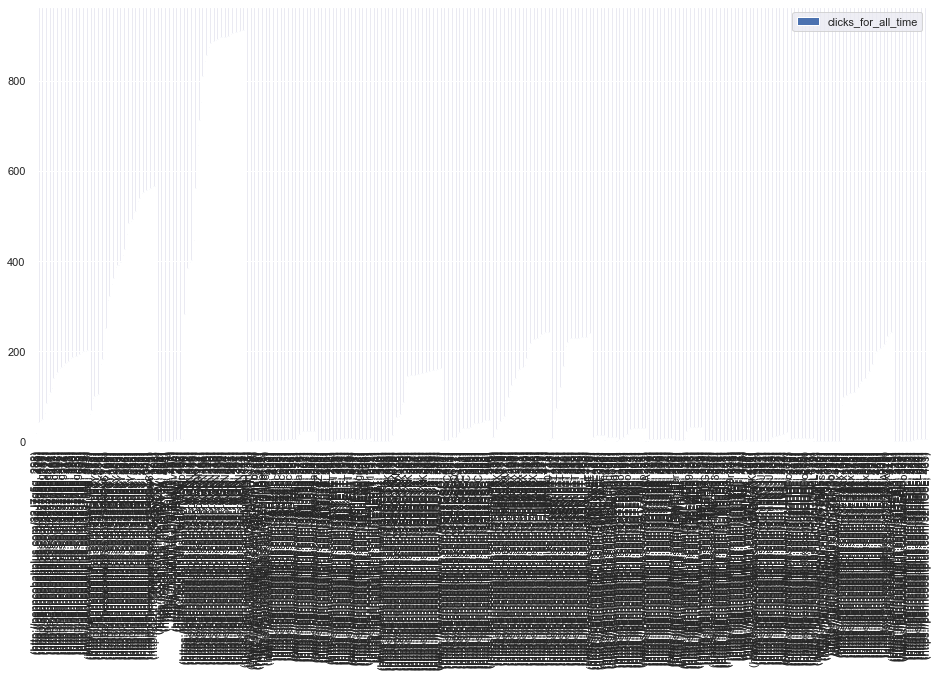

In [112]:
bitlink_click_data[['clicks_for_all_time']].plot(figsize=(16,8),kind='bar')

In [113]:
# Save data
save_name = COBALT_PLUS_DATA_PATH + 'bitly_click_data_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
bitlink_click_data.to_csv(save_name)

### Bitlinks - Top Four Highest Recorded Clicks

In [114]:
usecols = ['title','long_url','date_created','date_range_start','date_range_end','created_start','created_end','start_end','clicks_for_all_time']
bitly_data_top4 = bitlink_click_data.droplevel(axis=0,level=1)[usecols]
bitly_data_top4 = bitly_data_top4.sort_values(['clicks_for_all_time']).groupby(axis=0,level=0).tail(4)

In [115]:
print(len(bitly_data_top4))
print(len(bitly_data_top4.columns))
bitly_data_top4.head()

156
9


title  \
https://penncobaltplus.com/3rser3o  Qualtrics Survey | Qualtrics Experience Manage...   
https://penncobaltplus.com/3r7SB5s                           PennKey Recovery Service   
https://penncobaltplus.com/3r7SB5s                           PennKey Recovery Service   
https://penncobaltplus.com/3r7SB5s                           PennKey Recovery Service   
https://penncobaltplus.com/36HoWsH                                             Cobalt   

                                                                             long_url  \
https://penncobaltplus.com/3rser3o  https://upenn.co1.qualtrics.com/jfe/form/SV_cC...   
https://penncobaltplus.com/3r7SB5s  https://challengeresponse.apps.upenn.edu/chall...   
https://penncobaltplus.com/3r7SB5s  https://challengeresponse.apps.upenn.edu/chall...   
https://penncobaltplus.com/3r7SB5s  https://challengeresponse.apps.upenn.edu/chall...   
https://penncobaltplus.com/36HoWsH  https://www.penncobalt.com/on-your-time/c74c24...   

                                   date_created date_range_start  \
https://penncobaltplus.com/3rser3o   2022-04-15       2022-02-22   
https://penncobaltplus.com/3r7SB5s   2022-01-28       2022-05-03   
https://penncobaltplus.com/3r7SB5s   2022-01-28       2022-04-05   
https://penncobaltplus.com/3r7SB5s   2022-01-28       2022-05-08   
https://penncobaltplus.com/36HoWsH   2022-04-01       2022-03-18   

                                   date_range_end created_start created_end  \
https://penncobaltplus.com/3rser3o     2022-04-22      -52 days      7 days   
https://penncobaltplus.com/3r7SB5s     2022-06-09       95 days    132 days   
https://penncobaltplus.com/3r7SB5s     2022-06-03       67 days    126 days   
https://penncobaltplus.com/3r7SB5s     2022-05-23      100 days    115 days   
https://penncobaltplus.com/36HoWsH     2022-05-16      -14 days     45 days   

                                   start_end  clicks_for_all_time  
https://penncobaltplus.com/3rser3o   59 days                    1  
https://penncobaltplus.com/3r7SB5s   37 days                    1  
https://penncobaltplus.com/3r7SB5s   59 days                    1  
https://penncobaltplus.com/3r7SB5s   15 days                    1  
https://penncobaltplus.com/36HoWsH   59 days                    1

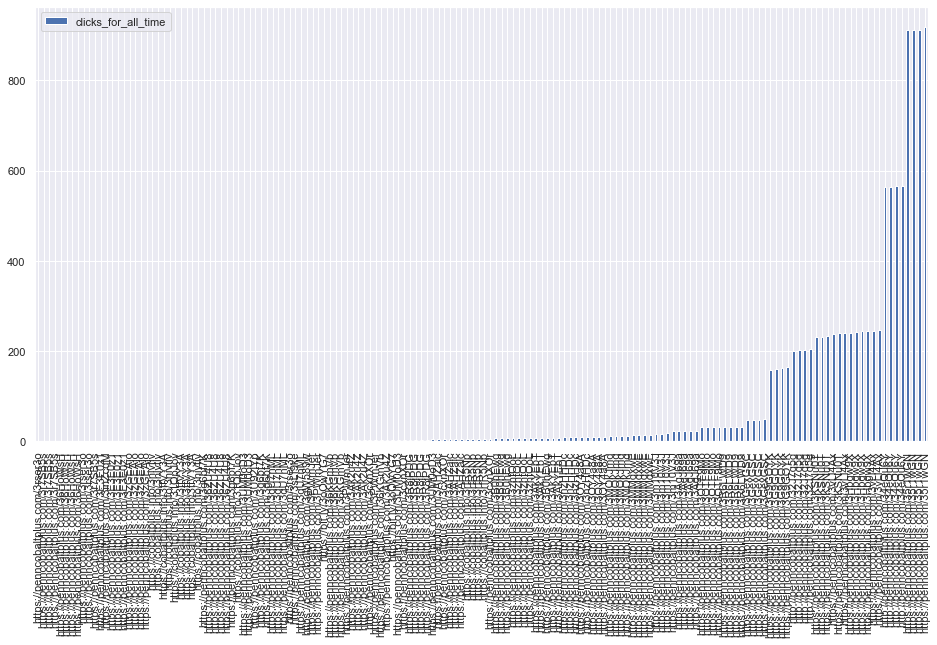

In [116]:
bitly_data_top4[['clicks_for_all_time']].plot(figsize=(16,8),kind='bar')

In [117]:
# Save data
save_name = COBALT_PLUS_DATA_PATH + 'bitly_click_data_top4_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
bitly_data_top4.to_csv(save_name)

### Bitlinks - Total Clicks for All Time

In [118]:
usecols = ['title','long_url','date_created','date_range_start','date_range_end','created_start','created_end','start_end','clicks_for_all_time']
bitly_data_top = bitlink_top_cick_data.droplevel(axis=0,level=1)[usecols]
bitly_data_top = bitly_data_top.sort_values(['clicks_for_all_time']).groupby(axis=0,level=0).tail(1)

In [119]:
print(len(bitly_data_top))
print(len(bitly_data_top.columns))
bitly_data_top.head()

43
9


title  \
https://penncobaltplus.com/3inZcqM                    Cobalt   
https://penncobaltplus.com/3E3E0z1                    Cobalt   
https://penncobaltplus.com/3r7SB5s  PennKey Recovery Service   
https://penncobaltplus.com/3zGEAjo                    Cobalt   
https://penncobaltplus.com/36HoWsH                    Cobalt   

                                                                             long_url  \
https://penncobaltplus.com/3inZcqM  https://www.penncobalt.com/on-your-time/bdf7f7...   
https://penncobaltplus.com/3E3E0z1  https://www.penncobalt.com/on-your-time/e8fc41...   
https://penncobaltplus.com/3r7SB5s  https://challengeresponse.apps.upenn.edu/chall...   
https://penncobaltplus.com/3zGEAjo  https://www.penncobalt.com/on-your-time/f7a6f5...   
https://penncobaltplus.com/36HoWsH  https://www.penncobalt.com/on-your-time/c74c24...   

                                   date_created date_range_start  \
https://penncobaltplus.com/3inZcqM   2022-11-28       2022-11-28   
https://penncobaltplus.com/3E3E0z1   2022-09-30       2022-09-30   
https://penncobaltplus.com/3r7SB5s   2022-01-28       2022-05-20   
https://penncobaltplus.com/3zGEAjo   2022-07-29       2022-08-12   
https://penncobaltplus.com/36HoWsH   2022-04-01       2022-04-05   

                                   date_range_end created_start created_end  \
https://penncobaltplus.com/3inZcqM     2022-12-05        0 days      7 days   
https://penncobaltplus.com/3E3E0z1     2022-11-28        0 days     59 days   
https://penncobaltplus.com/3r7SB5s     2022-07-18      112 days    171 days   
https://penncobaltplus.com/3zGEAjo     2022-10-10       14 days     73 days   
https://penncobaltplus.com/36HoWsH     2022-06-03        4 days     63 days   

                                   start_end  clicks_for_all_time  
https://penncobaltplus.com/3inZcqM    7 days                    1  
https://penncobaltplus.com/3E3E0z1   59 days                    1  
https://penncobaltplus.com/3r7SB5s   59 days                    1  
https://penncobaltplus.com/3zGEAjo   59 days                    1  
https://penncobaltplus.com/36HoWsH   59 days                    1

Text(0.5, 1.0, 'Total Clicks Per Link')

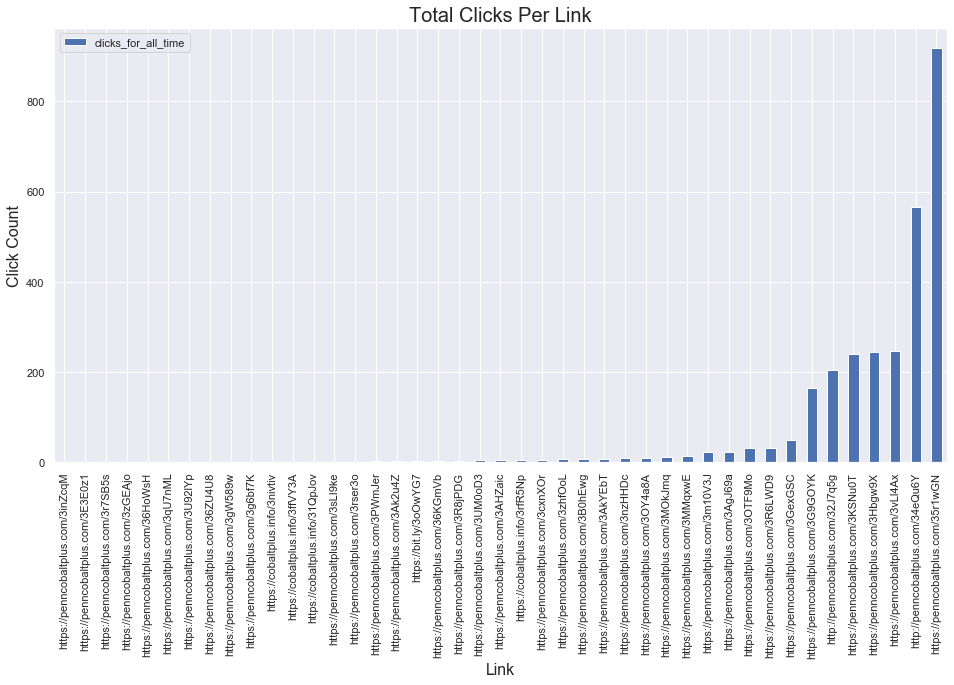

In [120]:
ax = bitly_data_top[['clicks_for_all_time']].plot(figsize=(16,8), kind='bar')
ax.set_xlabel('Link', fontsize=16)
ax.set_ylabel('Click Count', fontsize=16)
ax.set_title('Total Clicks Per Link', fontsize=20)

In [121]:
# Save data
save_name = COBALT_PLUS_DATA_PATH + 'bitly_click_data_top_' + str(datetime.datetime.now().date()).replace('-','') + '.csv'
bitly_data_top.to_csv(save_name)

In [122]:
temp_services = [item[3] for item in  bitly_data_top['long_url'].str.split('/')]
temp_services[7] = 'form'
temp_services[11] = 'connect-with-support'
temp_services[12] = 'connect-with-support'
temp_services[14] = 'form'
temp_services[17] = 'connect-with-support'
temp_services[22] = 'redcap_screening'
temp_services[35] = 'connect-with-support'
temp_services[37] = 'connect-with-support'
temp_services[38] = 'in-the-studio'
temp_services[39] = 'homepage'
temp_services[40] = 'search'
temp_services[41] = 'connect-with-support'
temp_services[42] = 'redcap_screening'

In [123]:
temp_data = bitly_data_top[['clicks_for_all_time']].copy()
temp_data['services'] = temp_services
temp_data.reset_index()

index  clicks_for_all_time  \
0   https://penncobaltplus.com/3inZcqM                    1   
1   https://penncobaltplus.com/3E3E0z1                    1   
2   https://penncobaltplus.com/3r7SB5s                    1   
3   https://penncobaltplus.com/3zGEAjo                    1   
4   https://penncobaltplus.com/36HoWsH                    1   
5   https://penncobaltplus.com/3qU7nML                    2   
6   https://penncobaltplus.com/3U92lYp                    2   
7   https://penncobaltplus.com/36ZU4U8                    2   
8   https://penncobaltplus.com/3gW589w                    2   
9   https://penncobaltplus.com/3g6bf7K                    2   
10     https://cobaltplus.info/3nivtiv                    2   
11     https://cobaltplus.info/3ffVY3A                    2   
12     https://cobaltplus.info/31QpJov                    2   
13  https://penncobaltplus.com/3sLI9ke                    2   
14  https://penncobaltplus.com/3rser3o                    2   
15  https://penncobaltplus.com/3PWmJer                    3   
16  https://penncobaltplus.com/3Ak2u4Z                    3   
17              https://bit.ly/3oOwYG7                    3   
18  https://penncobaltplus.com/36KGmVb                    3   
19  https://penncobaltplus.com/3R8jPDG                    4   
20  https://penncobaltplus.com/3UM0oD3                    5   
21  https://penncobaltplus.com/3AHZaic                    5   
22     https://cobaltplus.info/3rfR5Np                    6   
23  https://penncobaltplus.com/3cxnXOr                    6   
24  https://penncobaltplus.com/3zhfOoL                    7   
25  https://penncobaltplus.com/3B0hEwg                    8   
26  https://penncobaltplus.com/3AkYEbT                    8   
27  https://penncobaltplus.com/3nzHHDc                    9   
28  https://penncobaltplus.com/3OY4a8A                    9   
29  https://penncobaltplus.com/3MOkJmq                   11   
30  https://penncobaltplus.com/3MMqxwE                   15   
31  https://penncobaltplus.com/3m10V3J                   22   
32  https://penncobaltplus.com/3AgJ69a                   24   
33  https://penncobaltplus.com/3OTF9Mo                   31   
34  https://penncobaltplus.com/3R6LWD9                   33   
35  https://penncobaltplus.com/3GexGSC                   49   
36  https://penncobaltplus.com/3G9GOYK                  164   
37   http://penncobaltplus.com/32J7q5g                  204   
38  https://penncobaltplus.com/3KSNu0T                  240   
39  https://penncobaltplus.com/3Hbgw9X                  244   
40  https://penncobaltplus.com/3vLl4Ax                  246   
41   http://penncobaltplus.com/34eQu6Y                  566   
42  https://penncobaltplus.com/35r1wGN                  918   

                services  
0           on-your-time  
1           on-your-time  
2      challengeResponse  
3           on-your-time  
4           on-your-time  
5           on-your-time  
6           on-your-time  
7                   form  
8           on-your-time  
9           on-your-time  
10          on-your-time  
11  connect-with-support  
12  connect-with-support  
13          on-your-time  
14                  form  
15          on-your-time  
16          on-your-time  
17  connect-with-support  
18          on-your-time  
19          on-your-time  
20          on-your-time  
21     challengeResponse  
22      redcap_screening  
23          on-your-time  
24          on-your-time  
25          on-your-time  
26          on-your-time  
27          on-your-time  
28          on-your-time  
29          on-your-time  
30          on-your-time  
31          on-your-time  
32          on-your-time  
33          on-your-time  
34          on-your-time  
35  connect-with-support  
36          on-your-time  
37  connect-with-support  
38         in-the-studio  
39              homepage  
40                search  
41  connect-with-support  
42      redcap_screening

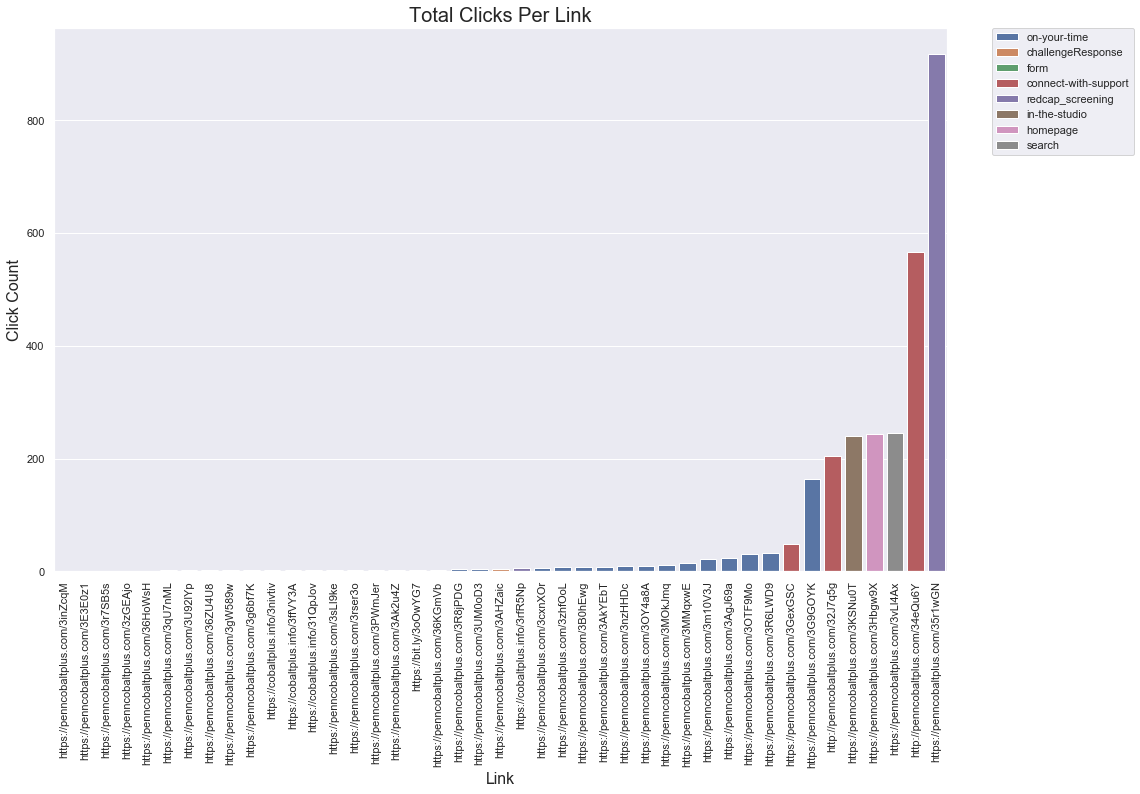

In [124]:
ax = sns.barplot(data=temp_data.reset_index(), x='index', y='clicks_for_all_time', hue='services', dodge=False)
ax.figure.set_size_inches(16,10)
ax.set_xlabel('Link', fontsize=16)
ax.set_ylabel('Click Count', fontsize=16)
ax.set_title('Total Clicks Per Link', fontsize=20)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [523]:
# Cobalt pages
bitly_cobalt_top = bitly_data_top[bitly_data_top['title']=='Cobalt']

# content 
on_your_time = bitly_data_top[bitly_data_top['long_url'].str.contains('on-your-time')].copy()
content_keys = on_your_time['long_url'].apply(lambda x: x.split('?')[0].split('/')[-1]).copy()
on_your_time['content_key'] = content_keys
on_your_time['date_norm'] = STUDY_END_DATE - on_your_time['date_created']
on_your_time['clicks_for_all_time_norm'] = (on_your_time['clicks_for_all_time']/on_your_time['date_norm'].apply(lambda x: x.days))*30

bitly_use_cols = ['long_url','date_norm','clicks_for_all_time','clicks_for_all_time_norm','content_key']
content_use_cols = ['content_type_id','title','description','url','content_id']
on_your_time = on_your_time[bitly_use_cols].merge(content[content_use_cols],left_on='content_key',right_on='content_id', how='inner')
on_your_time['content_type_color'] = on_your_time['content_type_id'].map(content_type_color_dict)

content_title_dict = dict(on_your_time[['content_key','title']].values)
content_type_dict = dict(on_your_time[['content_key','content_type_id']].values)

# appointments
connect_with_support = bitly_data_top[bitly_data_top['long_url'].str.contains('connect-with-support')]

# groups
in_the_studio = bitly_data_top[bitly_data_top['long_url'].str.contains('in-the-studio')]

# homepage
homepage = bitly_data_top[bitly_data_top['long_url'].str.contains('https://www.penncobalt.com/\?')]

In [524]:
print('Total Clicks:', bitly_cobalt_top['clicks_for_all_time'].sum())
print('Content Clicks: ',on_your_time['clicks_for_all_time'].sum())
print('Appointment Clicks: ',connect_with_support['clicks_for_all_time'].sum())
print('Group Clicks: ',in_the_studio['clicks_for_all_time'].sum())
print('Homepage Clicks: ',homepage['clicks_for_all_time'].sum())

Total Clicks: 1691
Content Clicks:  381
Appointment Clicks:  826
Group Clicks:  240
Homepage Clicks:  244


In [617]:
# Pie chart
def get_pie_chart(data, title, explode_str=''):
    def format_text(pct, counts):
        absolute = int(np.round(pct/100.*np.sum(counts)))
        return "{:d}\n({:.1f}%)".format(absolute,pct)
    
    labels = data.index
    pie_data = data.iloc[:,0]
    explode = [0 if item!=explode_str else 0.1 for item in data.index.values]

    fig, ax = plt.subplots(figsize=(8,8), facecolor='whitesmoke')
    ax.pie(pie_data, explode=explode, labels=labels, autopct=lambda pct: format_text(pct, pie_data), 
           textprops=dict(color="black",size=14), shadow=False, startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    fig.suptitle(title, fontsize=18)

    plt.show()

In [618]:
idx = ['Content Clicks','Appointment Clicks','Group Clicks','Homepage Clicks']
counts = [on_your_time['clicks_for_all_time'].sum(),connect_with_support['clicks_for_all_time'].sum(),
          in_the_studio['clicks_for_all_time'].sum(),homepage['clicks_for_all_time'].sum()]
pcts = [item/sum(counts) for item in counts]
click_totals = pd.DataFrame(zip(counts,pcts), index=idx, columns=['click_count','click_pct'])
click_totals

click_count  click_pct
Content Clicks              381     0.2253
Appointment Clicks          826     0.4885
Group Clicks                240     0.1419
Homepage Clicks             244     0.1443

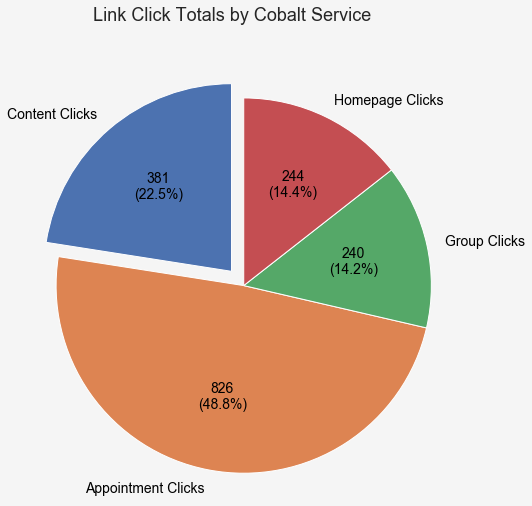

In [619]:
get_pie_chart(click_totals, 'Link Click Totals by Cobalt Service','Content Clicks')

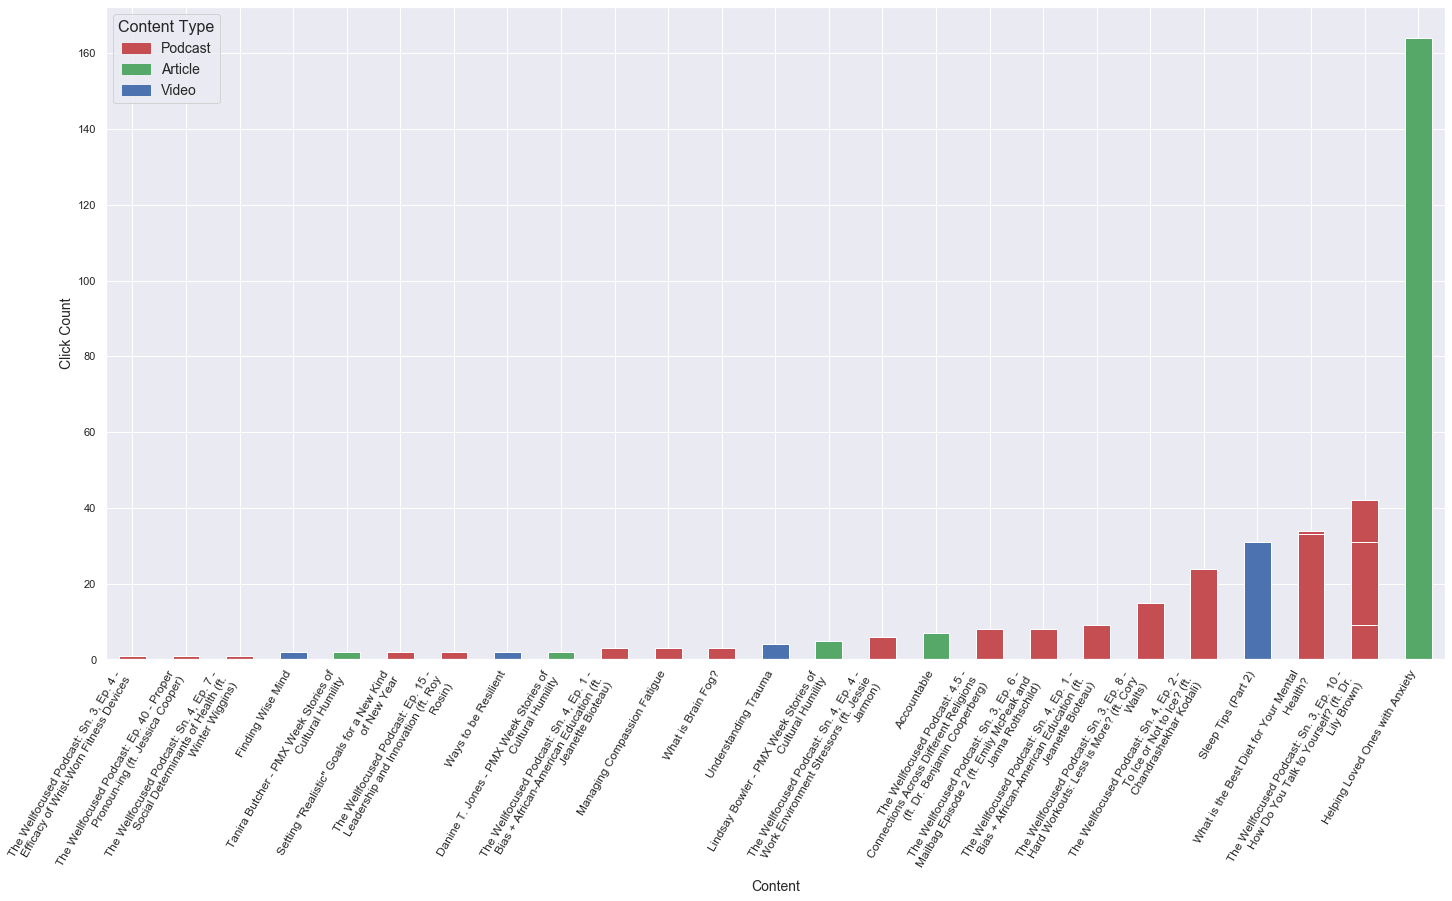

In [595]:
plot_data = on_your_time.set_index(['content_key','long_url'],drop=False)[['clicks_for_all_time']].unstack().droplevel(axis=1, level=0).fillna(0)
plot_data = plot_data.loc[plot_data.sum(axis=1).sort_values().index]
xlabels = [textwrap.fill(content_title_dict[item],40) for item in plot_data.index]
col_keys = [item.split('?')[0].split('/')[-1] for item in plot_data.columns]
bar_colors = [content_type_color_dict[content_type_dict[item]] for item in col_keys]

ax = plot_data.plot(figsize=(24,12),kind='bar',stacked=True,legend=None,color=bar_colors)
ax.set_xticklabels(xlabels,rotation=60,ha='right', fontsize=12)
ax.set_xlabel('Content', fontsize=14)
ax.set_ylabel('Click Count', fontsize=14)

red_patch = mpatches.Patch(color='r', label='Podcast')
green_patch = mpatches.Patch(color='g', label='Article')
blue_patch = mpatches.Patch(color='b', label='Video')

plt.legend(handles=[red_patch,green_patch,blue_patch],fontsize=14,title='Content Type',title_fontsize=16)

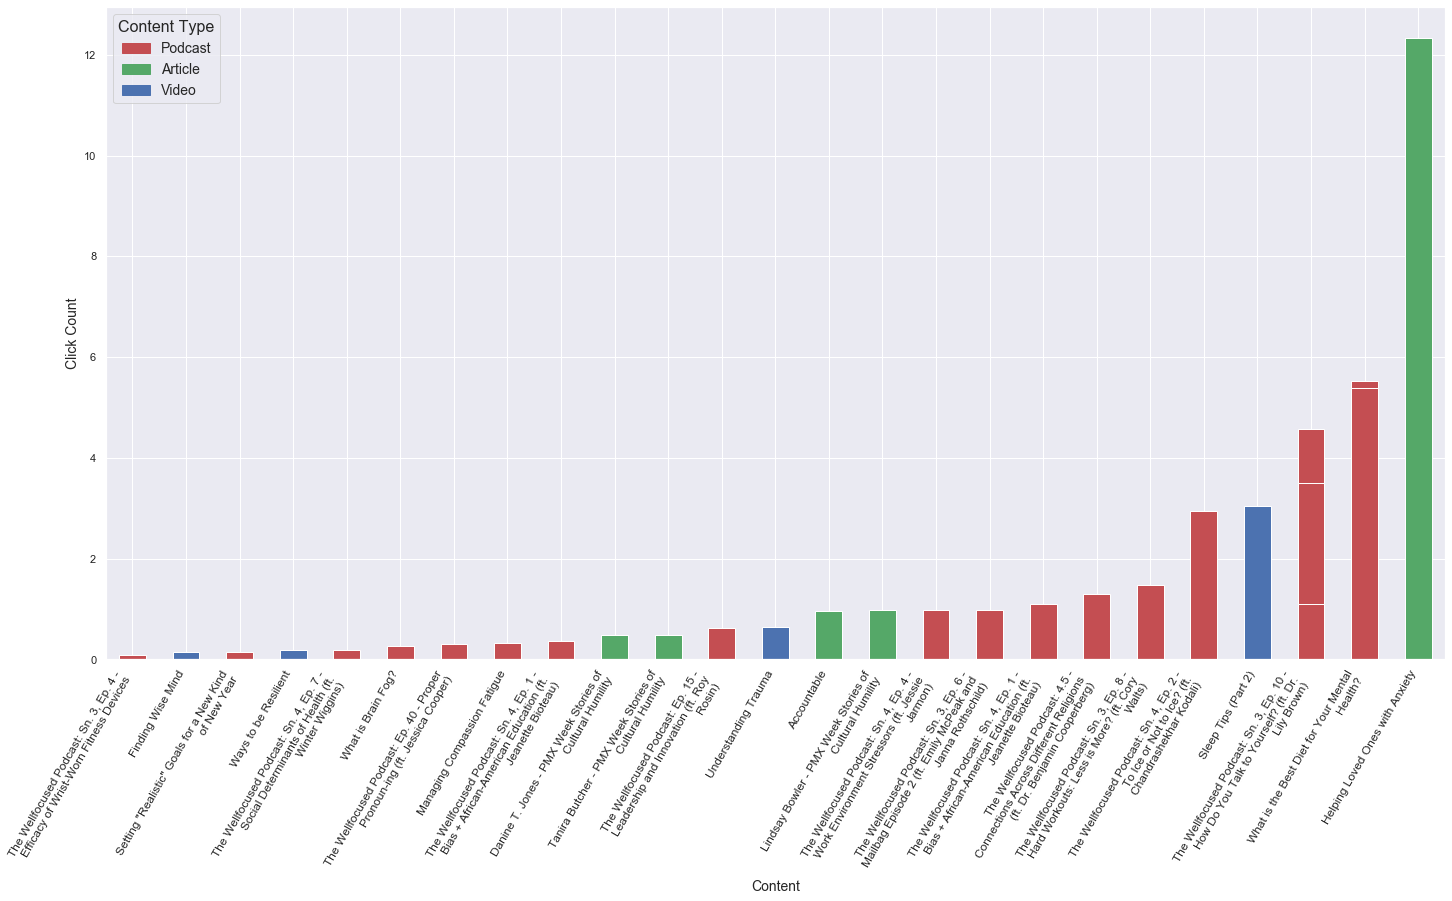

In [609]:
plot_data = on_your_time.set_index(['content_key','long_url'],drop=False)[['clicks_for_all_time_norm']].unstack().droplevel(axis=1, level=0).fillna(0)
plot_data = plot_data.loc[plot_data.sum(axis=1).sort_values().index]
xlabels = [textwrap.fill(content_title_dict[item],40) for item in plot_data.index]
col_keys = [item.split('?')[0].split('/')[-1] for item in plot_data.columns]
bar_colors = [content_type_color_dict[content_type_dict[item]] for item in col_keys]

ax = plot_data.plot(figsize=(24,12),kind='bar',stacked=True,legend=None,color=bar_colors)
ax.set_xticklabels(xlabels,rotation=60,ha='right', fontsize=12)
ax.set_xlabel('Content', fontsize=14)
ax.set_ylabel('Click Count', fontsize=14)

red_patch = mpatches.Patch(color='r', label='Podcast')
green_patch = mpatches.Patch(color='g', label='Article')
blue_patch = mpatches.Patch(color='b', label='Video')

plt.legend(handles=[red_patch,green_patch,blue_patch],fontsize=14,title='Content Type',title_fontsize=16)

In [ ]:
plot_data = on_your_time.set_index(['content_key','long_url'],drop=False)[['clicks_for_all_time_norm']].unstack()
plot_data = plot_data.loc[plot_data.sum(axis=1).sort_values().index]
ax = plot_data.plot(figsize=(16,8),kind='bar',stacked=True,legend=None,color='blue')

### Bitlinks - Working

In [183]:
# merge with content on bitly_data_top.long_url.split('/')[-1] and content.content_id
bitly_data_top.long_url.unique()

array(['https://www.penncobalt.com/on-your-time/bdf7f7f5-912f-4d8b-9329-f6d756f0be55',
       'https://www.penncobalt.com/on-your-time/e8fc416d-af4f-4871-8669-c133907cddae?utm_source=cobalt&utm_medium=month3&utm_campaign=oct+2022',
       'https://challengeresponse.apps.upenn.edu/challengeResponse/jsp/fast.do?fastStart=resetPassword&utm_source=penn&utm_medium=key&utm_campaign=password',
       'https://www.penncobalt.com/on-your-time/f7a6f530-cc51-4fad-9d62-b75aafbc9f52?utm_source=cobalt&utm_medium=monthly+3&utm_campaign=august+1',
       'https://www.penncobalt.com/on-your-time/c74c24e7-9cf3-4af5-a40e-a0e0fd1aaa8f?utm_source=cobalt&utm_medium=april+2022+popular+content&utm_campaign=april+2022+popular+content',
       'https://www.penncobalt.com/on-your-time/84ee5ddb-4acd-4d9c-bd80-37329feb1cea?utm_source=cobalt&utm_medium=month3&utm_campaign=april+2022+popular+content',
       'https://www.penncobalt.com/on-your-time/5ddfe9c0-e69a-4bfb-9388-29c4203605ac',
       'https://upenn.co1.qua

In [159]:
[item for item in bitly_data.long_url.sort_values().unique() for substring in ['on-your-time', 'connect-with-support'] if substring in item]

['https://www.penncobalt.com/connect-with-support?supportRoleId=CLINICIAN&immediateAccess=false&track=true&accountSourceId=PENN_KEY_SSO&utm_source=cobalt&utm_medium=therapist&utm_campaign=therapist',
 'https://www.penncobalt.com/connect-with-support?supportRoleId=COACH&immediateAccess=false&track=true&accountSourceId=PENN_KEY_SSO',
 'https://www.penncobalt.com/connect-with-support?supportRoleId=COACH&immediateAccess=false&track=true&accountSourceId=PENN_KEY_SSO&utm_source=cobalt&utm_medium=coach&utm_campaign=coach',
 'https://www.penncobalt.com/connect-with-support?supportRoleId=COACH&immediateAccess=false&track=true&accountSourceId=PENN_KEY_SSO&utm_source=cobalt&utm_medium=page&utm_campaign=jan+2022',
 'https://www.penncobalt.com/connect-with-support?supportRoleId=PSYCHIATRIST&immediateAccess=false&track=true&accountSourceId=PENN_KEY_SSO&utm_source=cobalt&utm_medium=page&utm_campaign=jan+2022',
 'https://www.penncobalt.com/connect-with-support?supportRoleId=PSYCHIATRIST&immediateAcces

In [152]:
[item.split('?') for item in bitly_data.long_url.sort_values().unique()]

[['https://challengeresponse.apps.upenn.edu/challengeResponse/jsp/fast.do',
  'fastStart=forgotMyUsername&utm_source=penn&utm_medium=pennkey&utm_campaign=username'],
 ['https://challengeresponse.apps.upenn.edu/challengeResponse/jsp/fast.do',
  'fastStart=resetPassword&utm_source=penn&utm_medium=key&utm_campaign=password'],
 ['https://redcap.link/cobaltRCT',
  'utm_source=redcap&utm_medium=screening&utm_campaign=survey'],
 ['https://upenn.box.com/s/mxlafo5echcubp30ru8kame54j0cc3h3',
  'utm_source=visa+&utm_medium=clincard&utm_campaign=faq'],
 ['https://upenn.co1.qualtrics.com/jfe/form/SV_8ew9E5HybDBSG46',
  'utm_source=qualtrics&utm_medium=informed+consent&utm_campaign=informed+consent'],
 ['https://upenn.co1.qualtrics.com/jfe/form/SV_cC6uLGeaP1g7hXM',
  'utm_source=qualtrics&utm_medium=faq&utm_campaign=faq'],
 ['https://www.penncobalt.com/',
  'utm_source=cobalt&utm_medium=homepage&utm_campaign=homepage'],
 ['https://www.penncobalt.com/connect-with-support',
  'supportRoleId=CLINICIAN&

In [173]:
print(bitly_data_top.clicks_for_all_time.sum())
bitly_data_top

2871


title  \
https://penncobaltplus.com/3inZcqM                                             Cobalt   
https://penncobaltplus.com/3E3E0z1                                             Cobalt   
https://penncobaltplus.com/3r7SB5s                           PennKey Recovery Service   
https://penncobaltplus.com/3zGEAjo                                             Cobalt   
https://penncobaltplus.com/36HoWsH                                             Cobalt   
https://penncobaltplus.com/3qU7nML                                             Cobalt   
https://penncobaltplus.com/3U92lYp                                             Cobalt   
https://penncobaltplus.com/36ZU4U8  Qualtrics Survey | Qualtrics Experience Manage...   
https://penncobaltplus.com/3gW589w                                             Cobalt   
https://penncobaltplus.com/3g6bf7K                                             Cobalt   
https://cobaltplus.info/3nivtiv                                                Cobalt   
https://cobaltplus.info/3ffVY3A                                                Cobalt   
https://cobaltplus.info/31QpJov                                                Cobalt   
https://penncobaltplus.com/3sLI9ke                                             Cobalt   
https://penncobaltplus.com/3rser3o  Qualtrics Survey | Qualtrics Experience Manage...   
https://penncobaltplus.com/3PWmJer                                             Cobalt   
https://penncobaltplus.com/3Ak2u4Z                                             Cobalt   
https://bit.ly/3oOwYG7                                                         Cobalt   
https://penncobaltplus.com/36KGmVb                                             Cobalt   
https://penncobaltplus.com/3R8jPDG                                             Cobalt   
https://penncobaltplus.com/3UM0oD3                                             Cobalt   
https://penncobaltplus.com/3AHZaic                         Forgot My PennKey Username   
https://cobaltplus.info/3rfR5Np                                                   NaN   
https://penncobaltplus.com/3cxnXOr                                             Cobalt   
https://penncobaltplus.com/3zhfOoL                                             Cobalt   
https://penncobaltplus.com/3B0hEwg                                             Cobalt   
https://penncobaltplus.com/3AkYEbT                                             Cobalt   
https://penncobaltplus.com/3nzHHDc                                             Cobalt   
https://penncobaltplus.com/3OY4a8A                                             Cobalt   
https://penncobaltplus.com/3MOkJmq                                             Cobalt   
https://penncobaltplus.com/3MMqxwE                                             Cobalt   
https://penncobaltplus.com/3m10V3J                                             Cobalt   
https://penncobaltplus.com/3AgJ69a                                             Cobalt   
https://penncobaltplus.com/3OTF9Mo                                             Cobalt   
https://penncobaltplus.com/3R6LWD9                                             Cobalt   
https://penncobaltplus.com/3GexGSC                                             Cobalt   
https://penncobaltplus.com/3G9GOYK                                             Cobalt   
http://penncobaltplus.com/32J7q5g                                              Cobalt   
https://penncobaltplus.com/3KSNu0T                                             Cobalt   
https://penncobaltplus.com/3Hbgw9X                                             Cobalt   
https://penncobaltplus.com/3vLl4Ax                                                Box   
http://penncobaltplus.com/34eQu6Y                                              Cobalt   
https://penncobaltplus.com/35r1wGN                                                NaN   

                                                                             long_url  \
https://penncobaltplus.com/3inZcqM  https://www.penncobalt.com/on-your-tim

In [81]:
temp_data = bitly_data_top[['clicks_for_all_time','created_start','created_end','start_end']]
temp_data['clicks_created_start'] = temp_data['clicks_for_all_time']/temp_data['created_start']
temp_data['clicks_created_end'] = temp_data['clicks_for_all_time']/temp_data['created_end']
temp_data['clicks_start_end'] = temp_data['clicks_for_all_time']/temp_data['start_end']
temp_data['did_exist_at start'] = temp_data['date_created'].apply(lambda x: 1 if x['date_range_start']>x['date_created'] else 0)
temp_data['did_exist'] = temp_data['date_created'].apply(lambda x: 1 if x['date_range_end']<x['date_created'] else 0)

TypeError: Cannot divide int64 data by TimedeltaArray

In [ ]:
bitlink_click_data['year'] = bitlink_click_data['date_created'].dt.year
bitlink_click_data['month'] = bitlink_click_data['date_created'].dt.month
bitlink_click_data['day'] = bitlink_click_data['date_created'].dt.day
bitlink_click_data['hour'] = bitlink_click_data['date_created'].dt.hour
bitlink_click_data['weekofyear'] = bitlink_click_data['date_created'].dt.weekofyear
bitlink_click_data['dayofyear'] = bitlink_click_data['date_created'].dt.dayofyear
bitlink_click_data['dayofweek'] = bitlink_click_data['date_created'].dt.dayofweek

# hmmm...
bitlink_click_data.groupby(['long_url','year','month','day'])[['clicks_for_all_time']].count()

In [939]:
usecols = ['title','long_url','date_created','date_range_start','date_range_end','created_start','created_end','start_end','clicks_for_all_time']

bitly_link_clicks = data.copy()
bitly_link_clicks.index = bitly_link_clicks.index.rename(name='bitlink')
bitly_link_clicks['bitlink_code'] = [item.split('/')[-1] for item in bitly_link_clicks.index]
bitly_link_clicks = bitly_link_clicks[usecols]

four_split = [(idx,row['long_url'].split('/')) for idx,row in bitly_link_clicks.iterrows() if len(row['long_url'].split('/'))==4]
five_split = [(idx,row['long_url'].split('/')) for idx,row in bitly_link_clicks.iterrows() if len(row['long_url'].split('/'))==5]
six_split = [(idx,row['long_url'].split('/')) for idx,row in bitly_link_clicks.iterrows() if len(row['long_url'].split('/'))==6]

KeyError: "['created_start', 'created_end', 'start_end'] not in index"

In [940]:
four_split_dict = dict()

for item in four_split:
    four_split_idx = item[0]
    four_split_domain = ['domain='+item[1][2]]
    
    four_split_temp = item[1][3].split('?')
    four_split_service = ['service='+item[0]]
    four_split_data = four_split_temp[1].split('&')

    four_split_row = four_split_domain + four_split_service + four_split_data
    four_split_dict[four_split_idx] = [item.split('=') for item in four_split_row]

In [941]:
five_split_dict = dict()

for item in five_split:
    five_split_idx = item[0]
    five_split_domain = ['domain='+item[1][2]]
    five_split_service = ['service='+item[1][3]]
    five_split_data = item[1][4].split('?')
    if len(five_split_data) == 1:
        five_split_data = ['key='+five_split_data[0]]
    else:
        five_split_data = ['key='+five_split_data[0]] + five_split_data[1].split('&')

    five_split_row = five_split_domain + five_split_service + five_split_data
    five_split_dict[five_split_idx] = [item.split('=') for item in five_split_row]

In [902]:
six_split_dict = dict()

for item in six_split:
    six_split_idx = item[0]
    six_split_domain = ['domain='+item[1][2]]
    six_split_service = ['service='+item[1][3]]
    six_split_data = item[1][5].split('?')
    if len(six_split_data) == 1:
        six_split_data = ['key='+six_split_data[0]]
    else:
        six_split_data = ['key='+six_split_data[0]] + six_split_data[1].split('&')

    six_split_row = six_split_domain + six_split_service + six_split_data
    six_split_dict[six_split_idx] = [item.split('=') for item in six_split_row]

In [903]:
print(len(four_split_dict))
print(len(five_split_dict))
print(len(six_split_dict))

10
29
4


## Unused / Deprecated Code

In [ ]:
"""

cobalt_primary = account_email.merge(enrollment[['participant_id','primary_email']], how='inner', left_on='email_address', right_on='primary_email')
cobalt_primary = cobalt_primary.rename(columns={'primary_email':'participant_email'})
cobalt_secondary = account_email.merge(enrollment[['participant_id','secondary_email']], how='inner', left_on='email_address', right_on='secondary_email')
cobalt_secondary = cobalt_secondary.rename(columns={'secondary_email':'participant_email'})
cobalt_plus = pd.concat([cobalt_primary,cobalt_secondary])


cobalt_primary[cobalt_primary['account_id']=='d19a1181-484a-4f7b-aad2-3fc25bed0bbc']
enrollment[enrollment['participant_id'].isin(['1000774964','1000776739'])]


# accounts: new and existing
# appointments: after 01/31/2022

use_cols = ['account_id','account_source_id'] + enrollment_email.columns.to_list()
study_acct_date = study_acct[study_acct['created']>= pd.to_datetime('01/01/2022').tz_localize(tz=COBALT_TZ)].sort_values('created')
study_appt_date = study_appt[study_appt['created']>= pd.to_datetime('01/01/2022').tz_localize(tz=COBALT_TZ)].sort_values('created')
study_acctAppt_date = study_acct_date[study_acct_date['account_id'].isin(study_appt['account_id'])]


"""

In [ ]:
"""

print(len(screening_session.created_by_account_id.unique()))
print(len(screening_session[screening_session['completed']==True]))
print(len(screening_session_screening[screening_session_screening['completed']==True]))
screening_session.groupby(['completed','skipped','crisis_indicated'])[['screening_session_id']].count()

"""

In [ ]:
"""

screen_merged_target = screen_target.merge(screen_created,
                                           how='inner',
                                           on='target_account_id',
                                           suffixes=('_target','_created'),
                                           indicator='id_source')
screen_merged_created = screen_target.merge(screen_created,
                                           how='inner',
                                           on='target_account_id',
                                           suffixes=('_target','_created'),
                                           indicator='id_source')

"""

In [ ]:
"""

# Merging using 'created_by_account_id' instead of "target_account_id"
screen_created = screening_data_master.merge(study_acct[['account_id','arm']], 
                                             how='inner', 
                                             left_on='created_by_account_id', 
                                             right_on='account_id', 
                                             indicator='id_source')

screen_created_plot_data = screen_created.groupby(['screening_name','screening_score'])[['screening_session_screening_id']].count()
screen_created_plot_data = screen_created_plot_data.unstack().fillna(0).transpose()
screen_created_plot_data = screen_created_plot_data.droplevel(axis=0,level=0)

screen_created_plot_data.index = screen_created_plot_data.index.rename('Score')
screen_created_plot_data.columns = screen_created_plot_data.columns.rename('Screening')

# Display data
print('Total:',screen_target_plot_data['WHO-5'].sum())
print(len(screen_created_plot_data))
print(len(screen_created_plot_data.columns))
screen_created_plot_data.head()

"""

In [ ]:
"""

# OUTDATED
# Create dictionary for PHQ-9 and GAD-7
screening_id_dict = dict(screening[screening['name'].isin(['WHO-5','PHQ-9','GAD-7'])][['name','active_screening_version_id']].values)
screening_name_dict = {v:k for k,v in screening_id_dict.items()}

# Reformat screening session screening and scores so they are useable
screening_scores = screening_session_screening[screening_session_screening['screening_version_id'].isin(screening_id_dict.values())].copy()
screening_scores['screening_name'] = screening_scores['screening_version_id'].map(screening_name_dict)
screening_scores['screening_score'] = screening_scores['score'].apply(lambda x: x['overallScore'])

# Merge screening_session and screening_session_screening data to make useable dataset
screening_data_master = screening_scores.merge(screening_session,how='inner',on='screening_session_id',
                                               suffixes=('_screening','_session'),indicator='source')

"""

In [ ]:
"""

[item for item in ax.get_children() if type(item)==matplotlib.patches.Rectangle]

"""